# 画像データ分析

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font="IPAexGothic")

import umap

from pathlib import Path
from sklearn import manifold

from data_loader import load_cifar10
from image_data_analysis import get_mean_images, get_pixel_hist

In [3]:
DATASET_DOWNLOAD_DIR = '/tf/data'
DATASET_SAVE_DIR = './dataset'

## データセットの読み込み

データセットをpandas.DataFrameへ読み込む．  
本テンプレートでは，トイデータとしてCIFAR-10画像分類用データセットを使用する．

### CIFAR-10データセットのダウンロード

In [4]:
CIFAR10_URL = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
CIFAR10_SAVE_FILE = Path(DATASET_DOWNLOAD_DIR, 'cifar-10-python.tar.gz')
CIFAR10_EXTRACTED_PATH = Path(DATASET_DOWNLOAD_DIR, 'cifar-10-batches-py')

if (not CIFAR10_SAVE_FILE.exists()):
    !curl {CIFAR10_URL} -o {str(CIFAR10_SAVE_FILE)}
    !tar -zxf {CIFAR10_SAVE_FILE} -C {DATASET_DOWNLOAD_DIR}

### CIFAR-10データセットの読み込み

In [5]:
dict_x, dict_y = load_cifar10(CIFAR10_EXTRACTED_PATH)

In [6]:
dict_x

{'train': array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142, 

In [7]:
dict_y

{'train': array([6, 9, 9, ..., 9, 1, 1]),
 'test': array([3, 8, 8, ..., 5, 1, 7]),
 'label_names': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck']}

### 画像表示

<< airplane >>


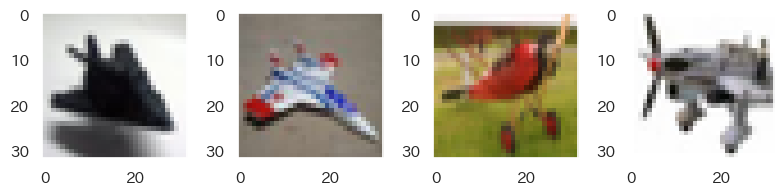

<< automobile >>


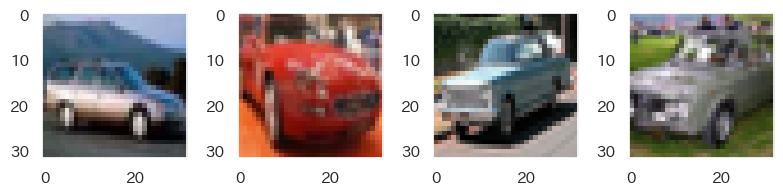

<< bird >>


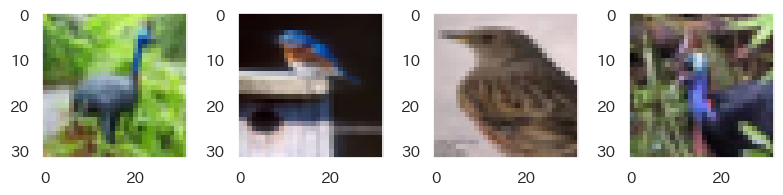

<< cat >>


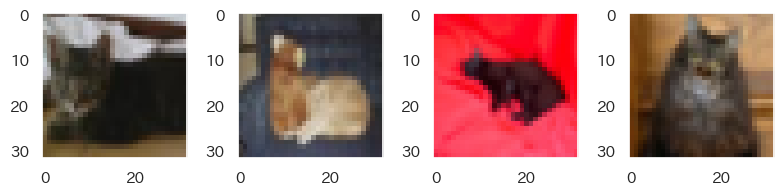

<< deer >>


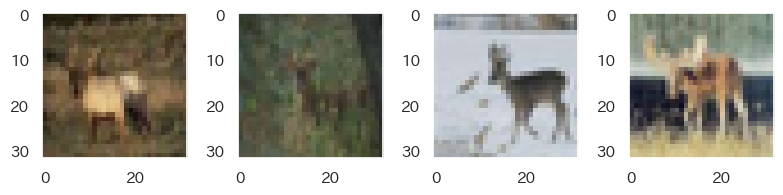

<< dog >>


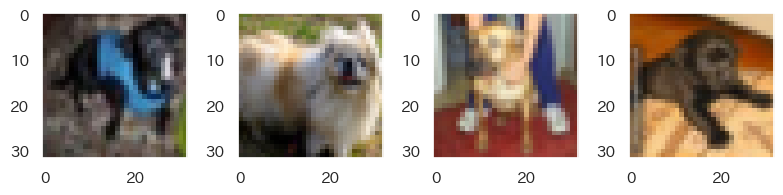

<< frog >>


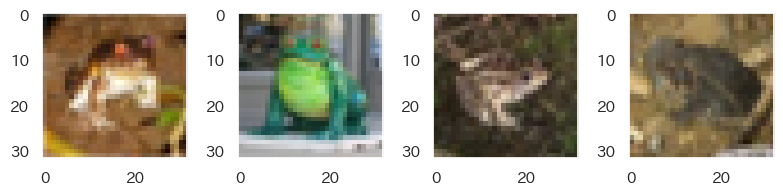

<< horse >>


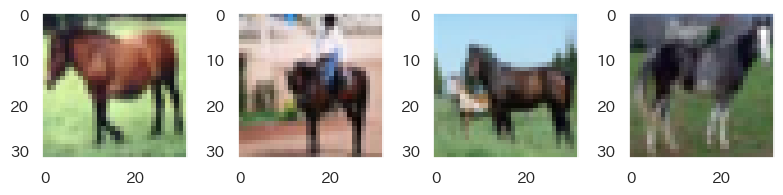

<< ship >>


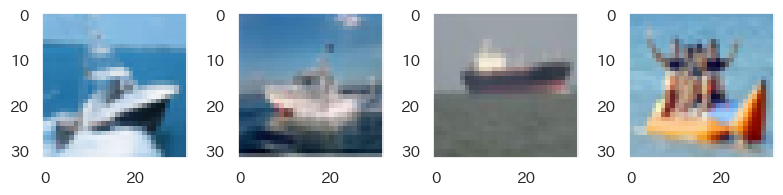

<< truck >>


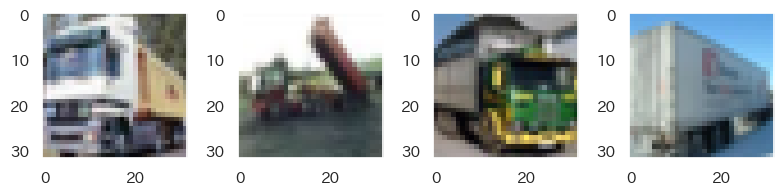

In [8]:
for label_id in range(10):
    label_idx = np.arange(len(dict_y['train']))[dict_y['train']==label_id]
    train_images = dict_x['train'][label_idx]

    print(f'<< {dict_y["label_names"][label_id]} >>')
    n_figs = 4
    plt.figure(figsize=(2*n_figs, 2))
    lmn = 100 + n_figs*10
    for i in range(n_figs):
        img = train_images[i].reshape(32, 32, 3)
        plt.subplot(lmn+i+1)
        plt.imshow(img)
        plt.grid(False)

    plt.tight_layout()    
    plt.show()

## データセットの分析

### 平均画像

<< airplane >>


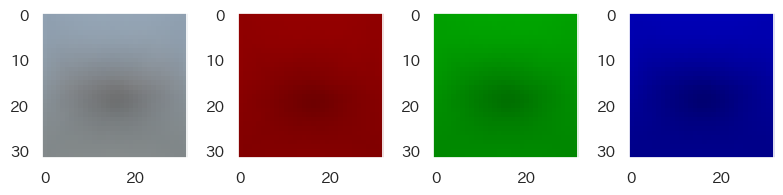

<< automobile >>


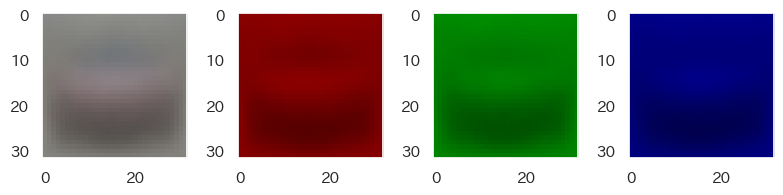

<< bird >>


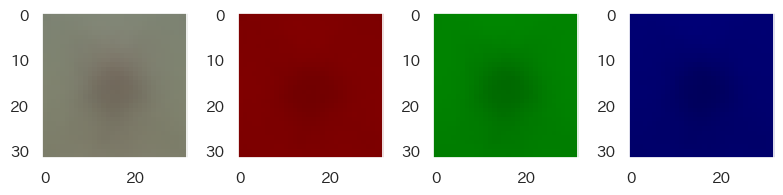

<< cat >>


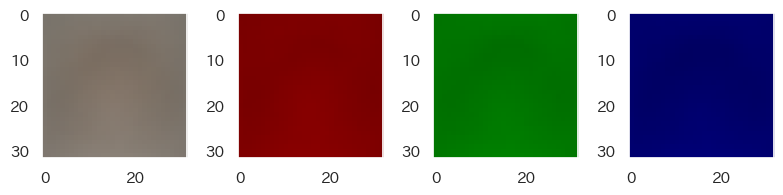

<< deer >>


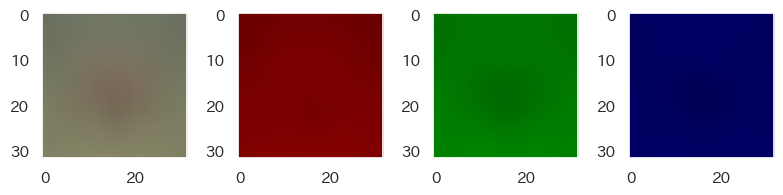

<< dog >>


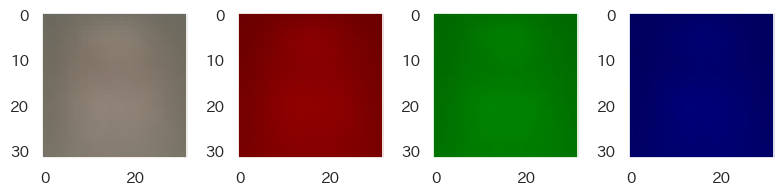

<< frog >>


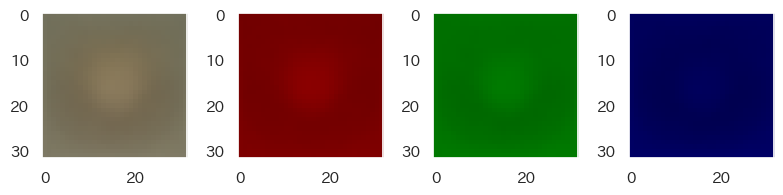

<< horse >>


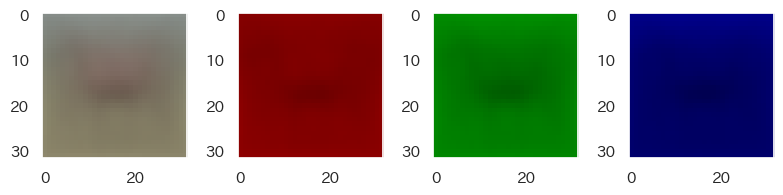

<< ship >>


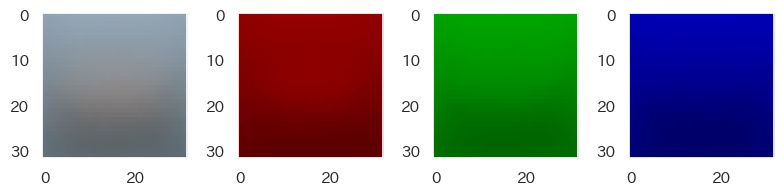

<< truck >>


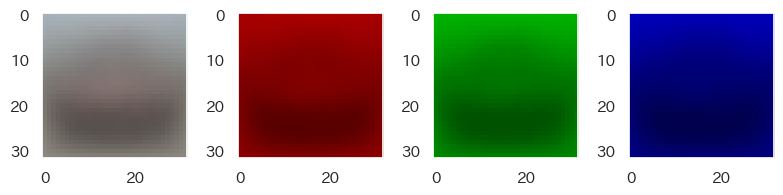

In [9]:
img_mean, img_mean_r, img_mean_g, img_mean_b = get_mean_images(dict_x['train'], dict_y['train'], dict_y['label_names'])
for i in range(10):
    print(f'<< {dict_y["label_names"][i]} >>')
    plt.figure(figsize=(2*4, 2))
    
    plt.subplot(141)
    plt.imshow(img_mean[i])
    plt.grid(False)
    plt.subplot(142)
    plt.imshow(img_mean_r[i])
    plt.grid(False)
    plt.subplot(143)
    plt.imshow(img_mean_g[i])
    plt.grid(False)
    plt.subplot(144)
    plt.imshow(img_mean_b[i])
    plt.grid(False)
    
    plt.tight_layout()
    plt.show()

### ヒストグラム

In [10]:
hist_rgb, hist_hsv, hist_yuv = get_pixel_hist(dict_x['train'], dict_y['train'], dict_y['label_names'], 10)

<< R >>
 * airplane


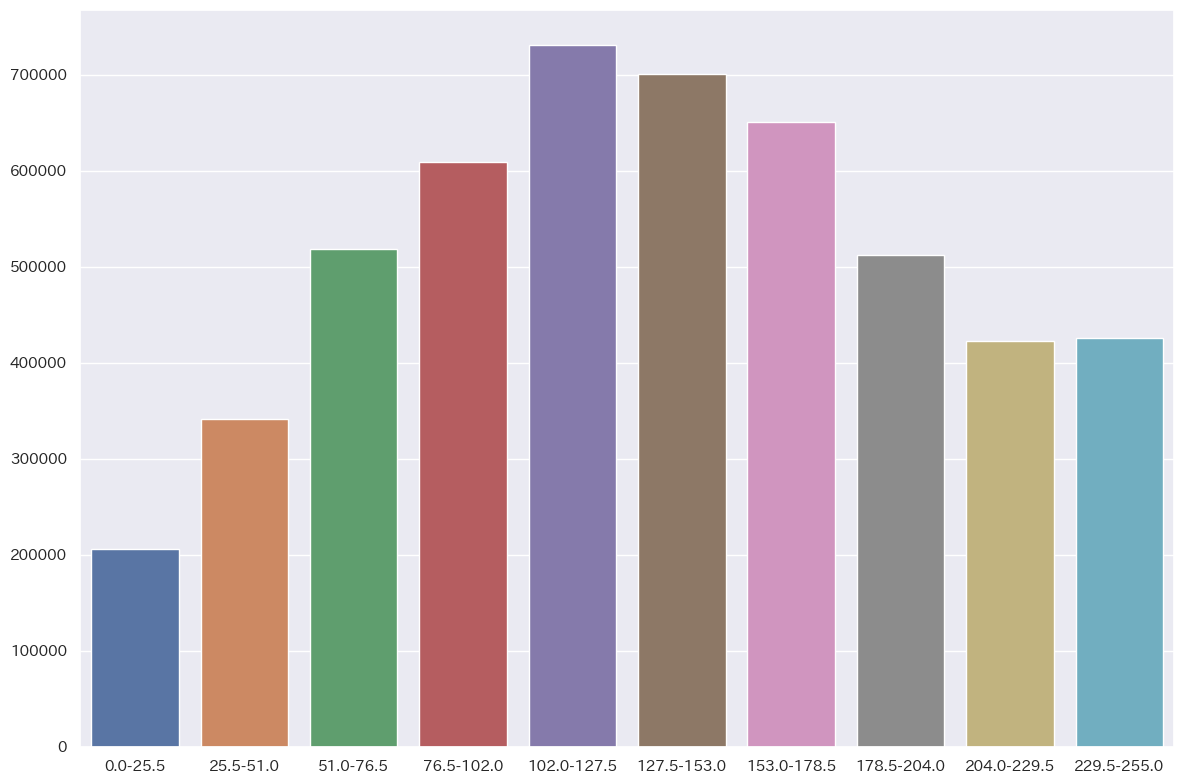

 * automobile


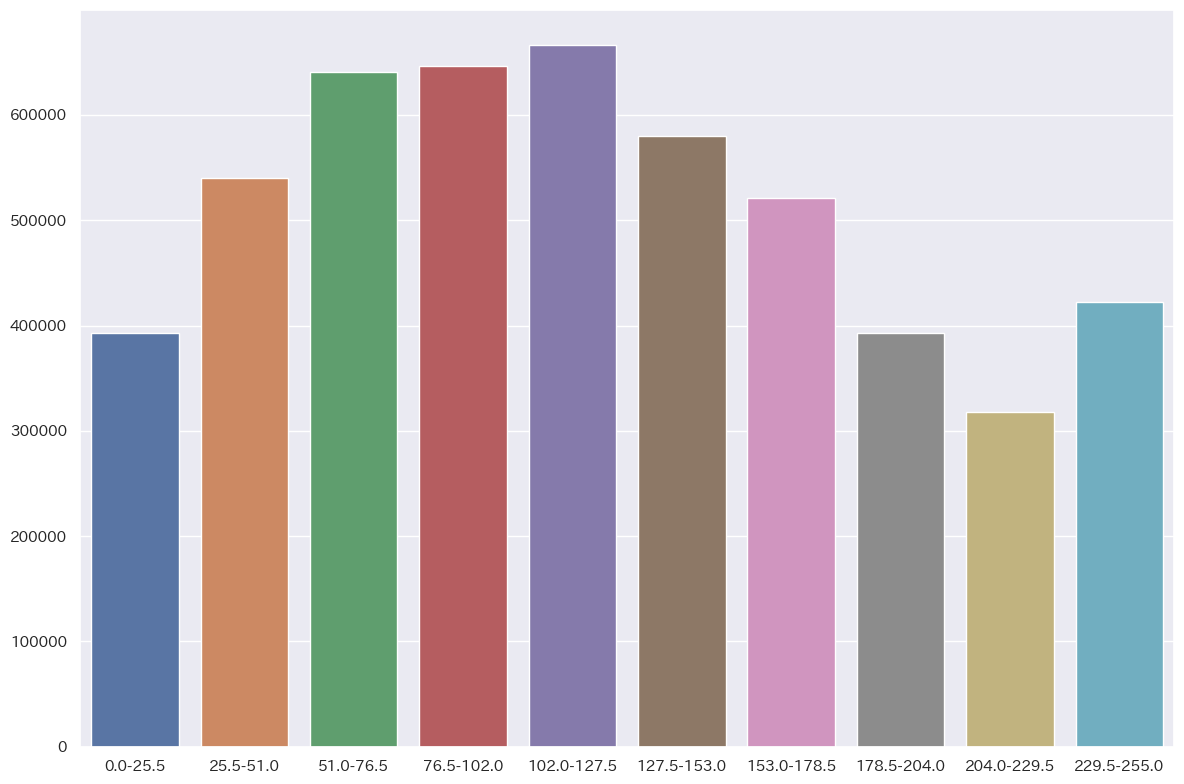

 * bird


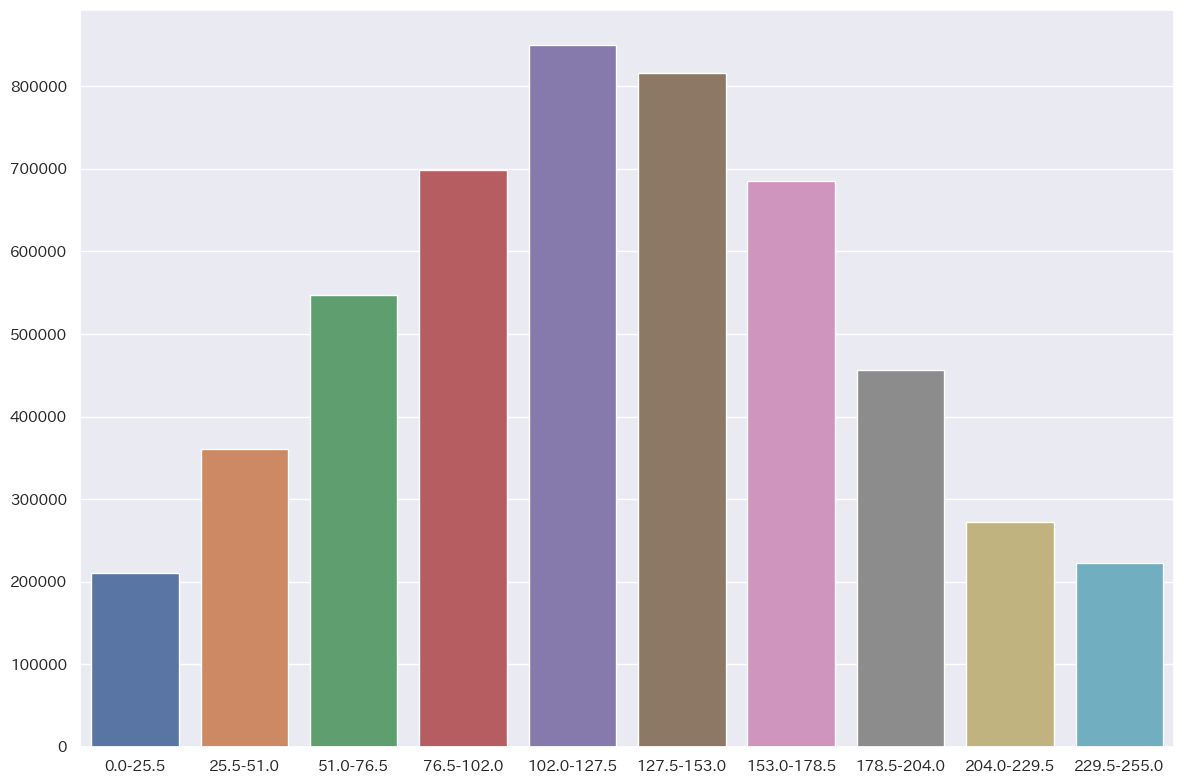

 * cat


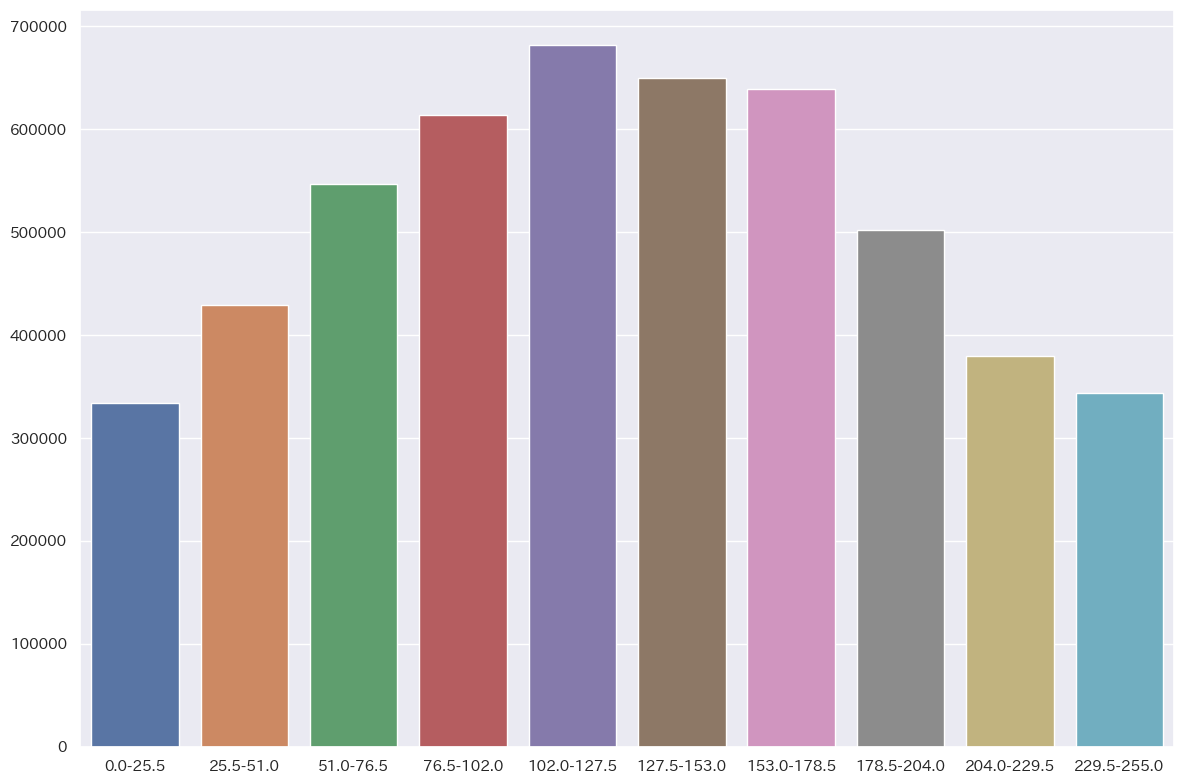

 * deer


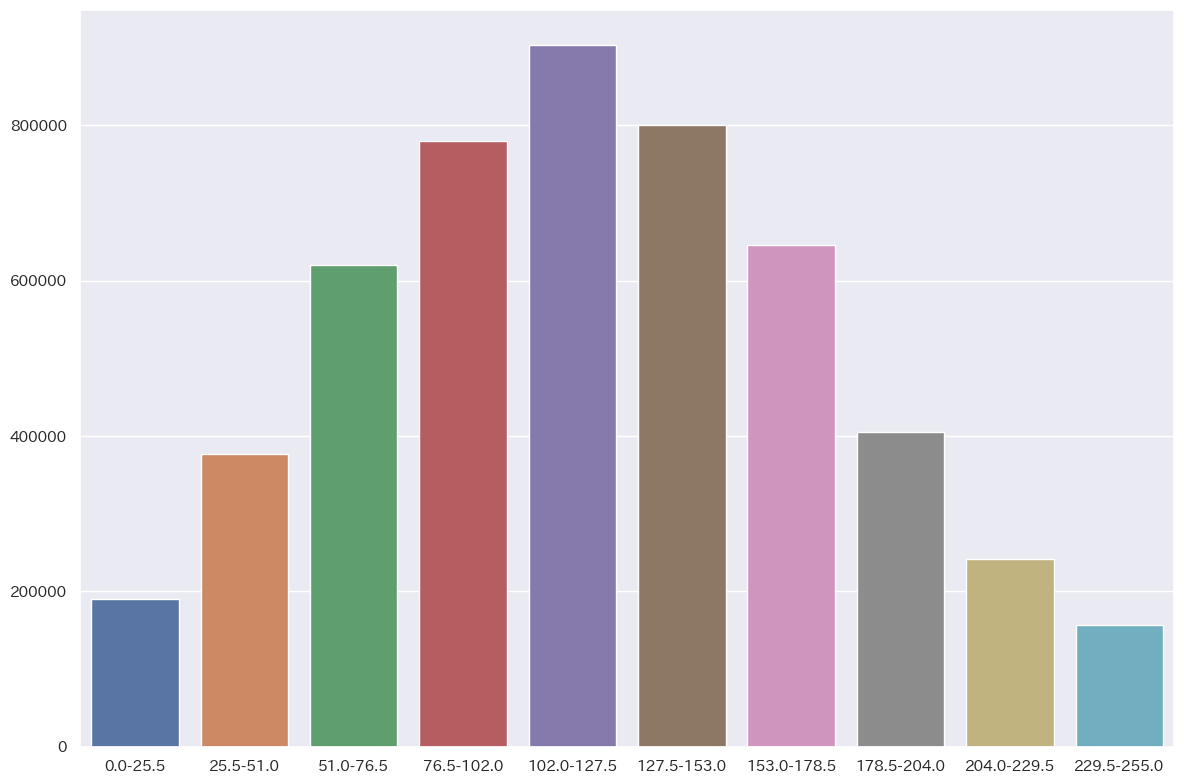

 * dog


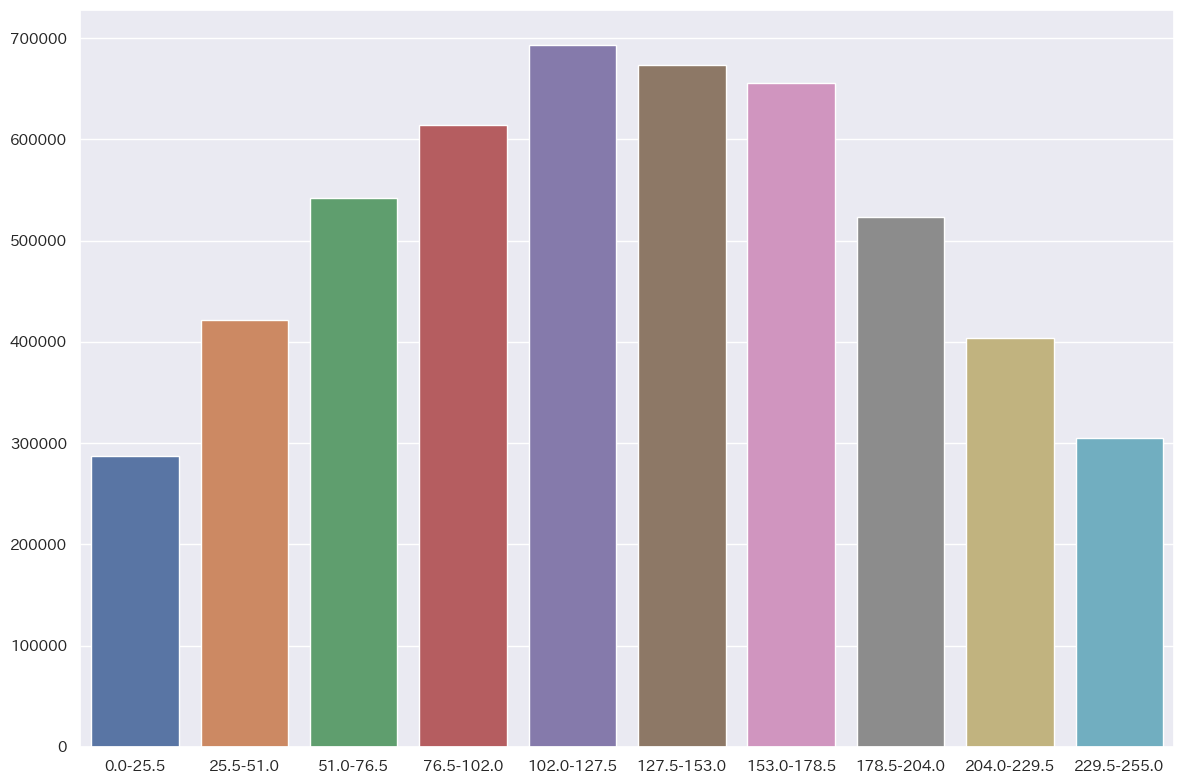

 * frog


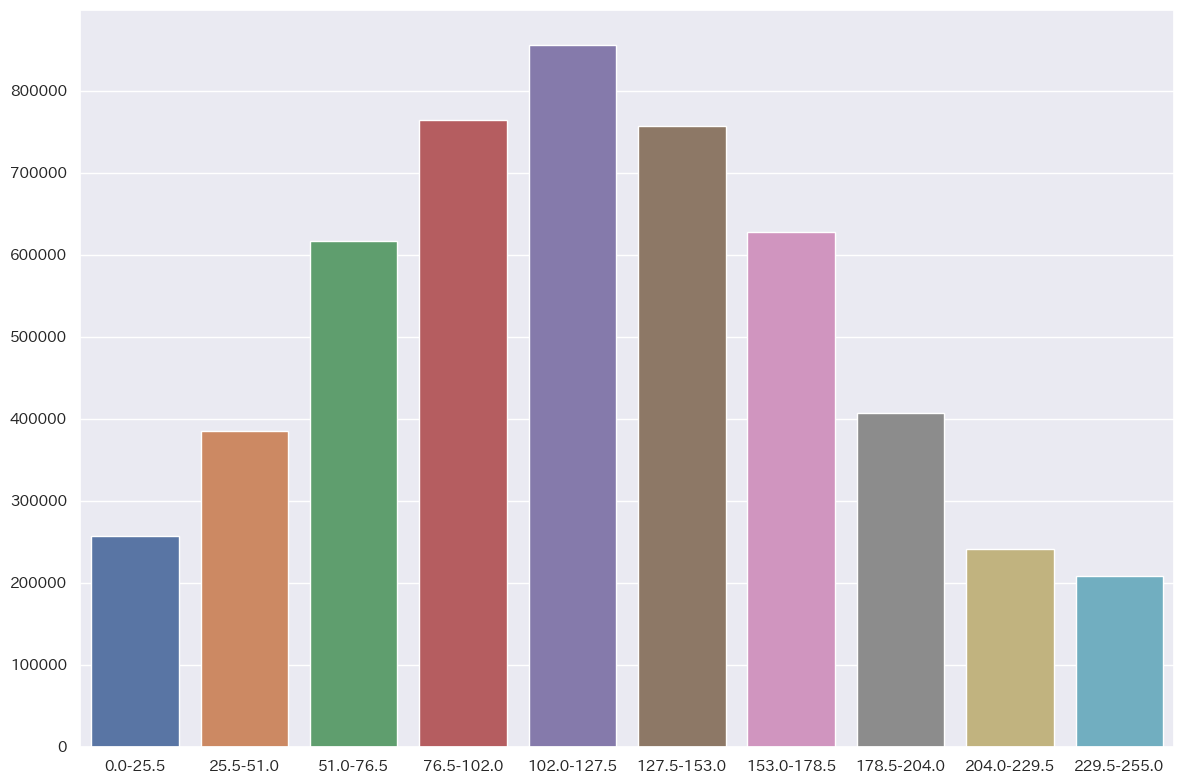

 * horse


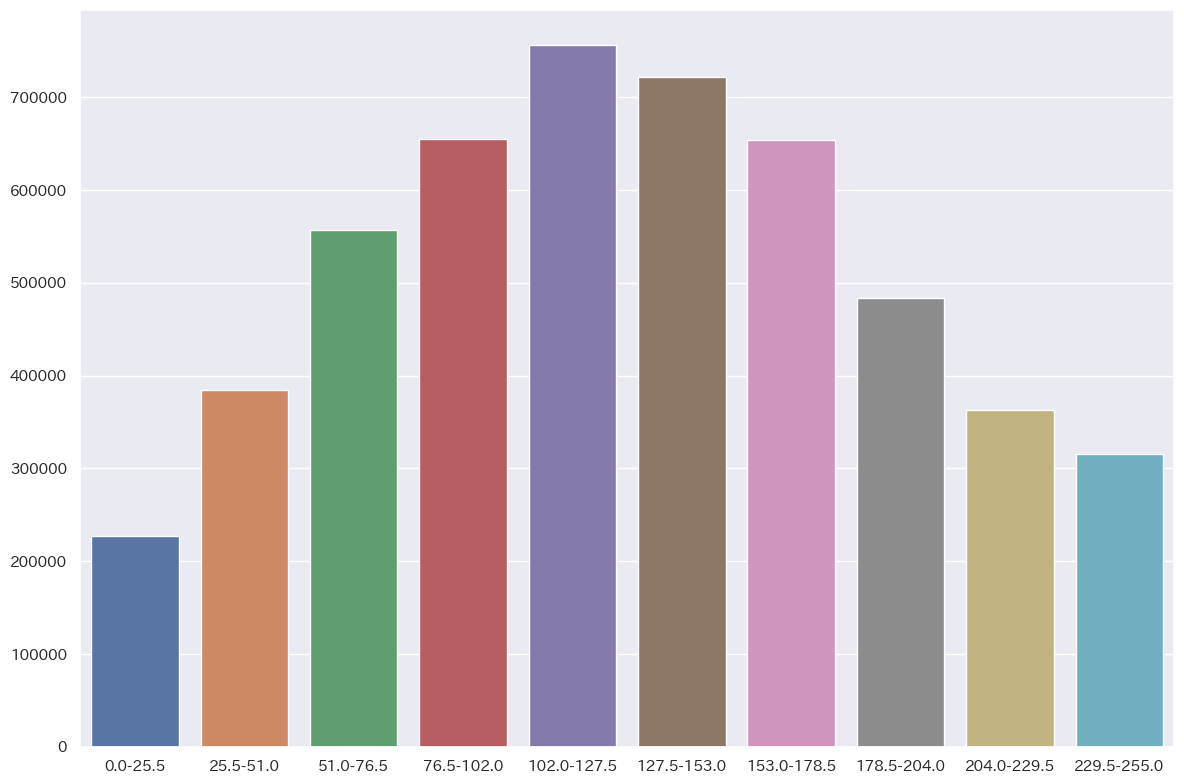

 * ship


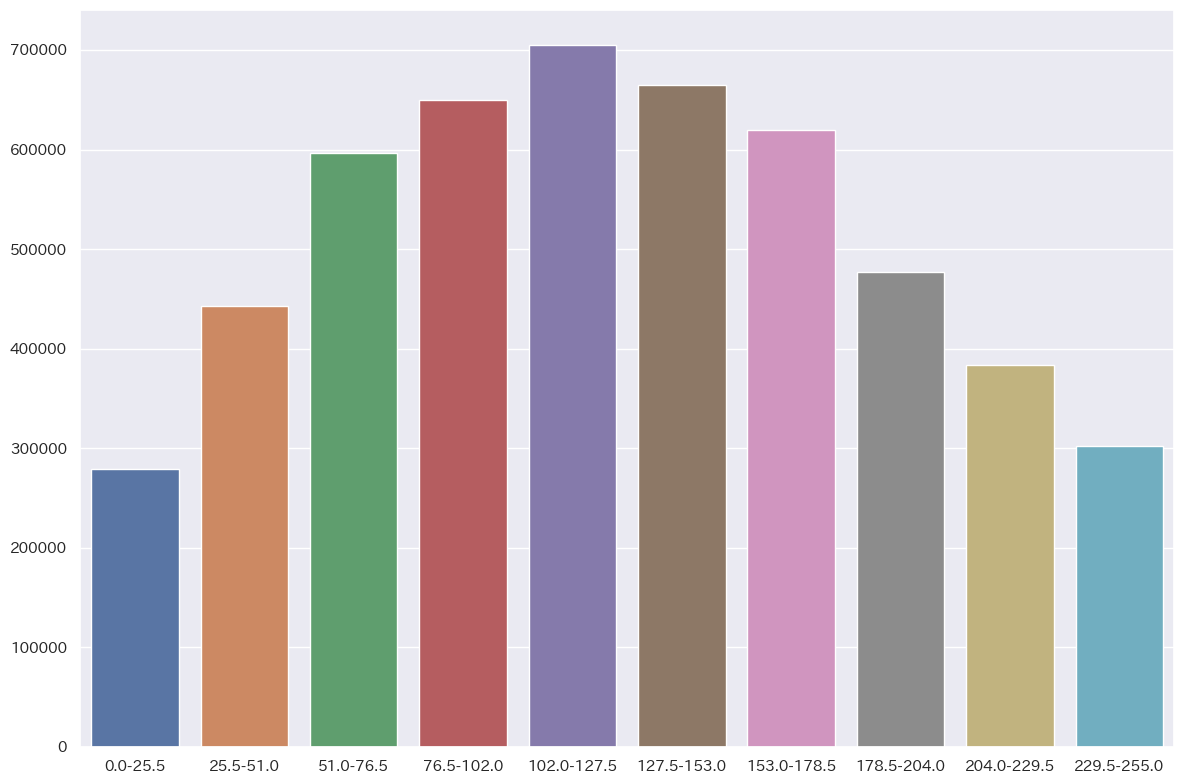

 * truck


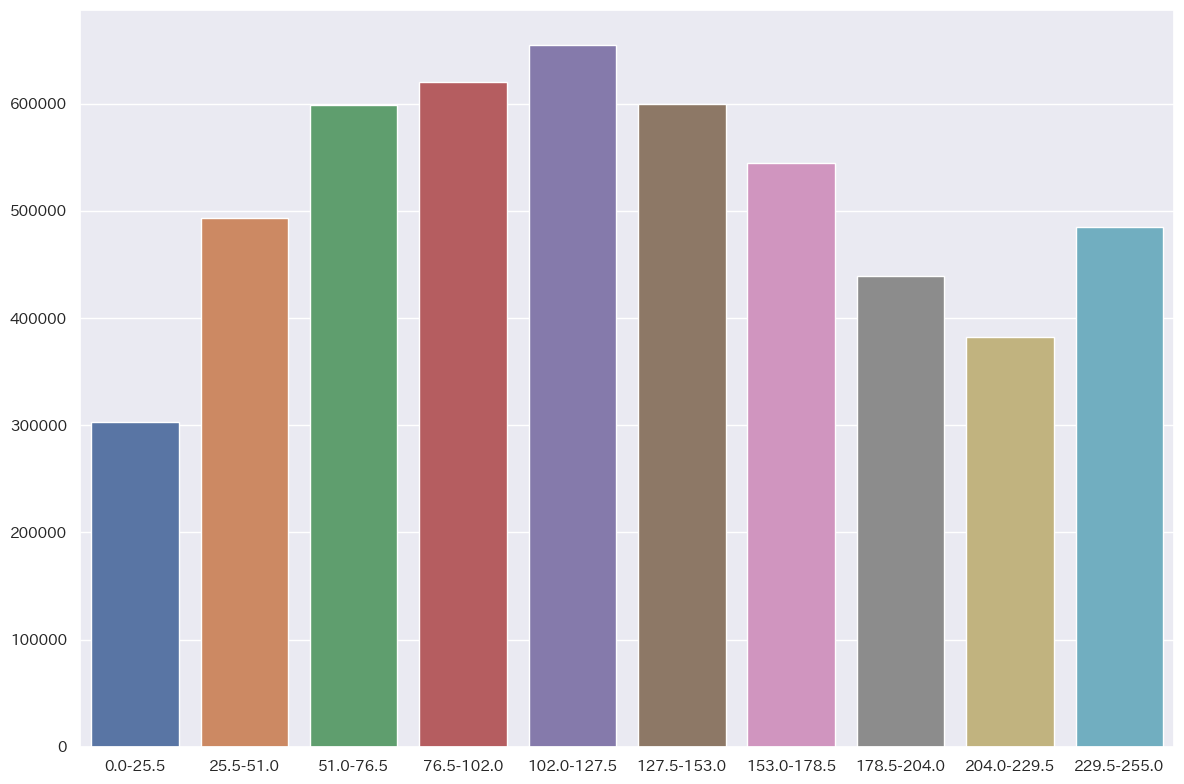

<< G >>
 * airplane


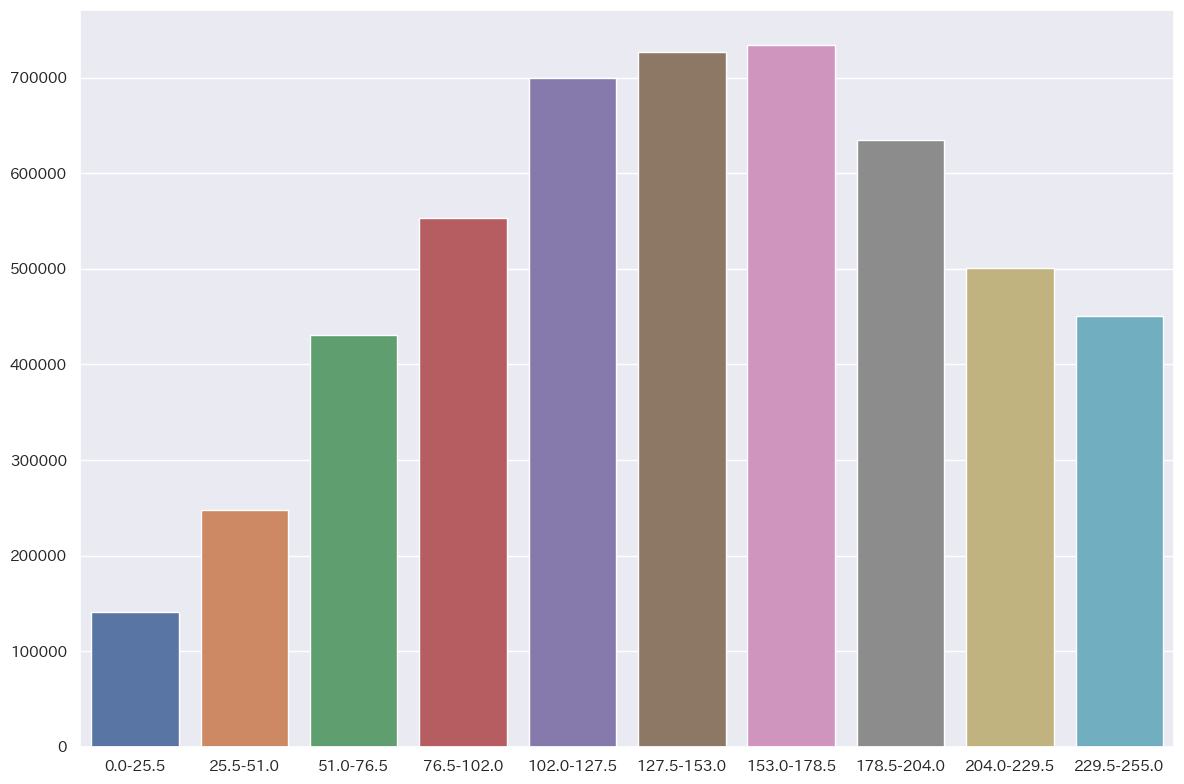

 * automobile


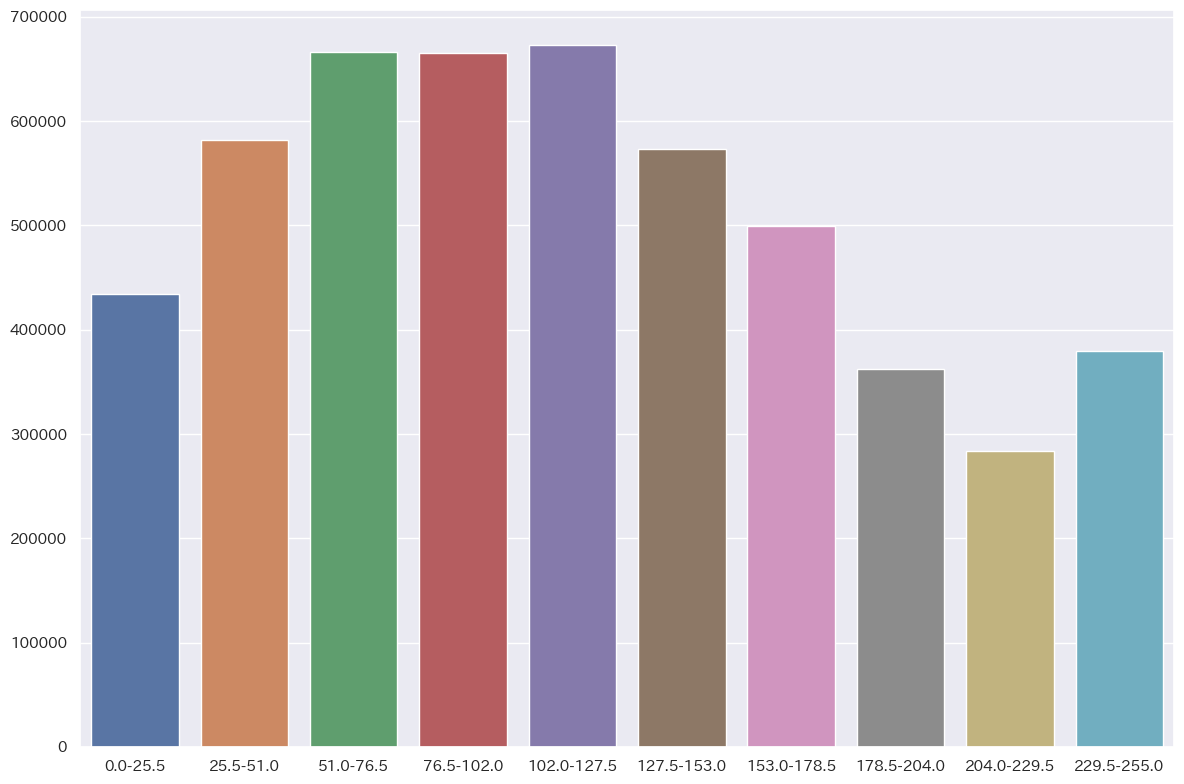

 * bird


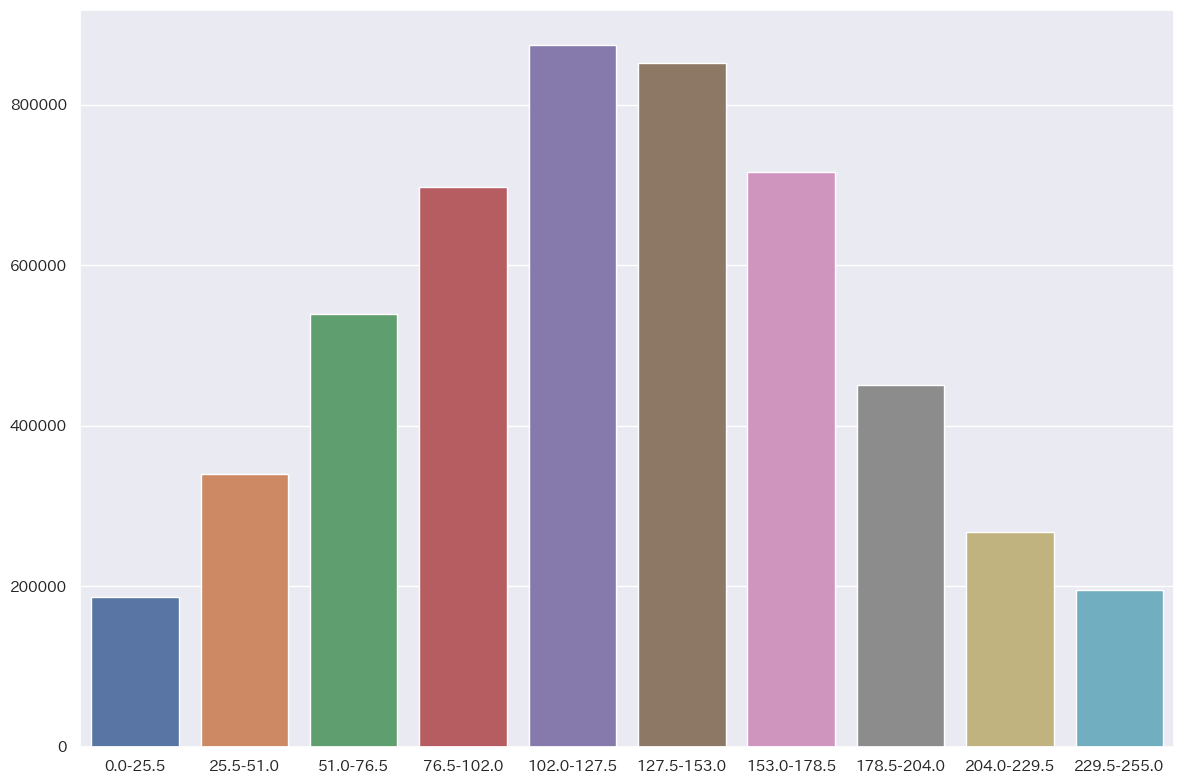

 * cat


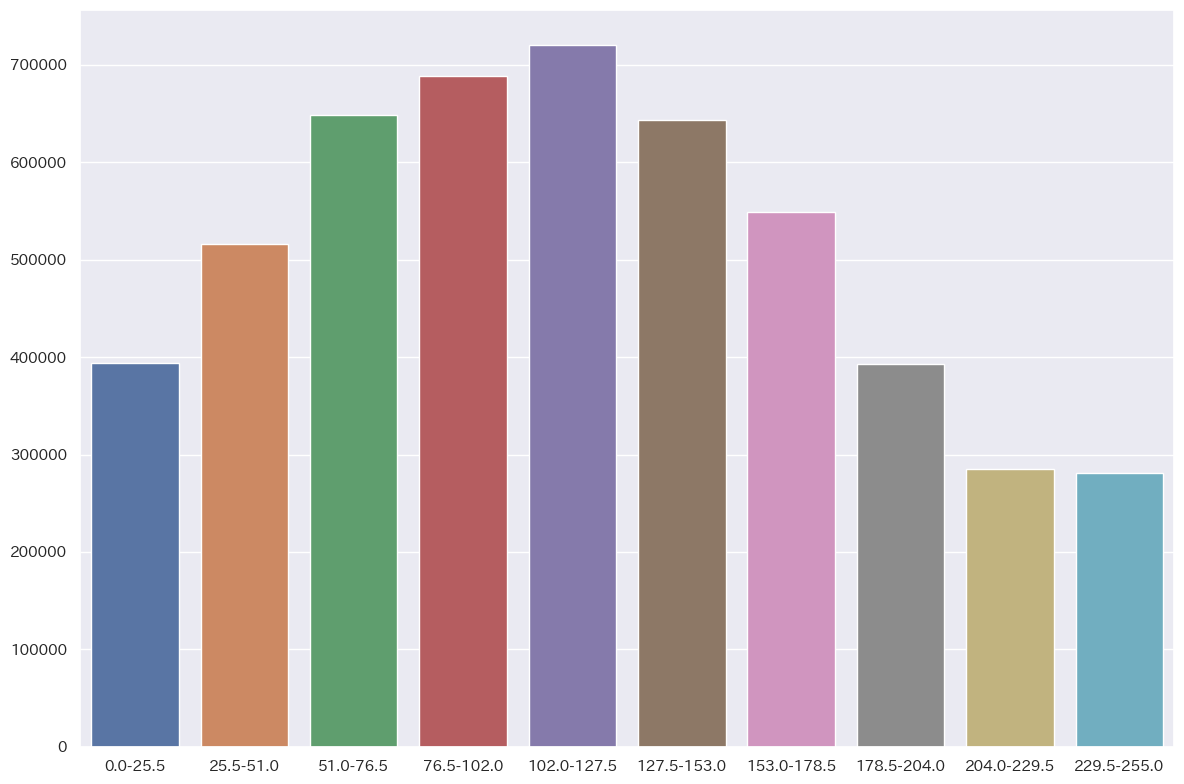

 * deer


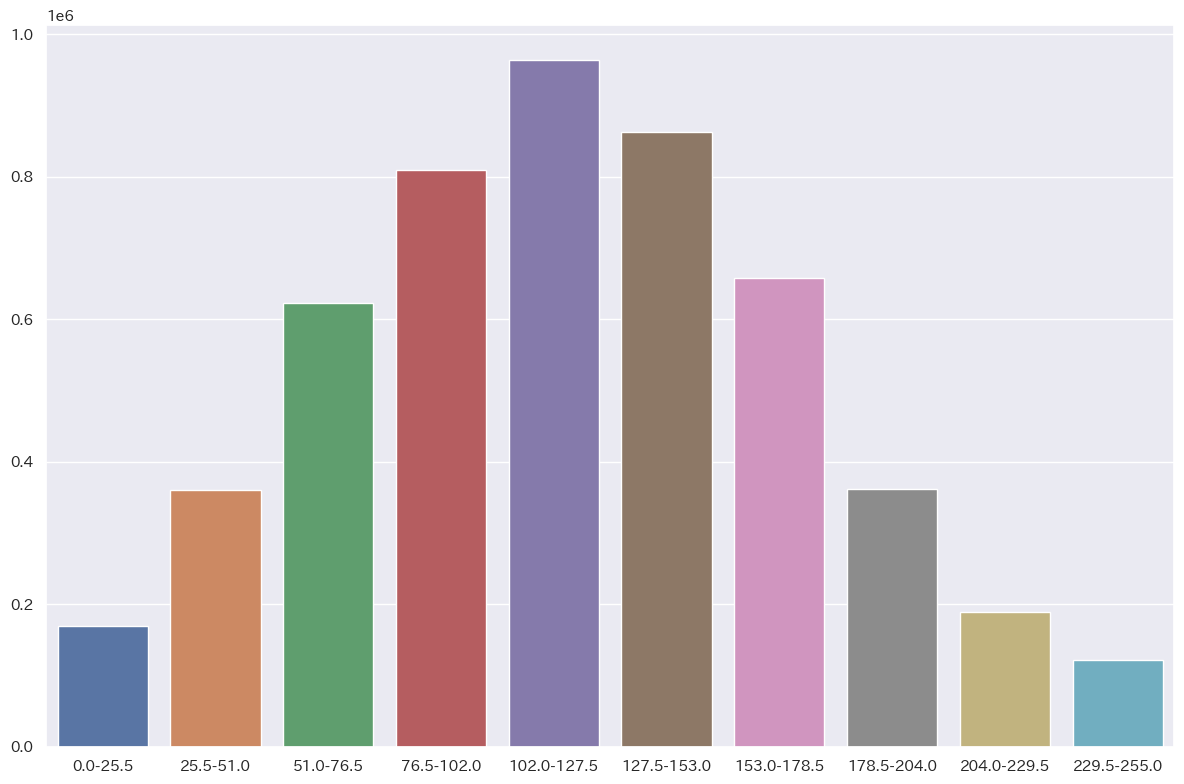

 * dog


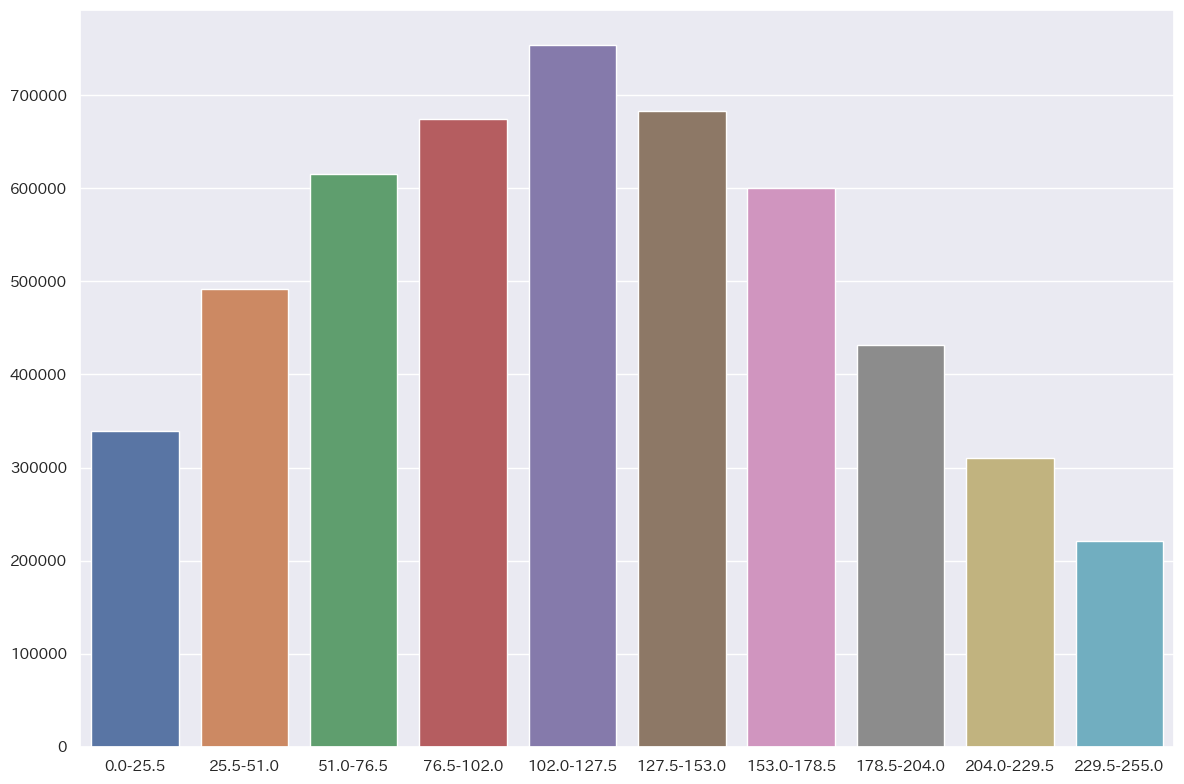

 * frog


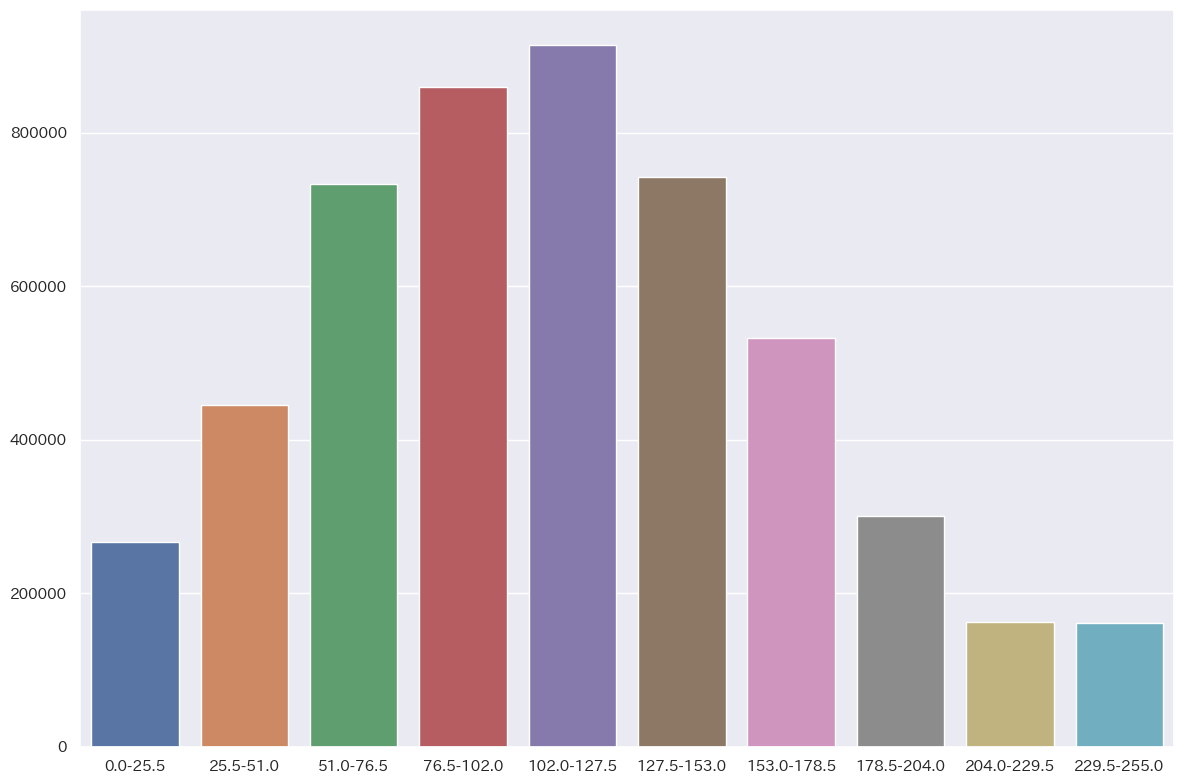

 * horse


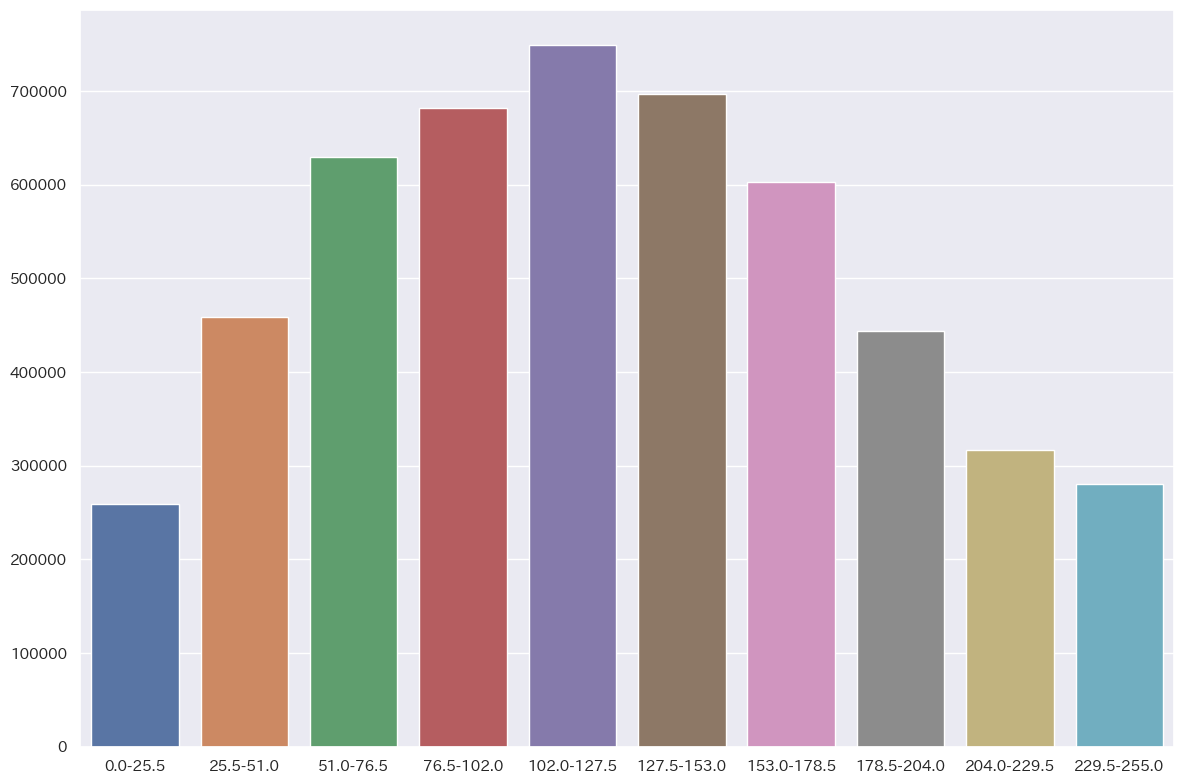

 * ship


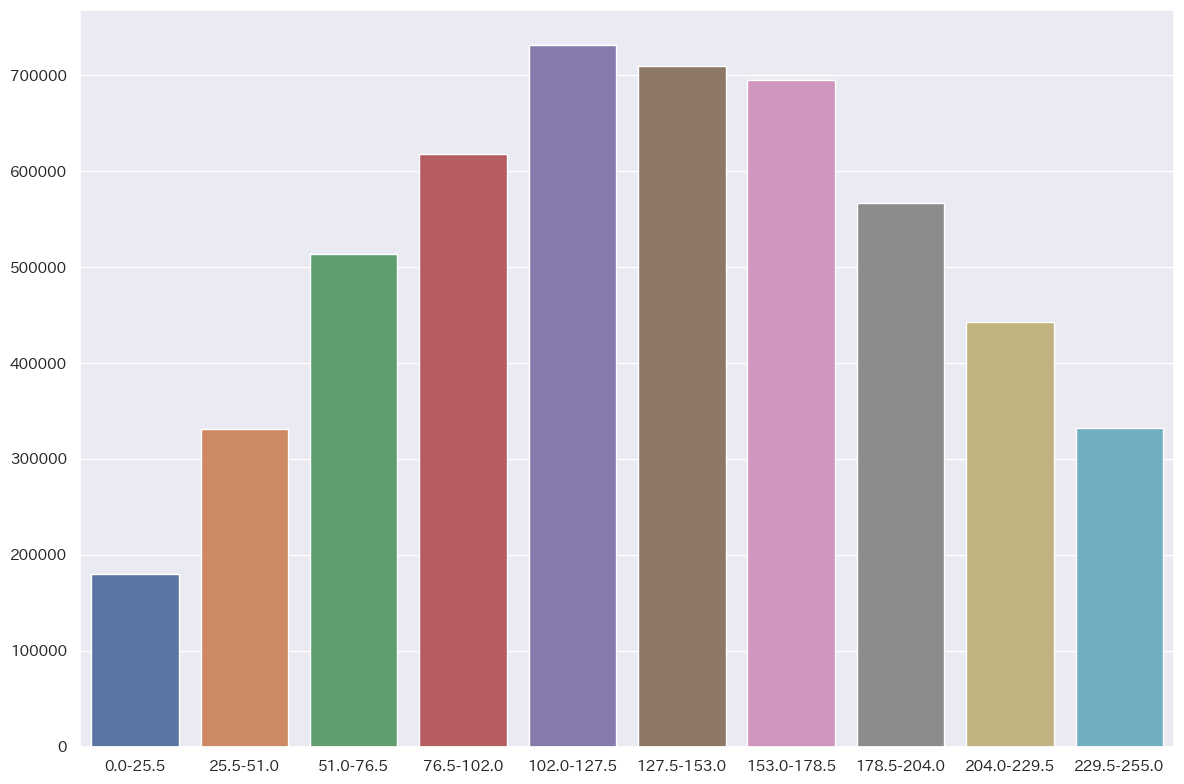

 * truck


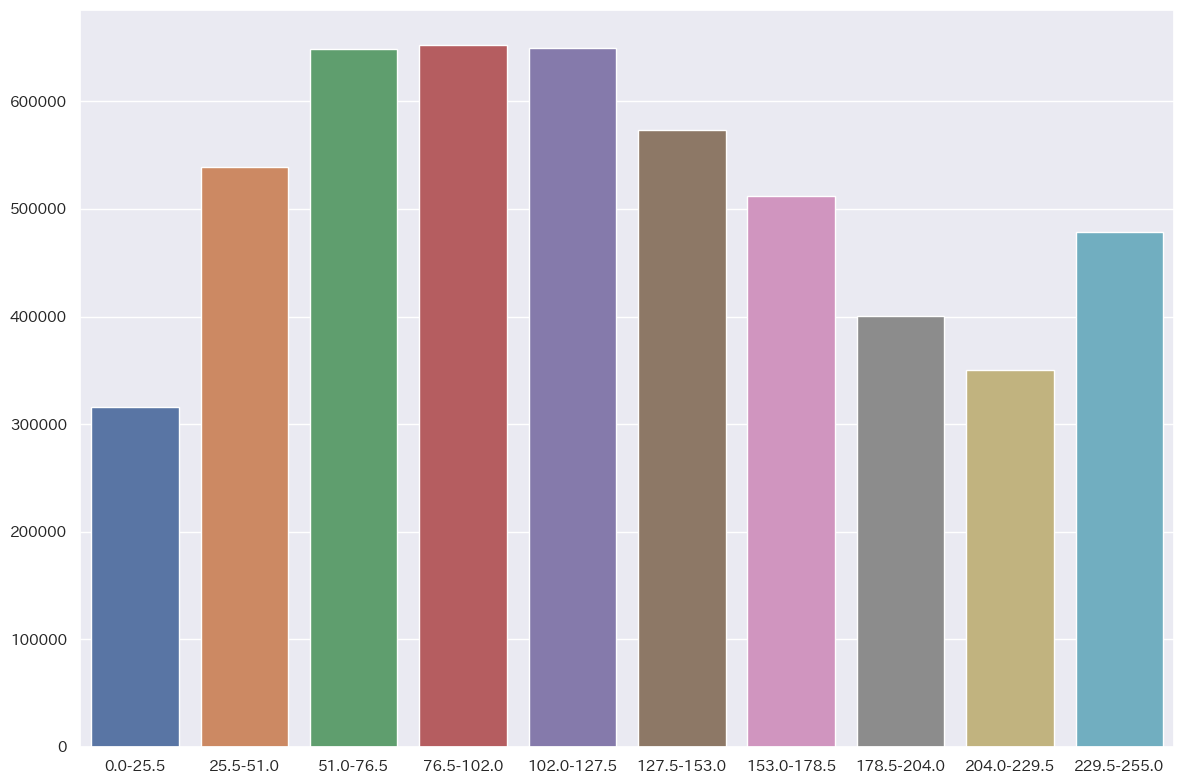

<< B >>
 * airplane


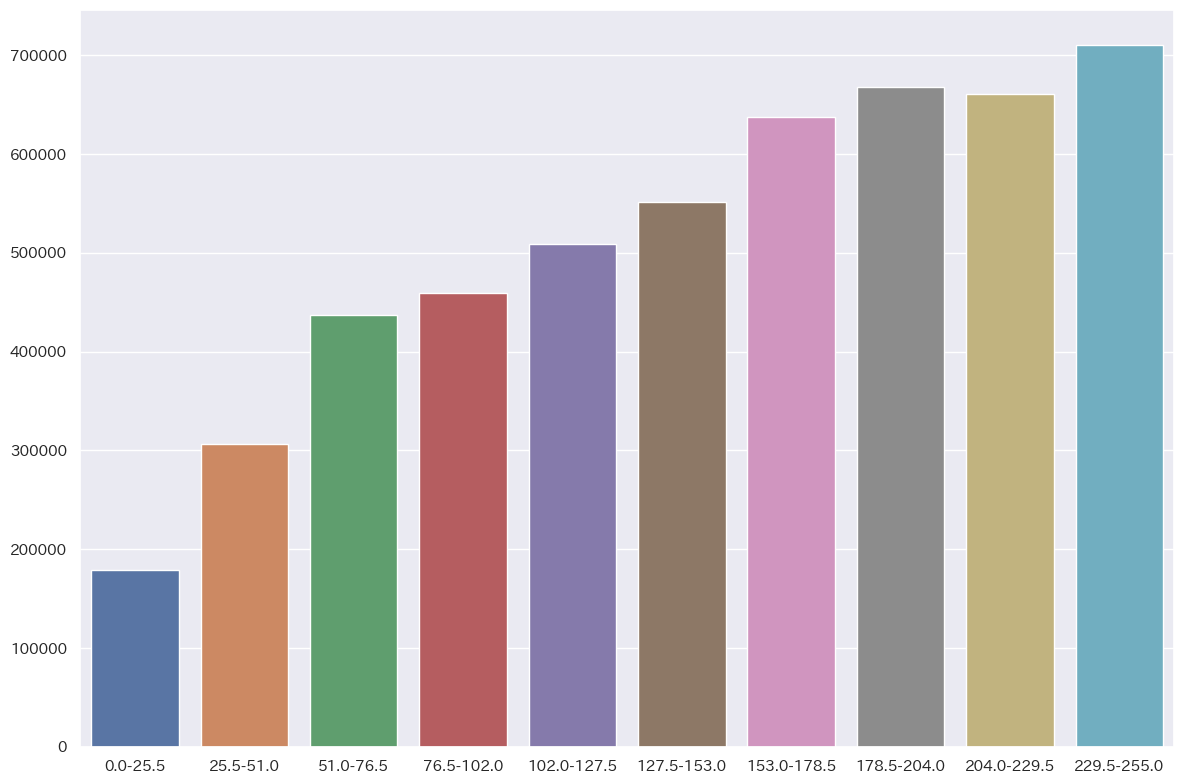

 * automobile


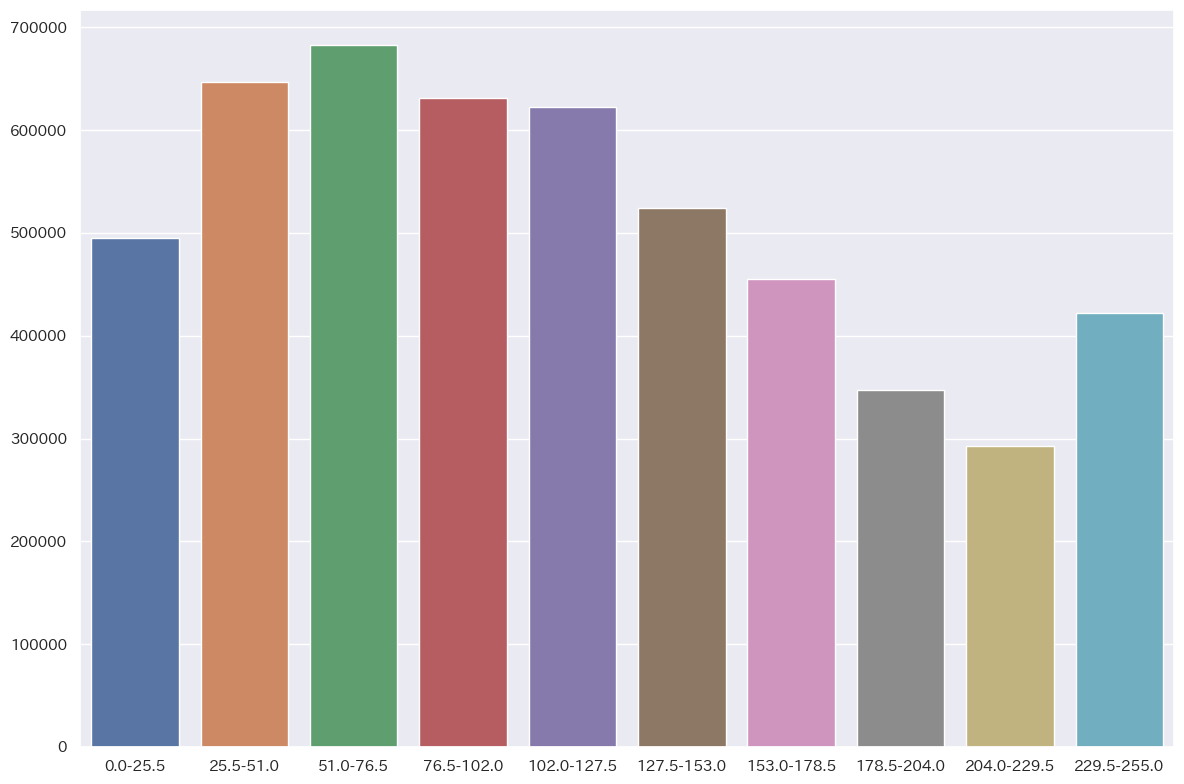

 * bird


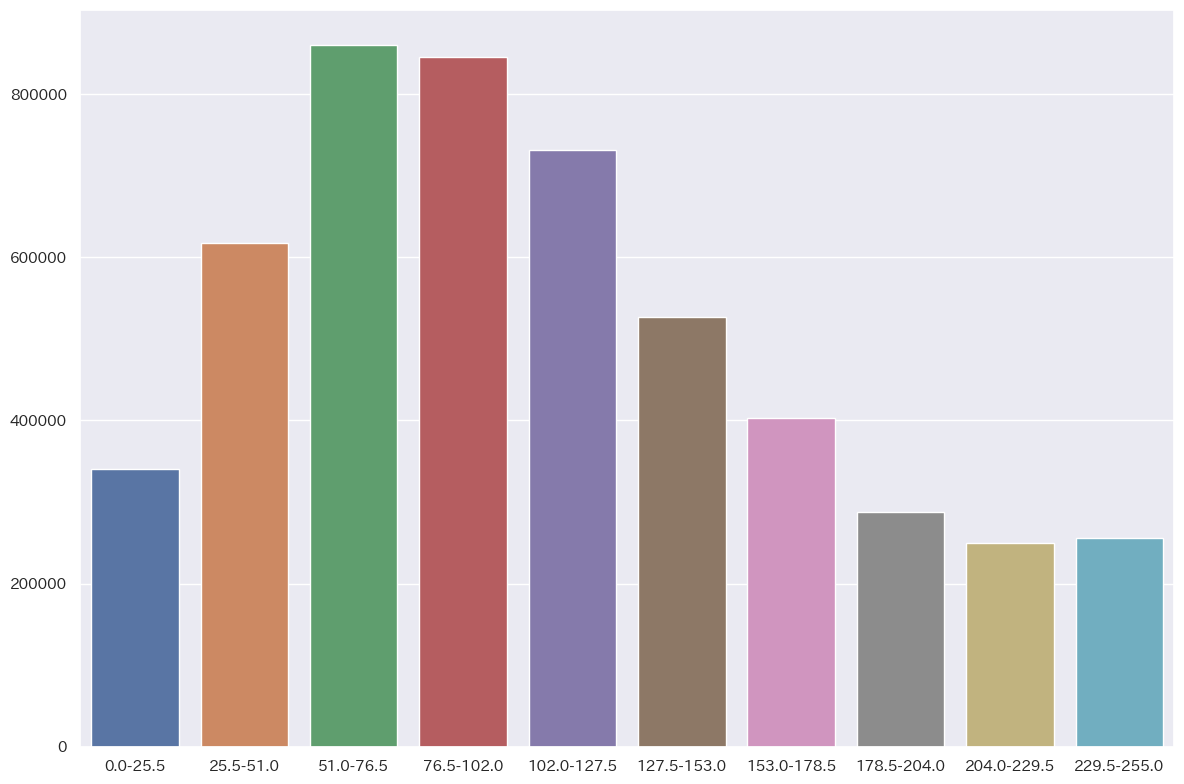

 * cat


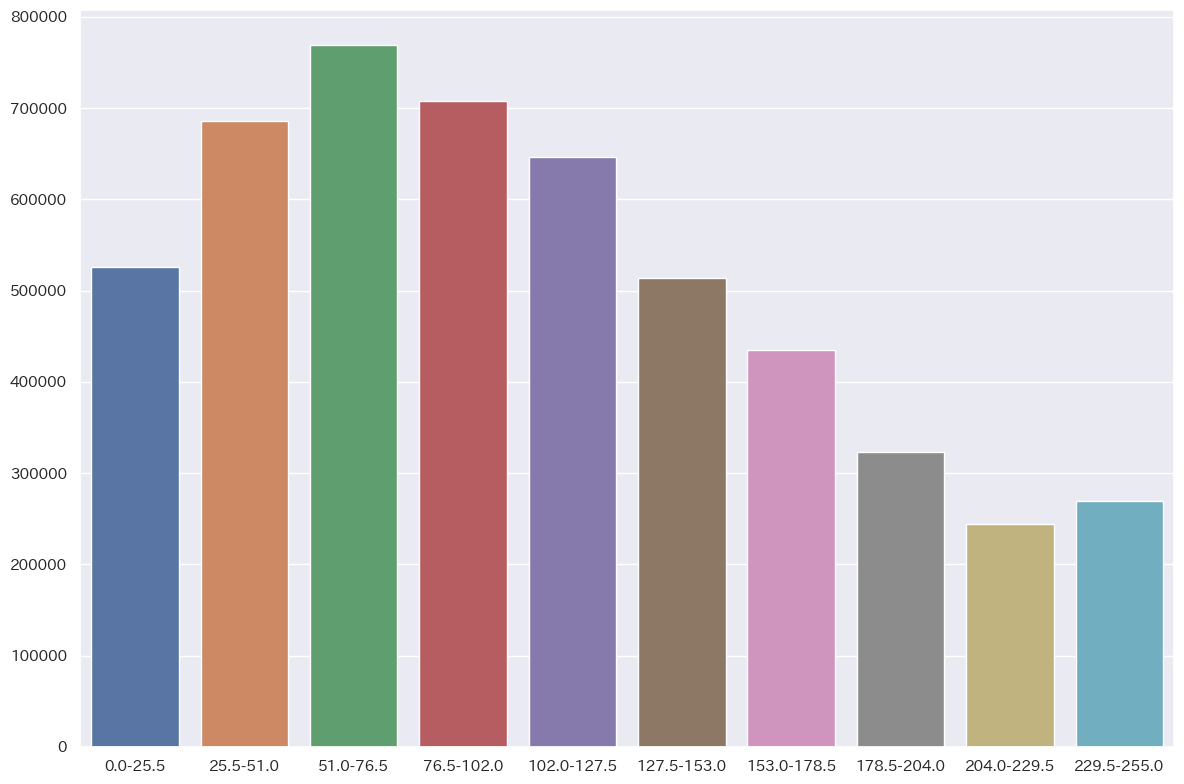

 * deer


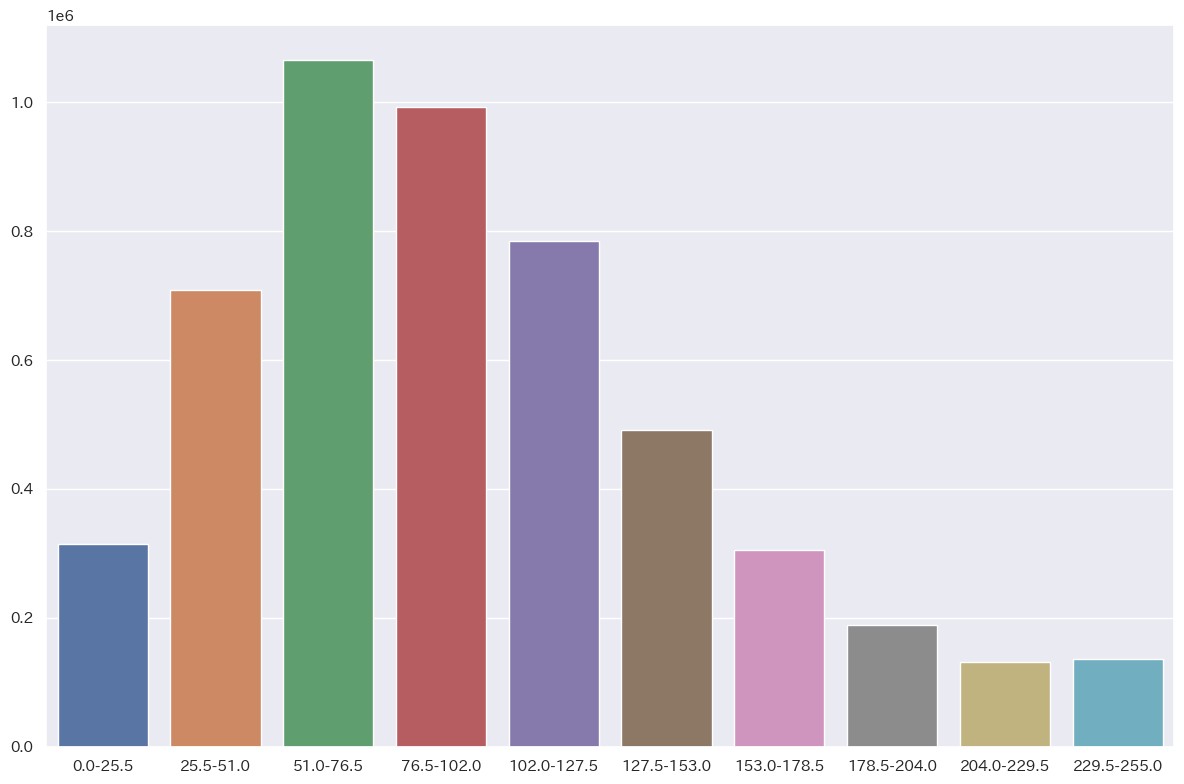

 * dog


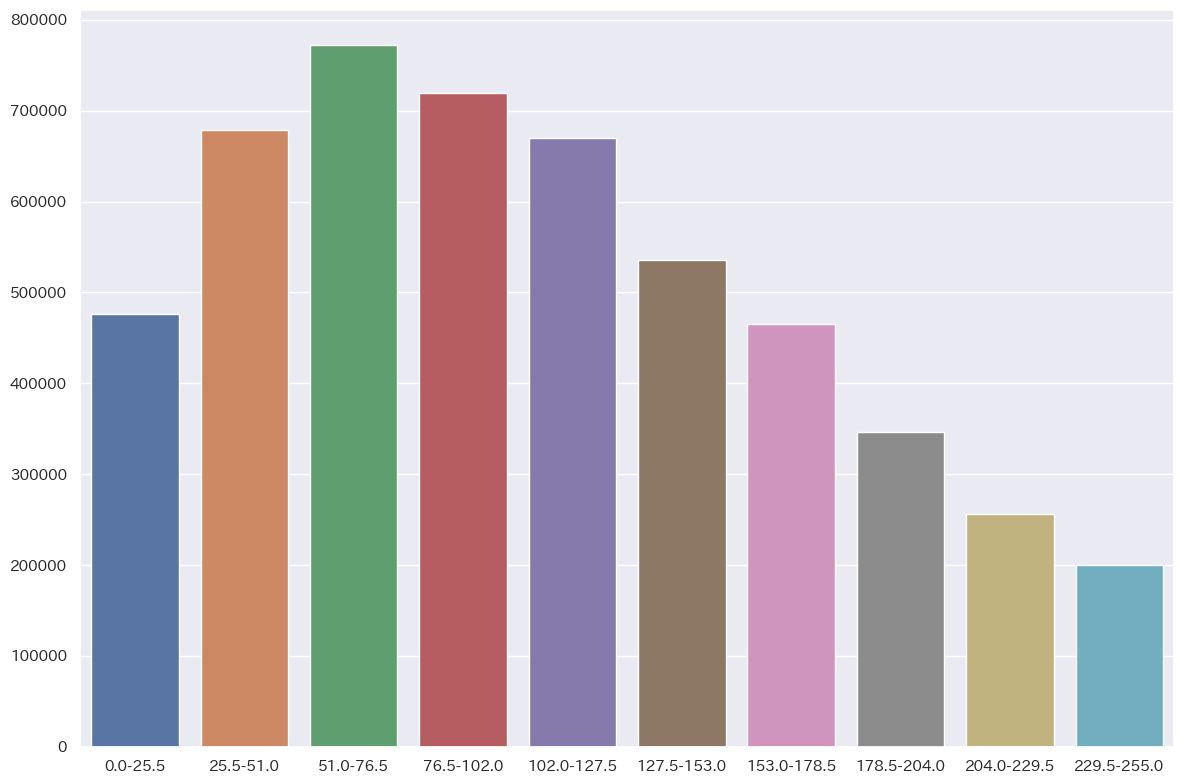

 * frog


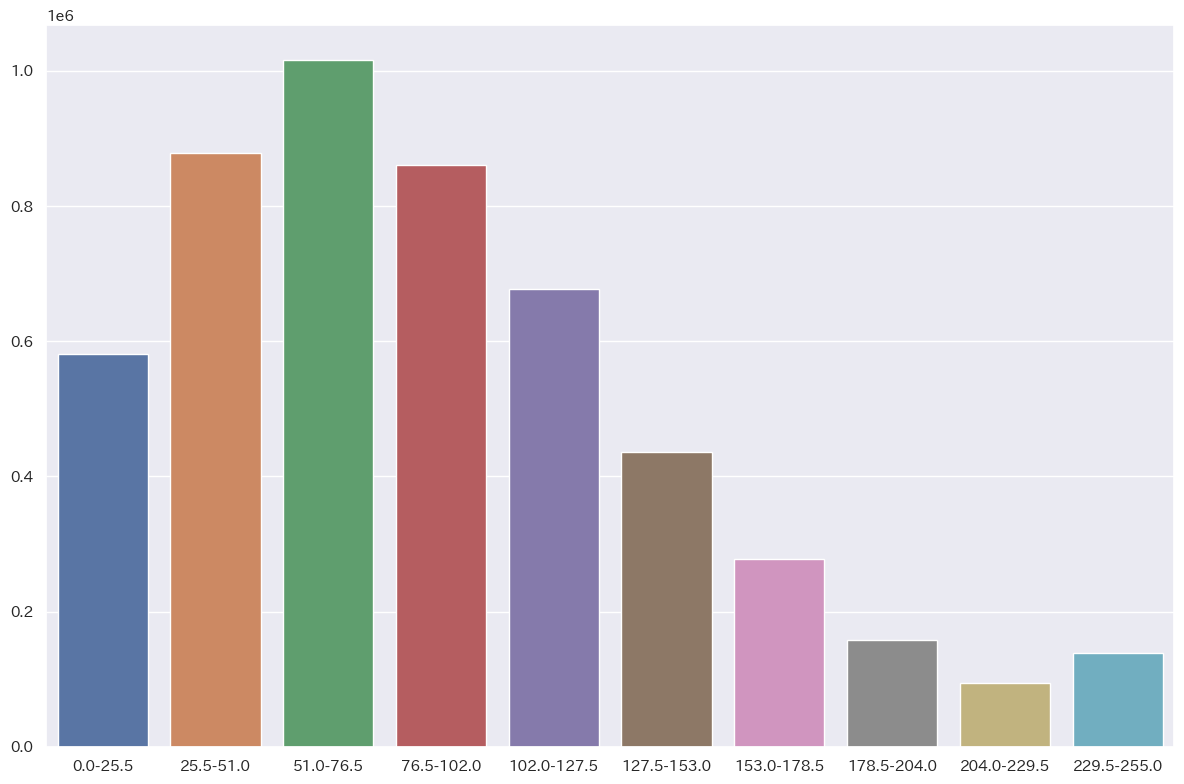

 * horse


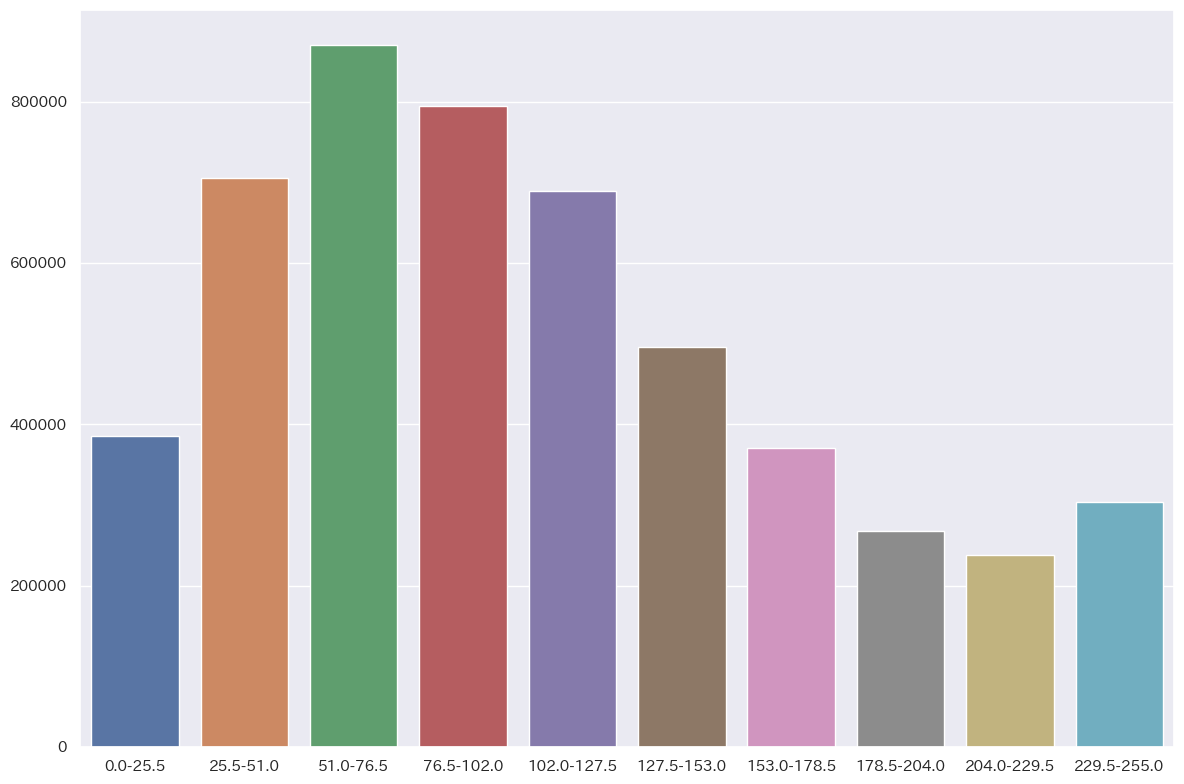

 * ship


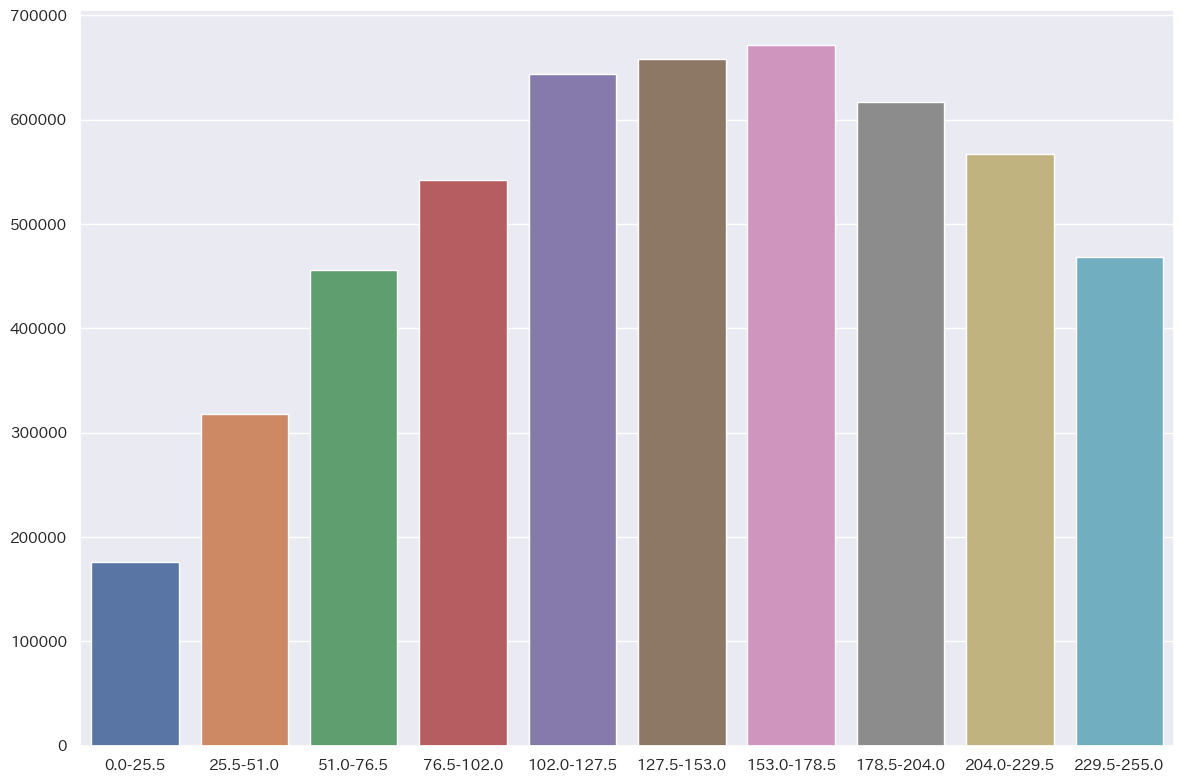

 * truck


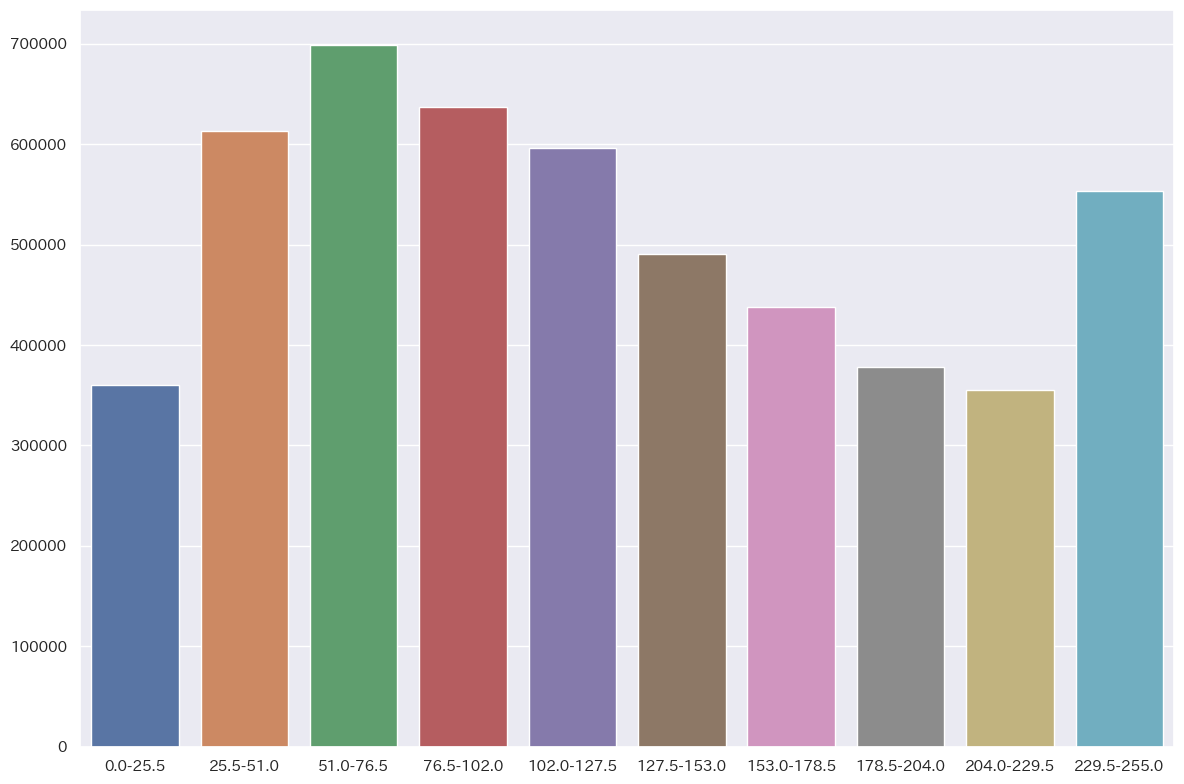

In [11]:
channels = ['R', 'G', 'B']
for ch in range(3):
    print(f'<< {channels[ch]} >>')
    for class_id in range(10):
        print(f' * {dict_y["label_names"][class_id]}')
        x = hist_rgb['floor_boundary']
        y = hist_rgb['frequency'][ch][class_id]
        plt.figure(figsize=(12, 8))
        sns.barplot(x=x, y=y)
        plt.tight_layout()
        plt.show()
        plt.close()

<< H >>
 * airplane


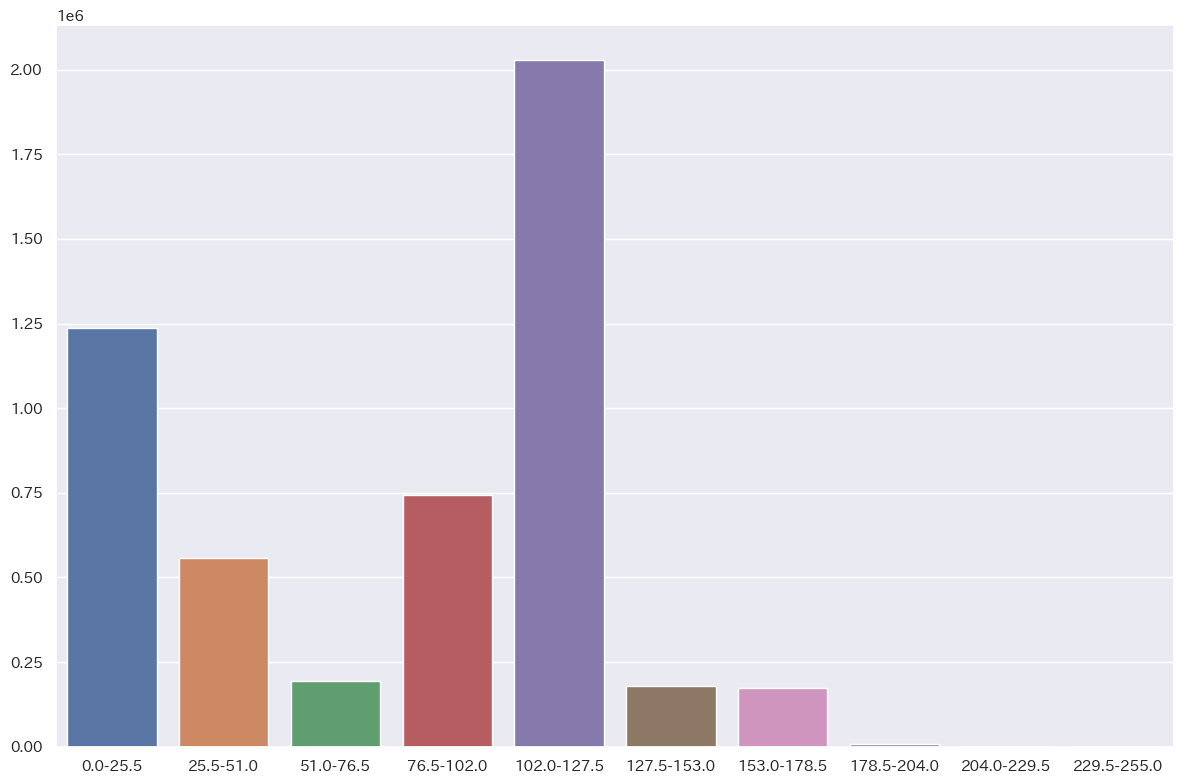

 * automobile


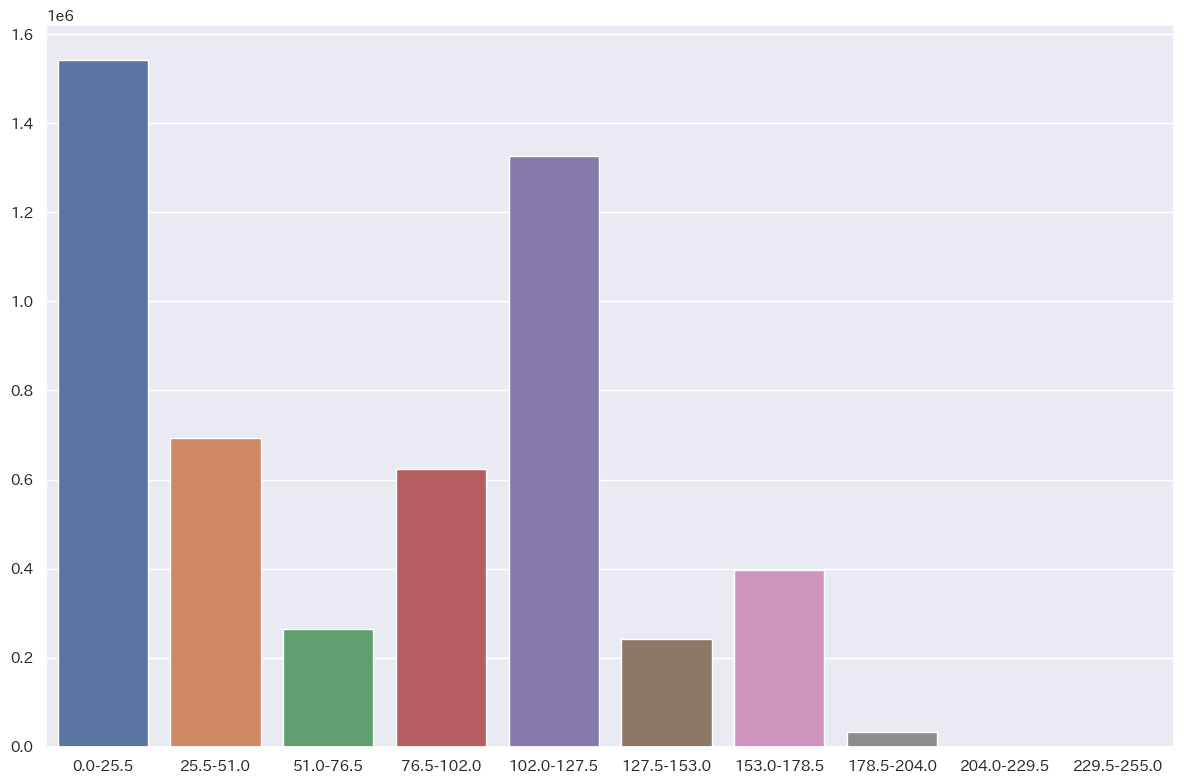

 * bird


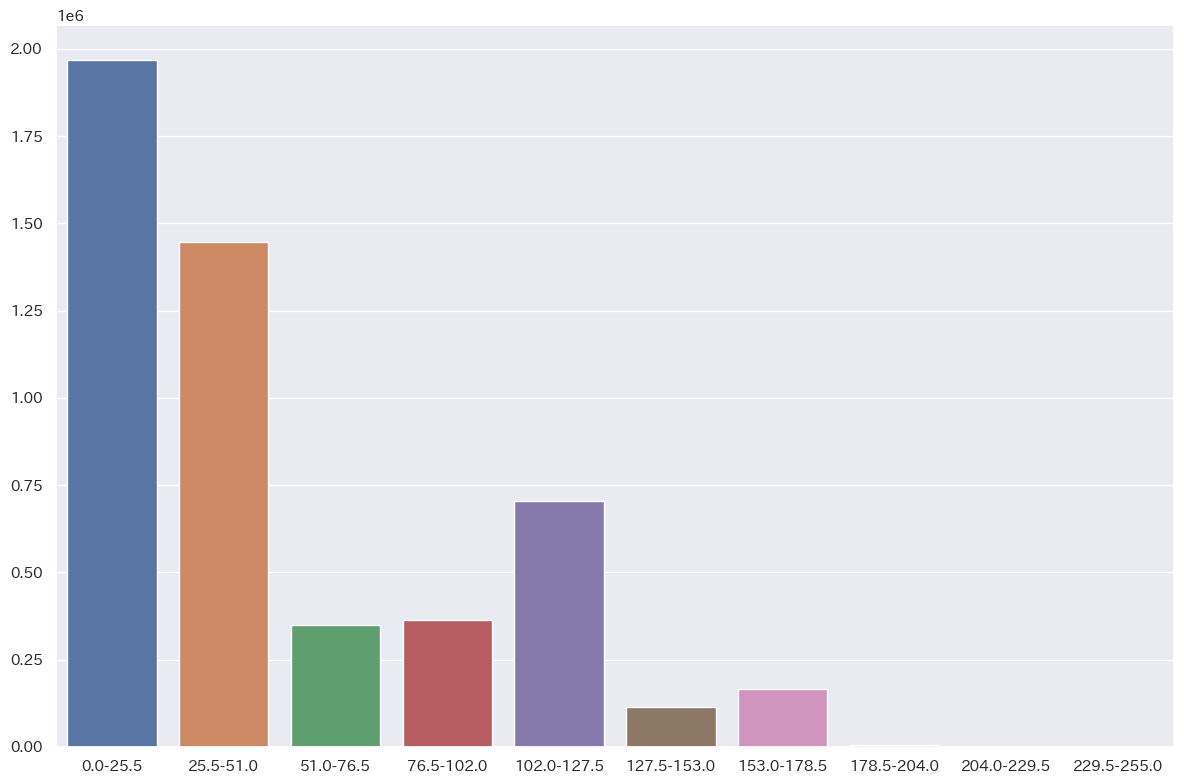

 * cat


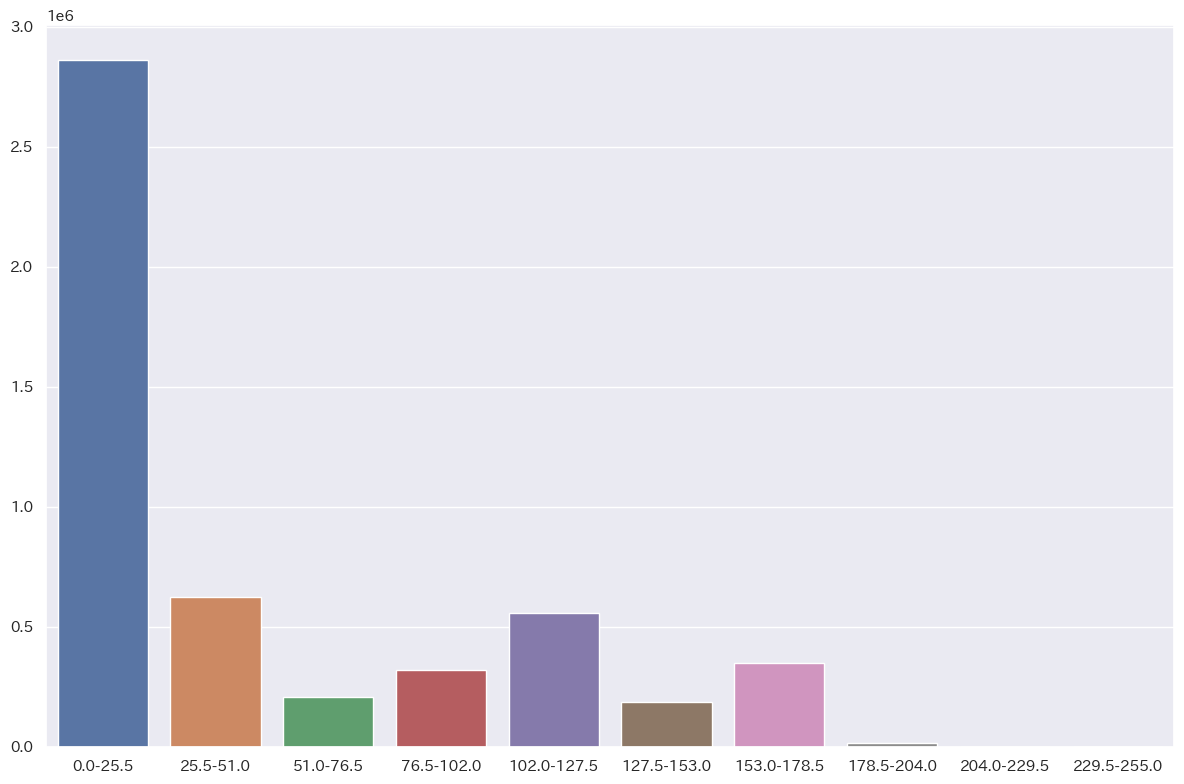

 * deer


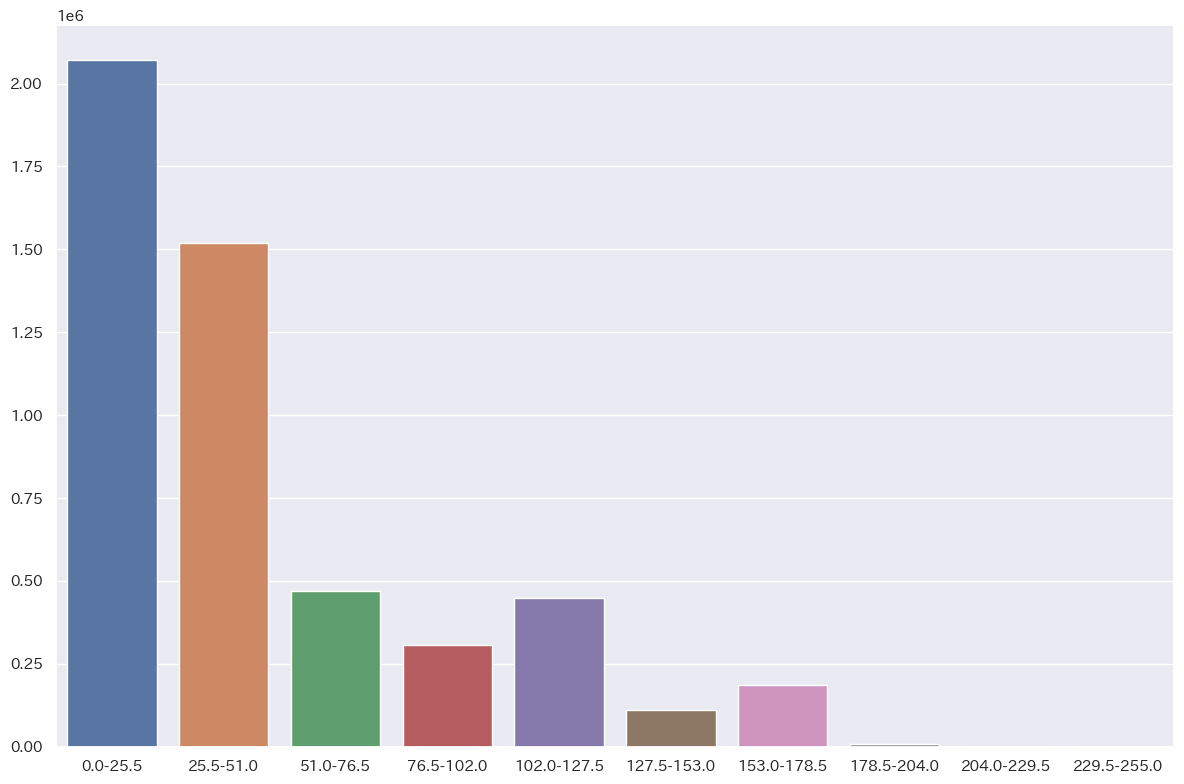

 * dog


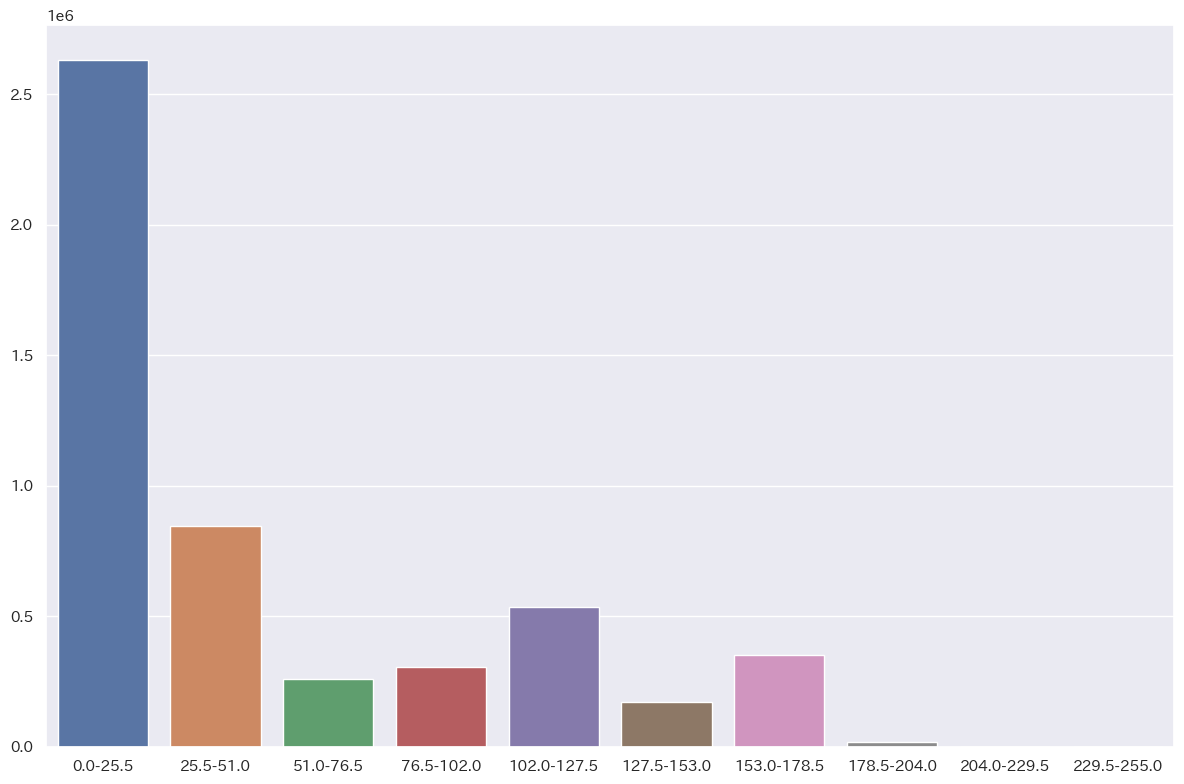

 * frog


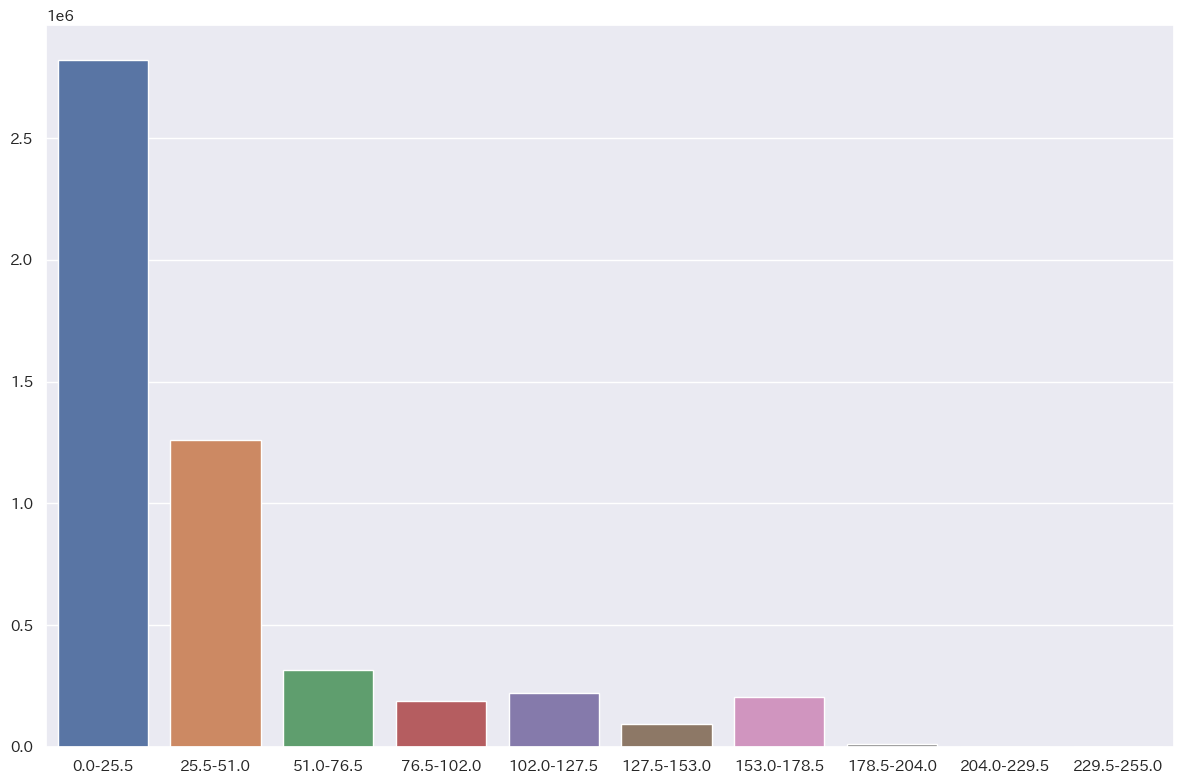

 * horse


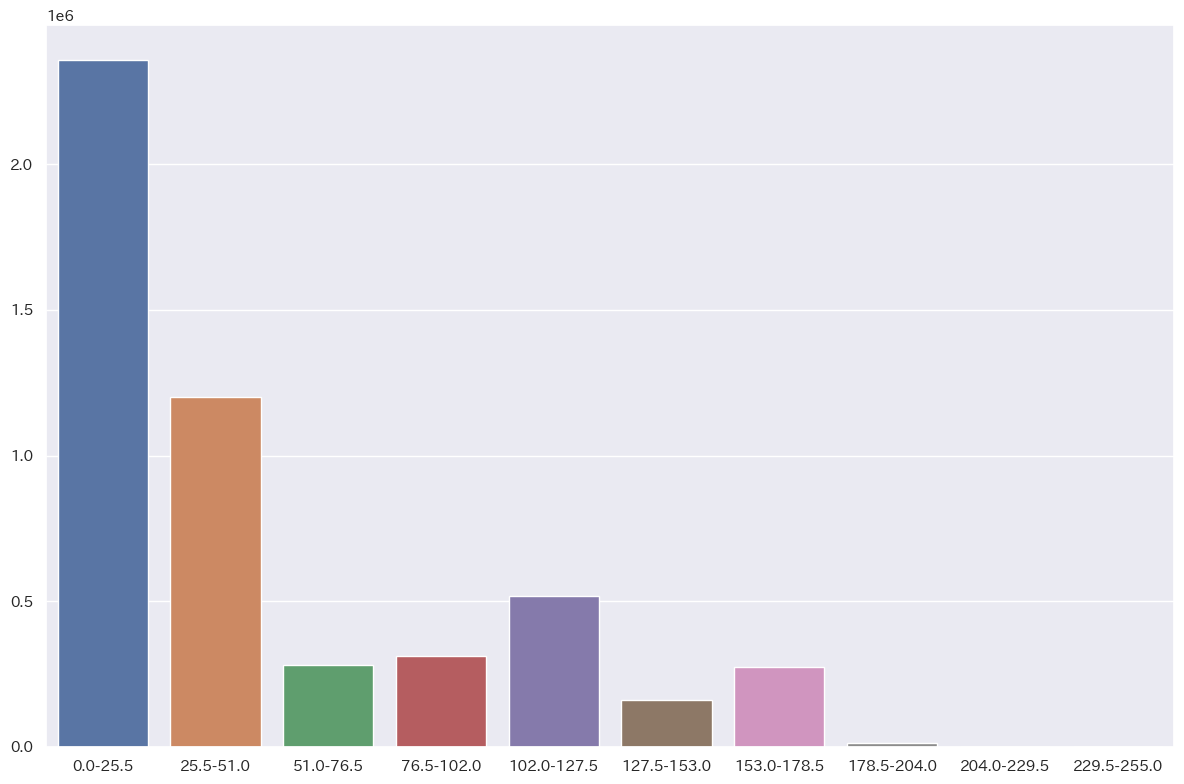

 * ship


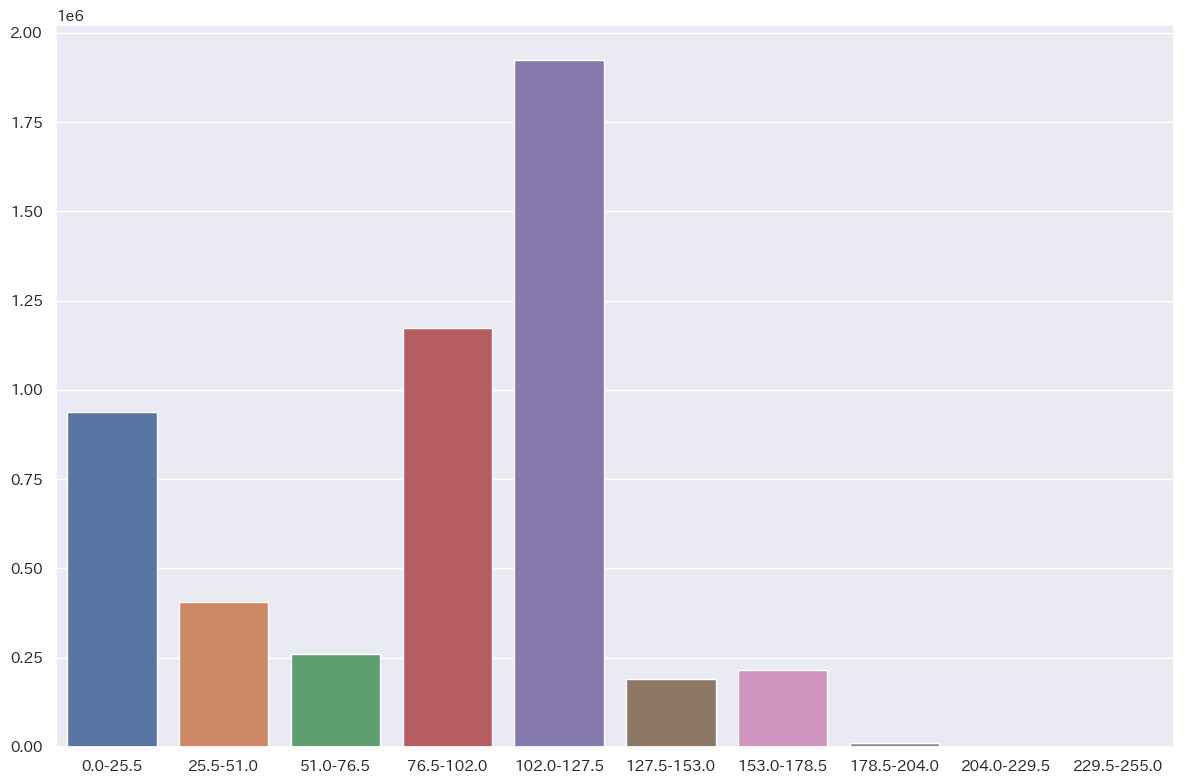

 * truck


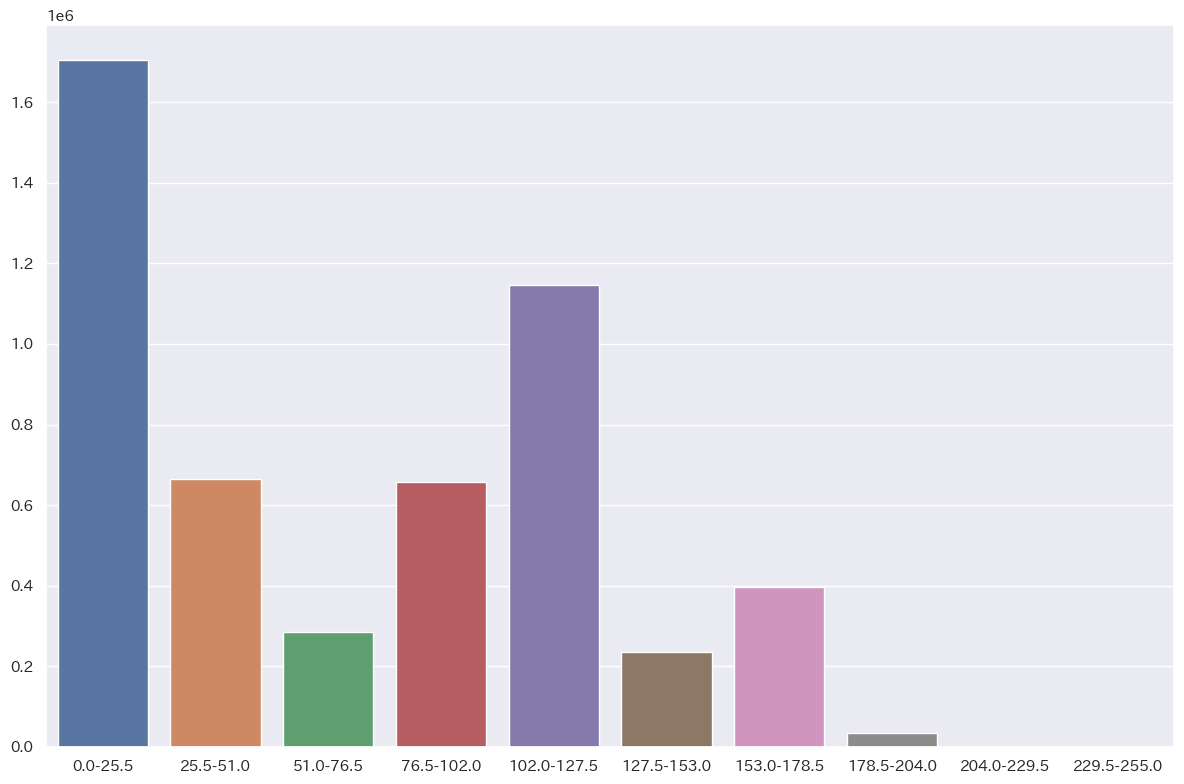

<< S >>
 * airplane


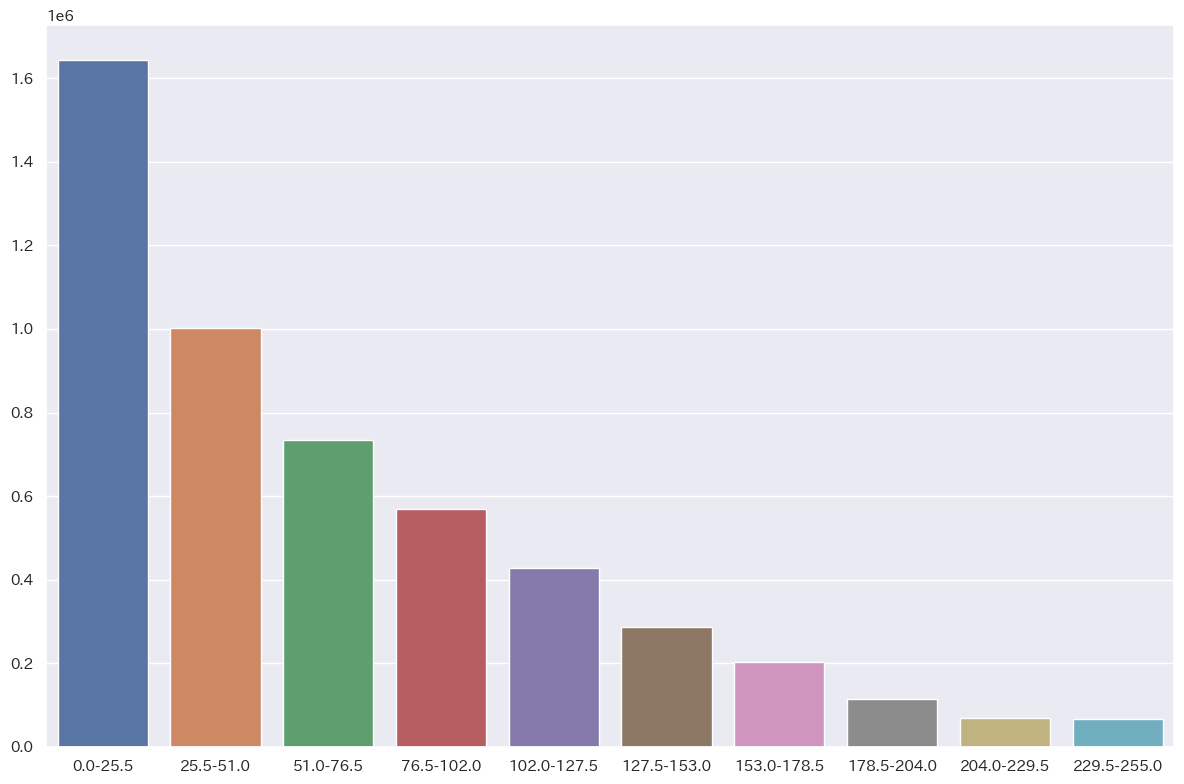

 * automobile


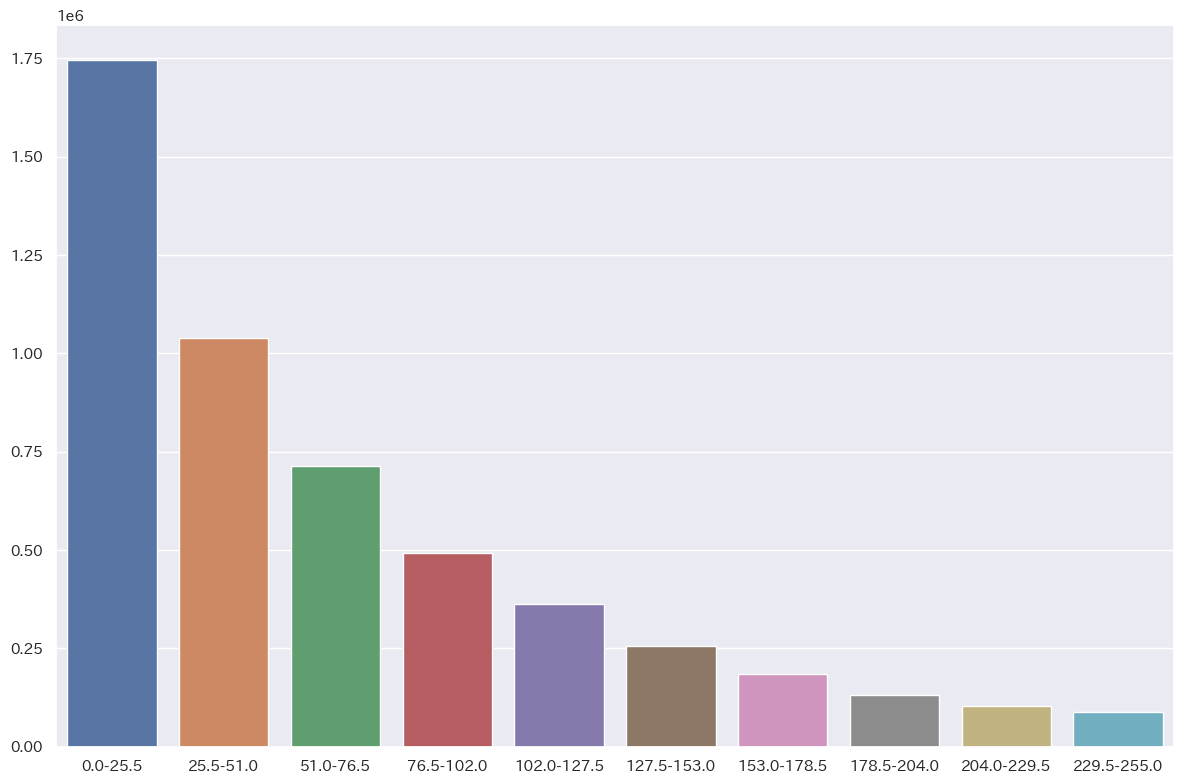

 * bird


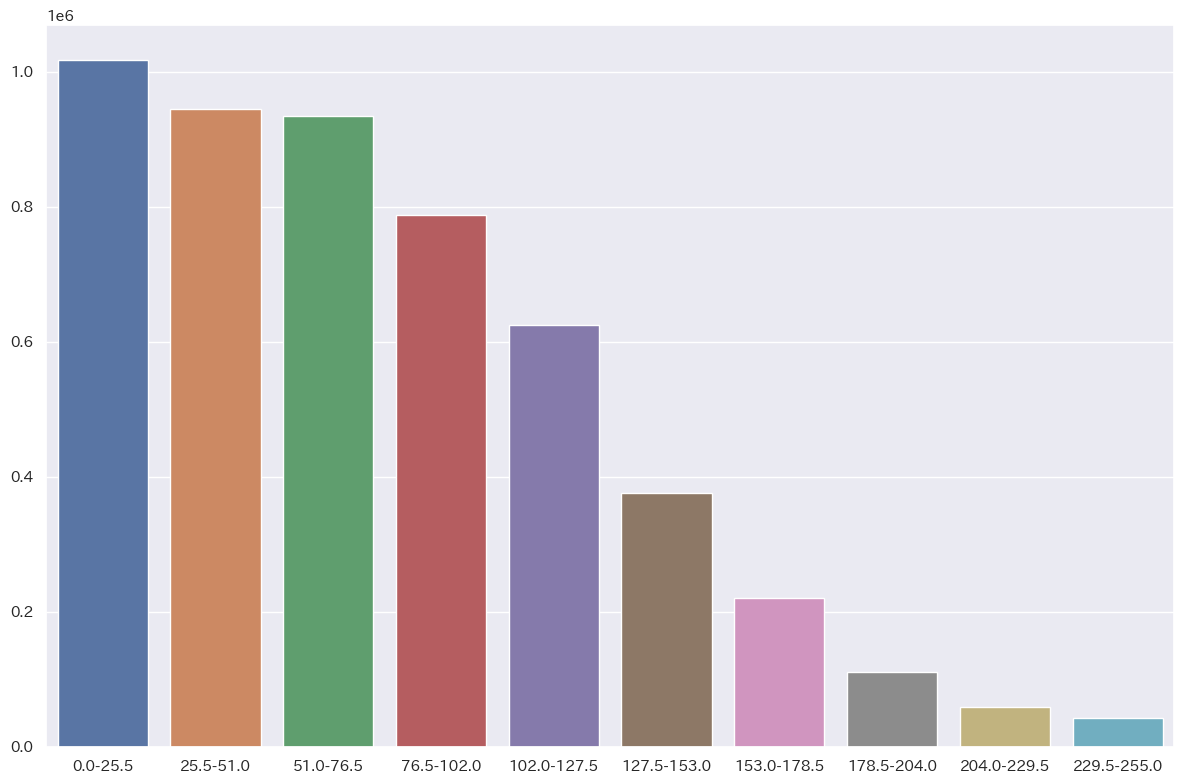

 * cat


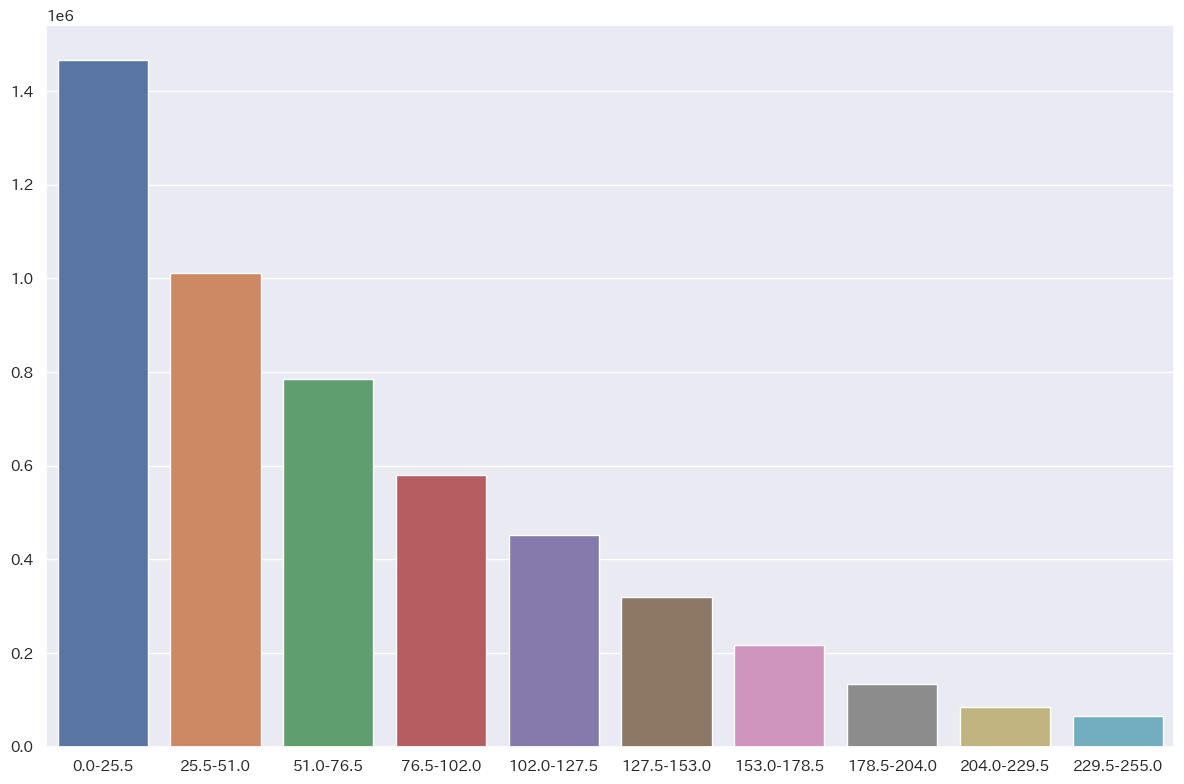

 * deer


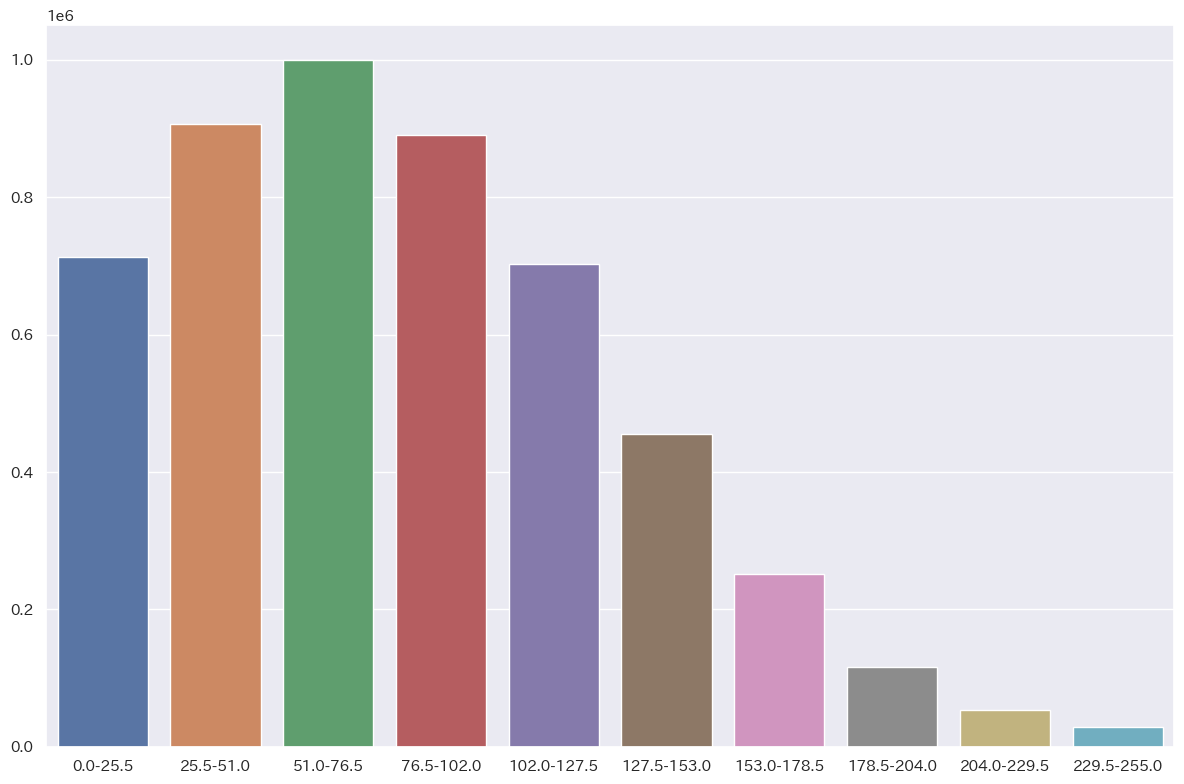

 * dog


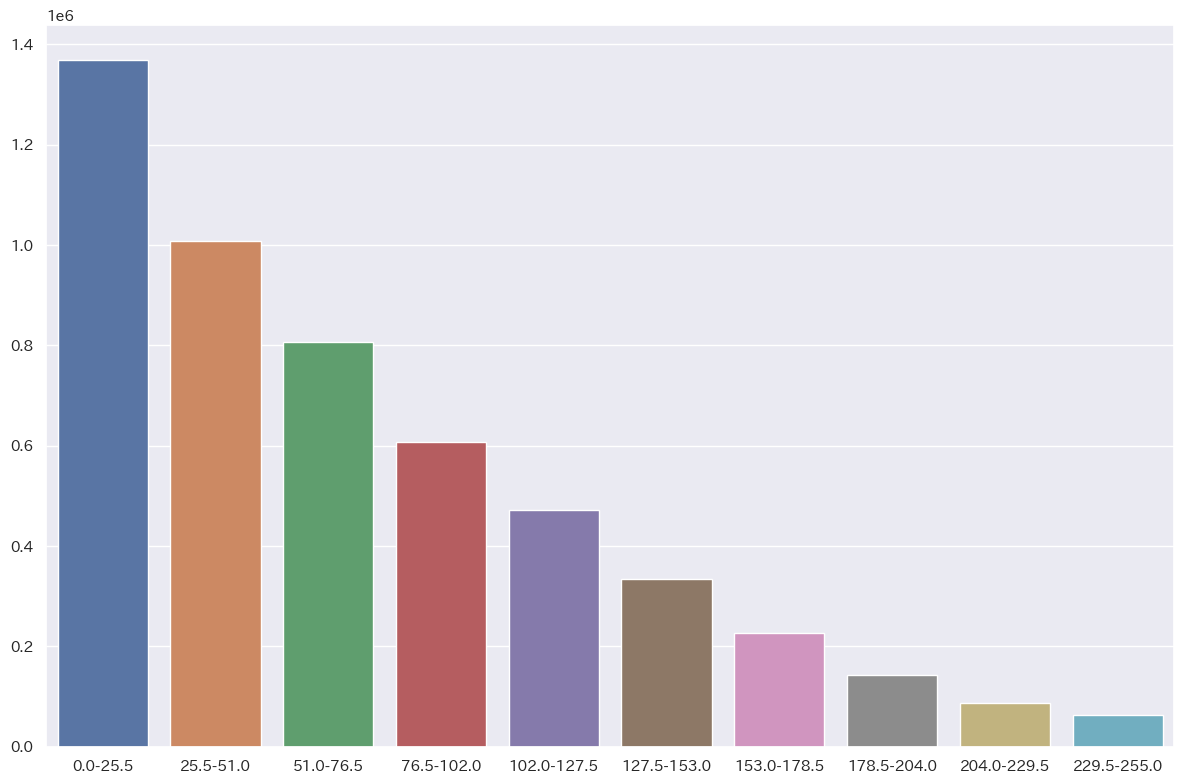

 * frog


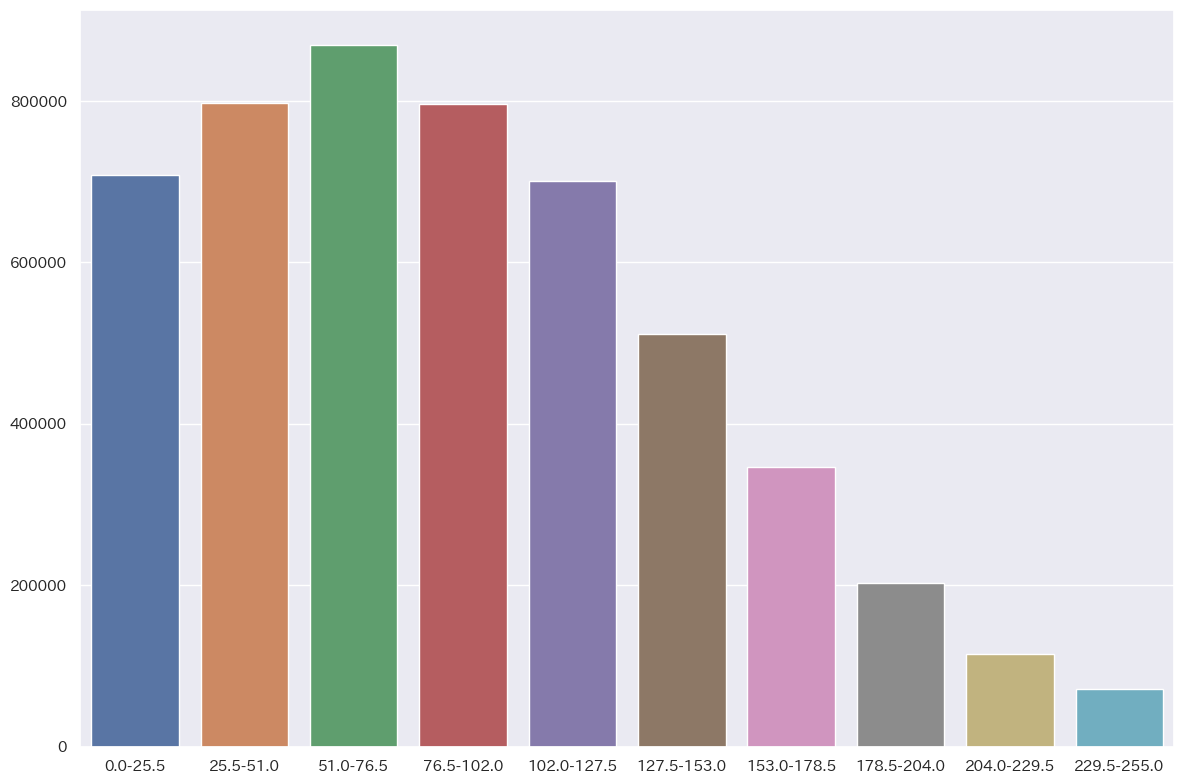

 * horse


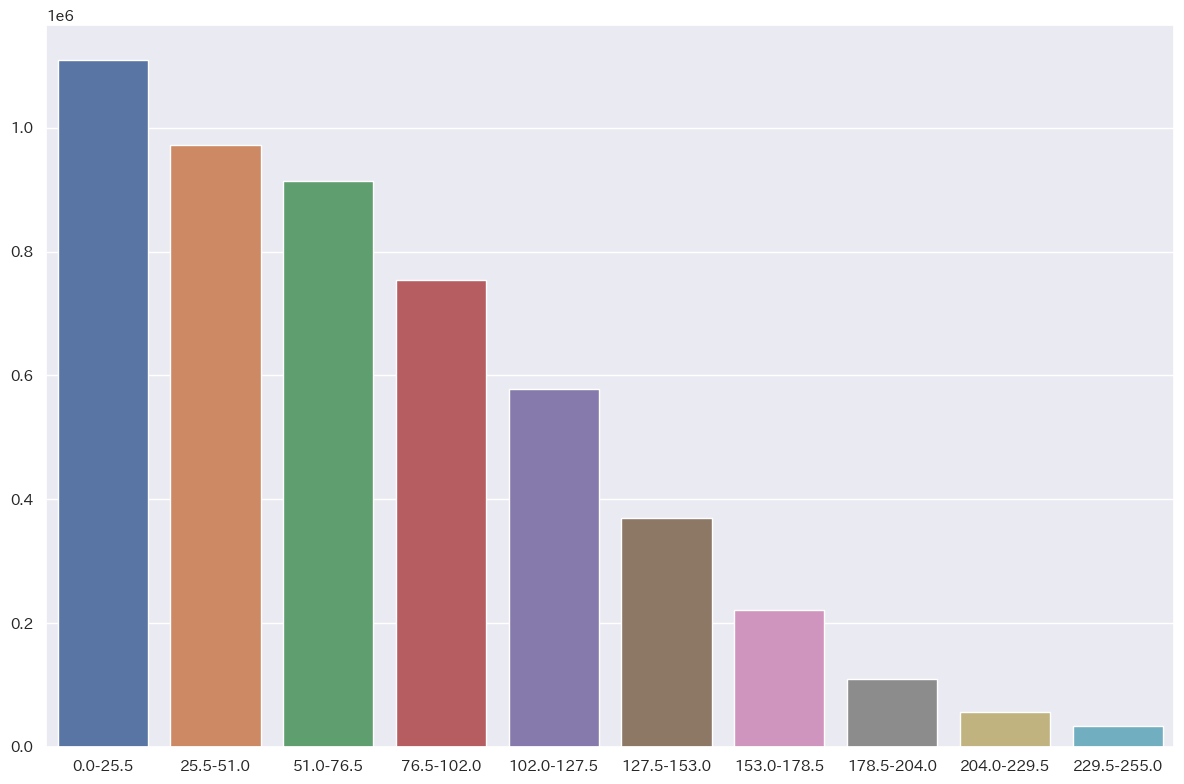

 * ship


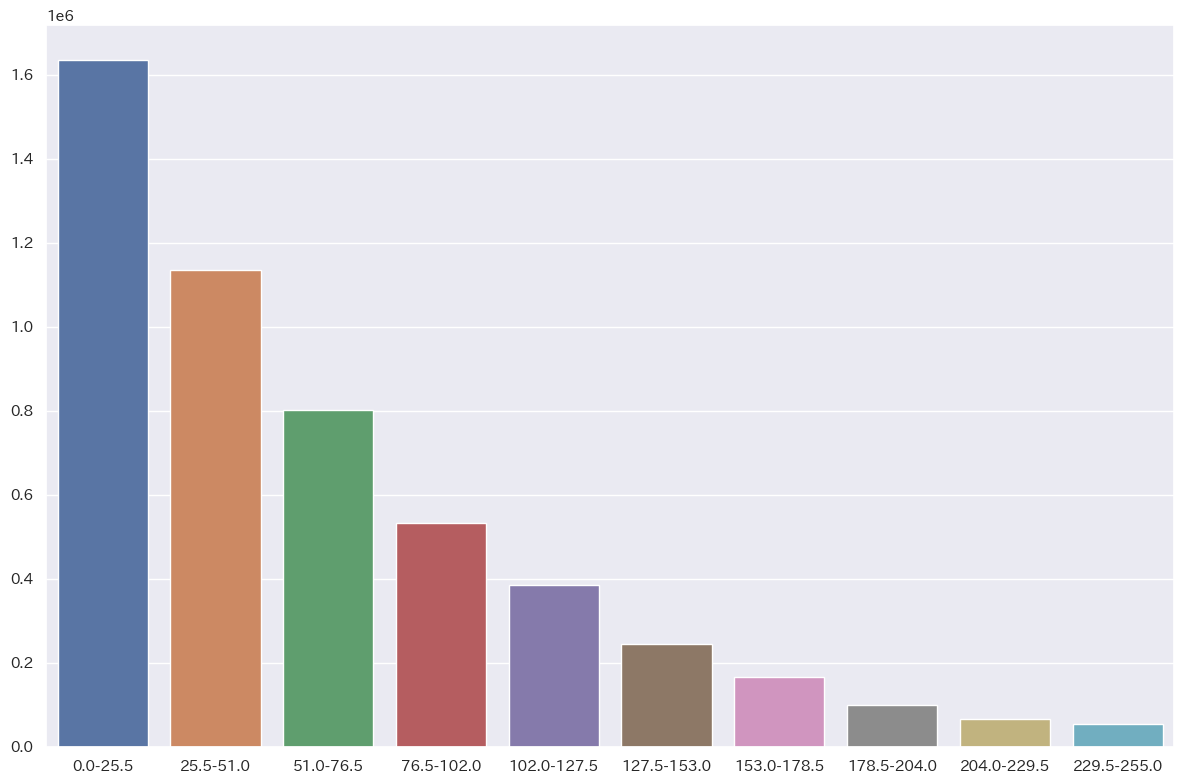

 * truck


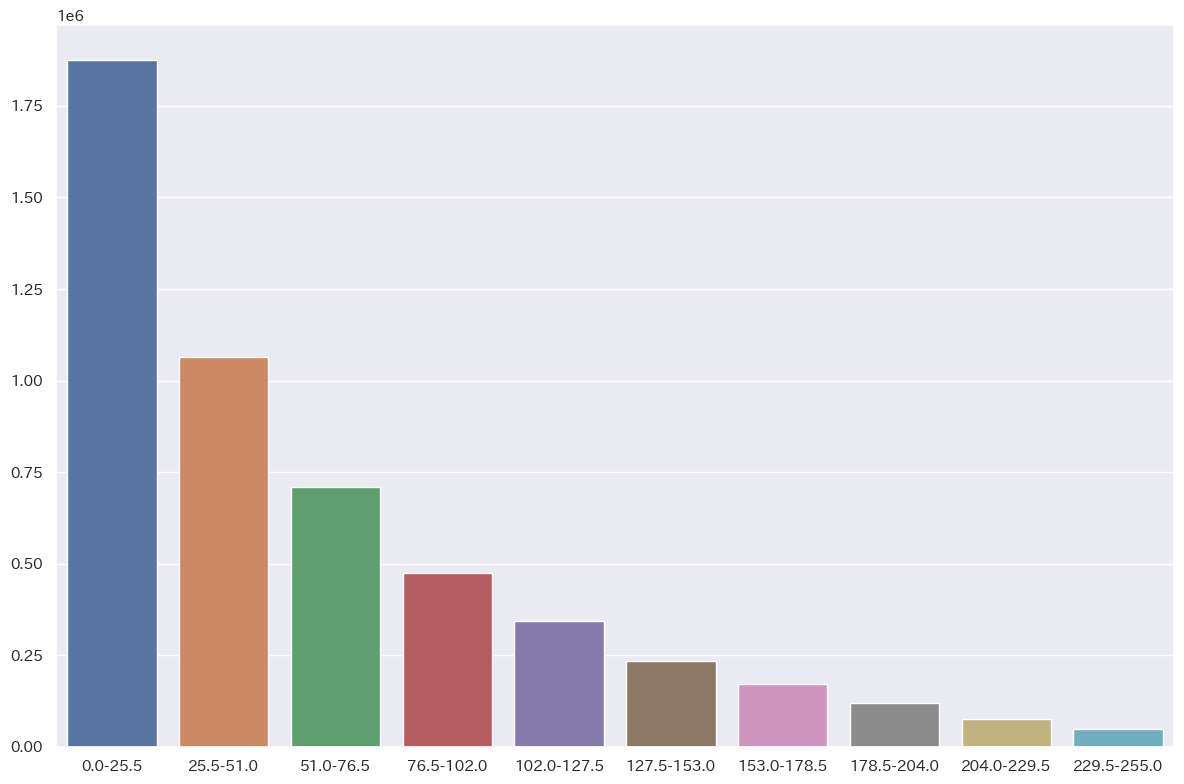

<< V >>
 * airplane


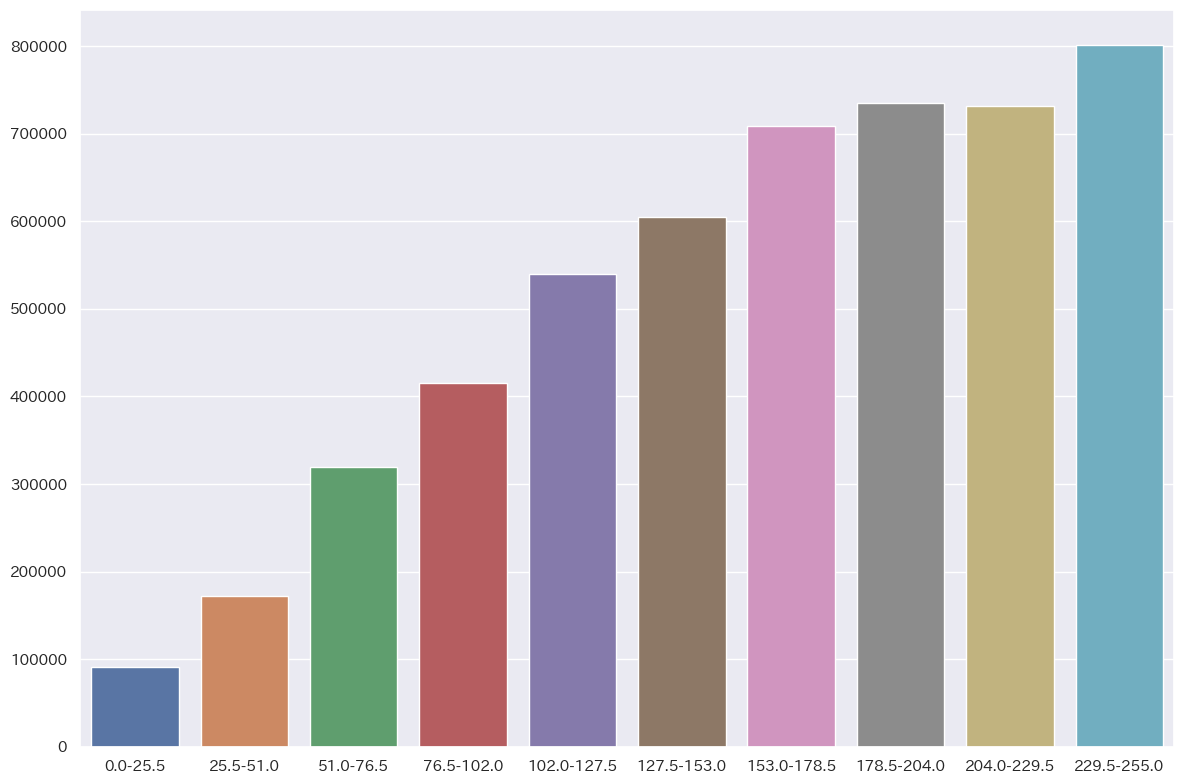

 * automobile


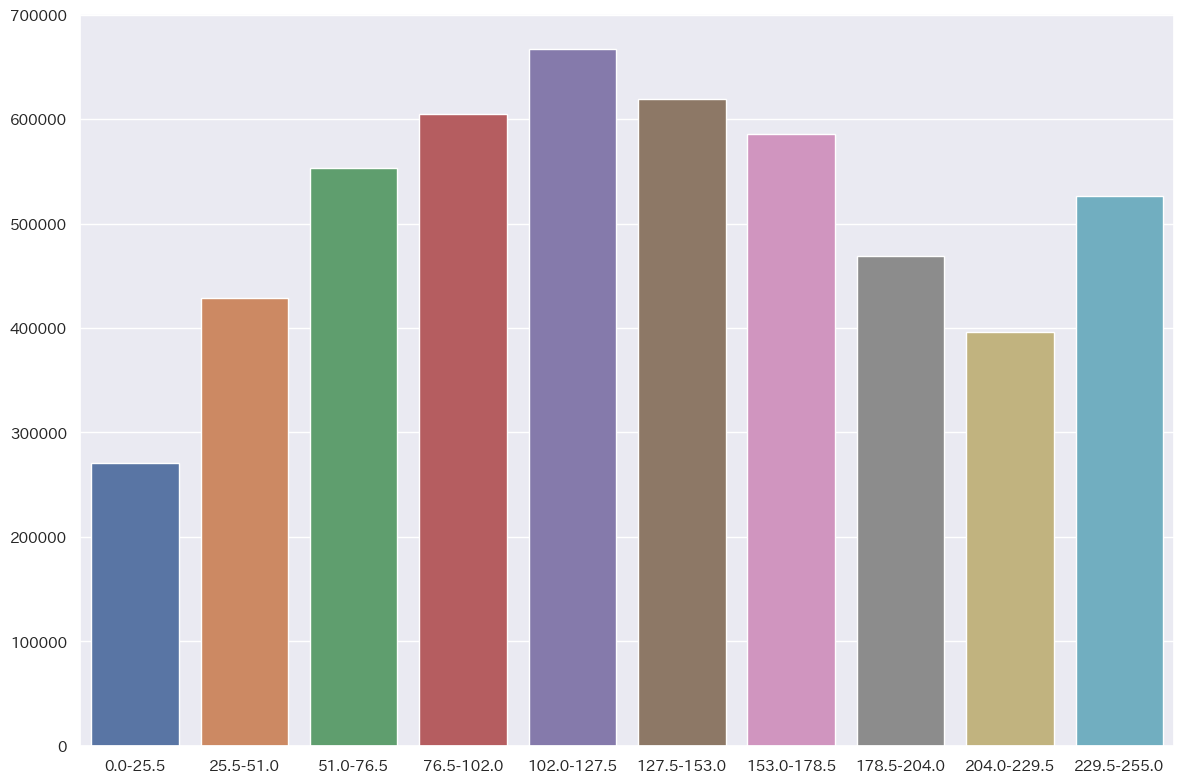

 * bird


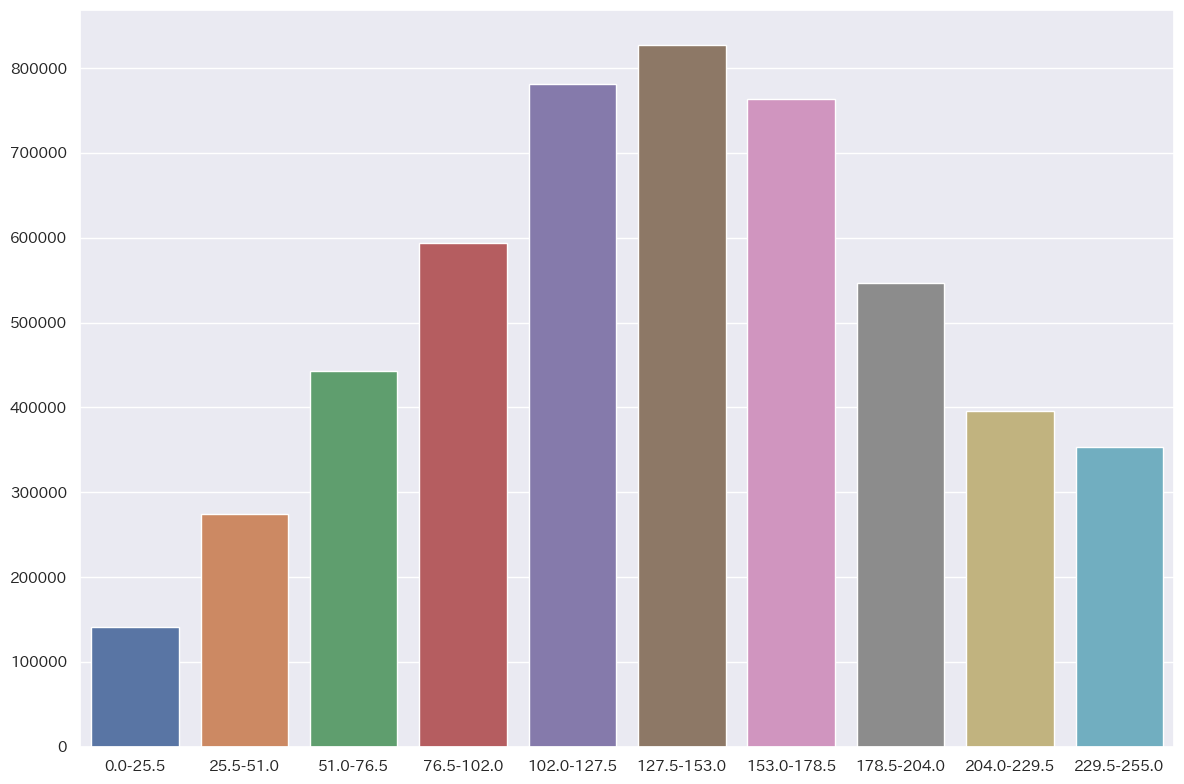

 * cat


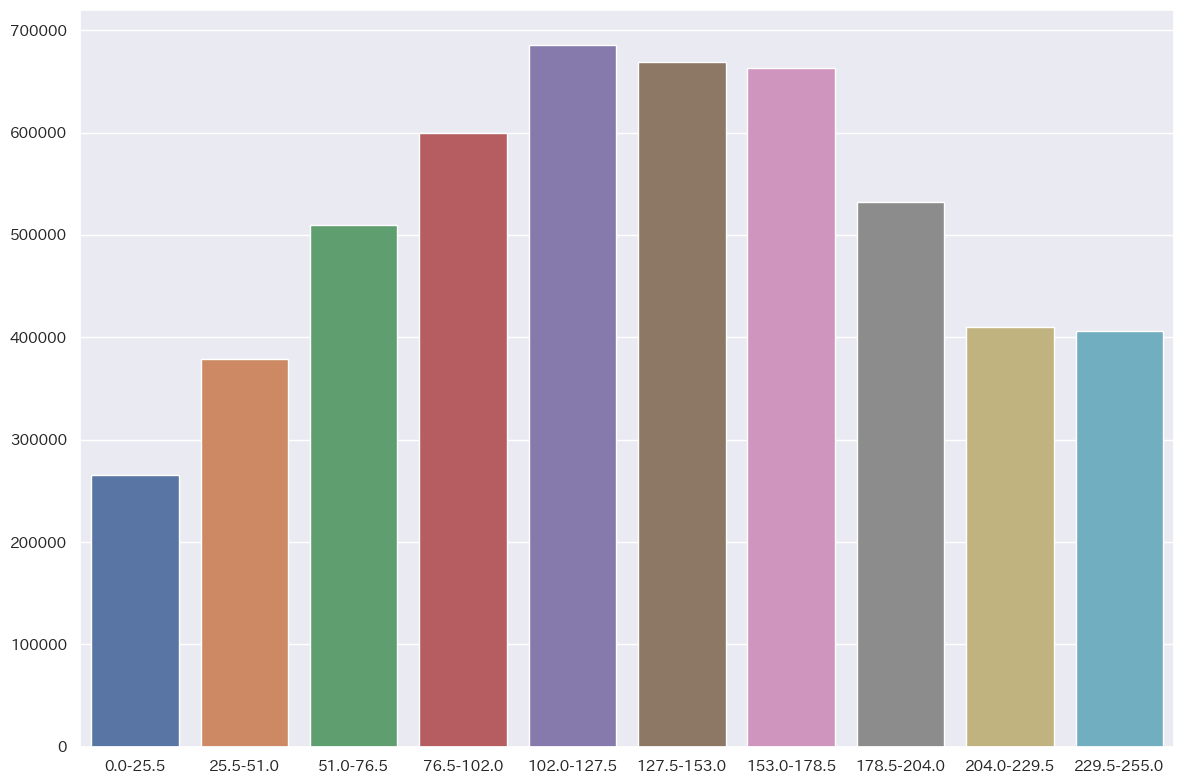

 * deer


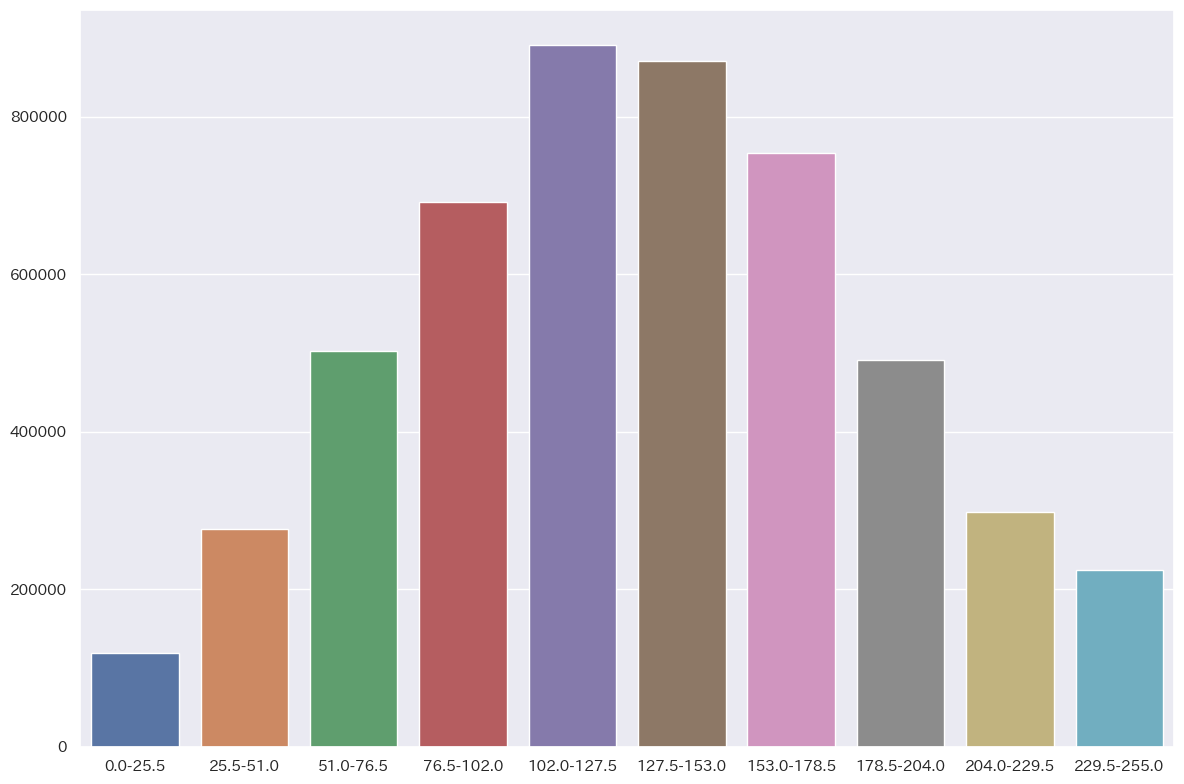

 * dog


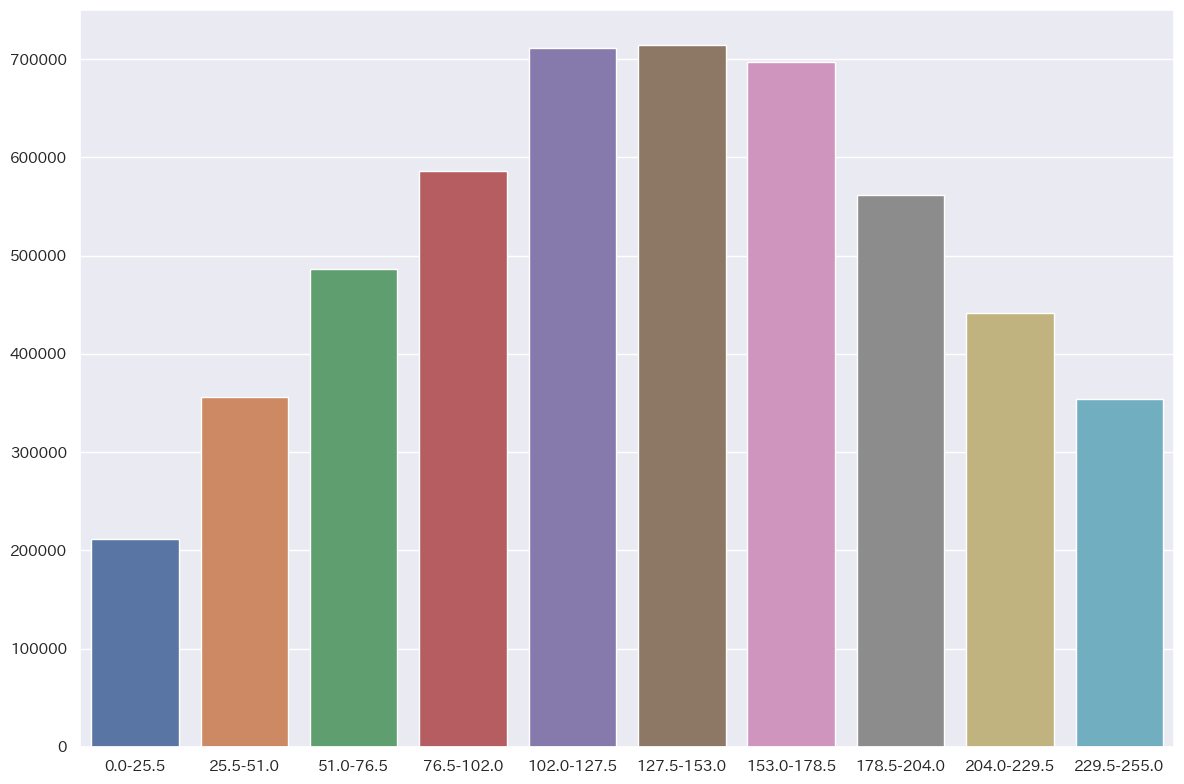

 * frog


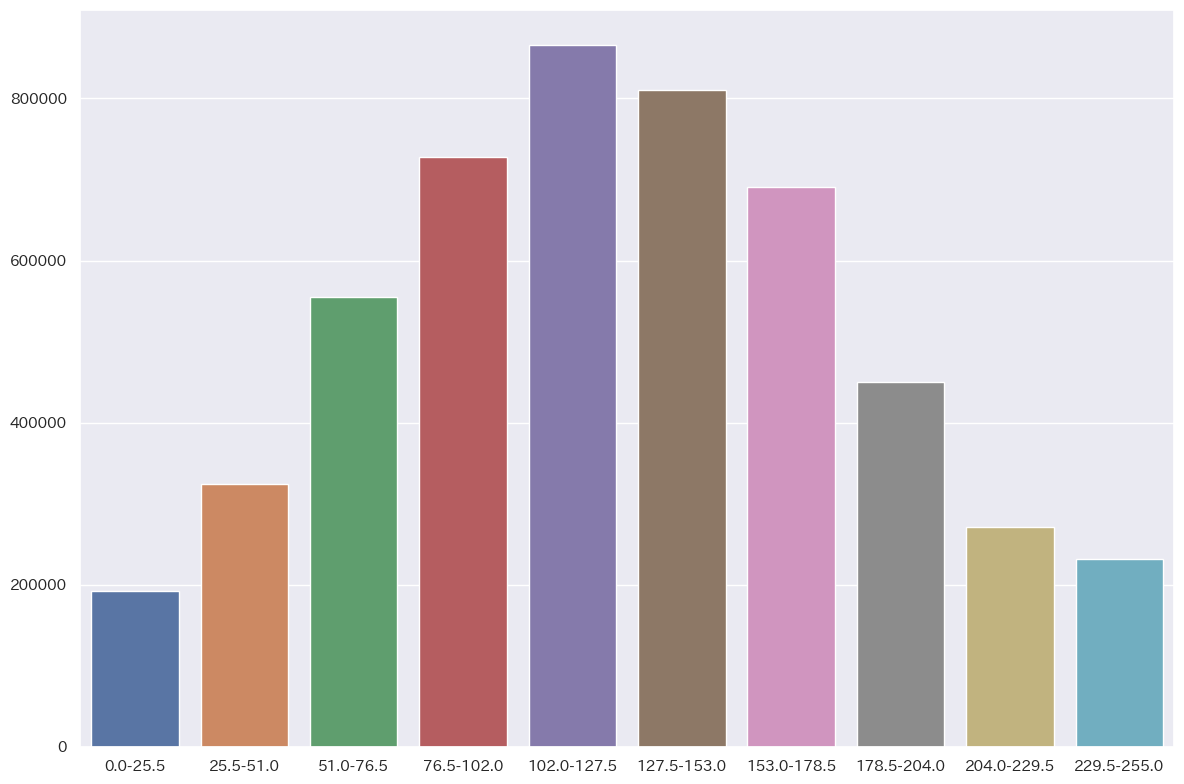

 * horse


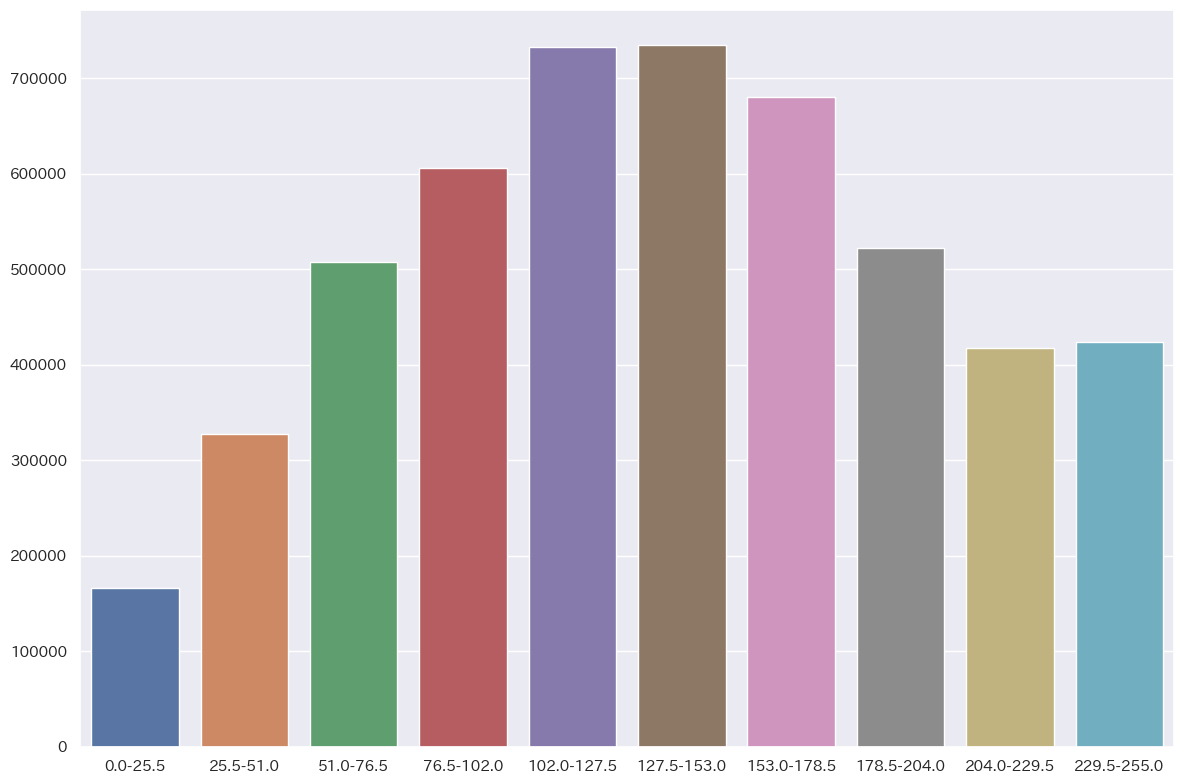

 * ship


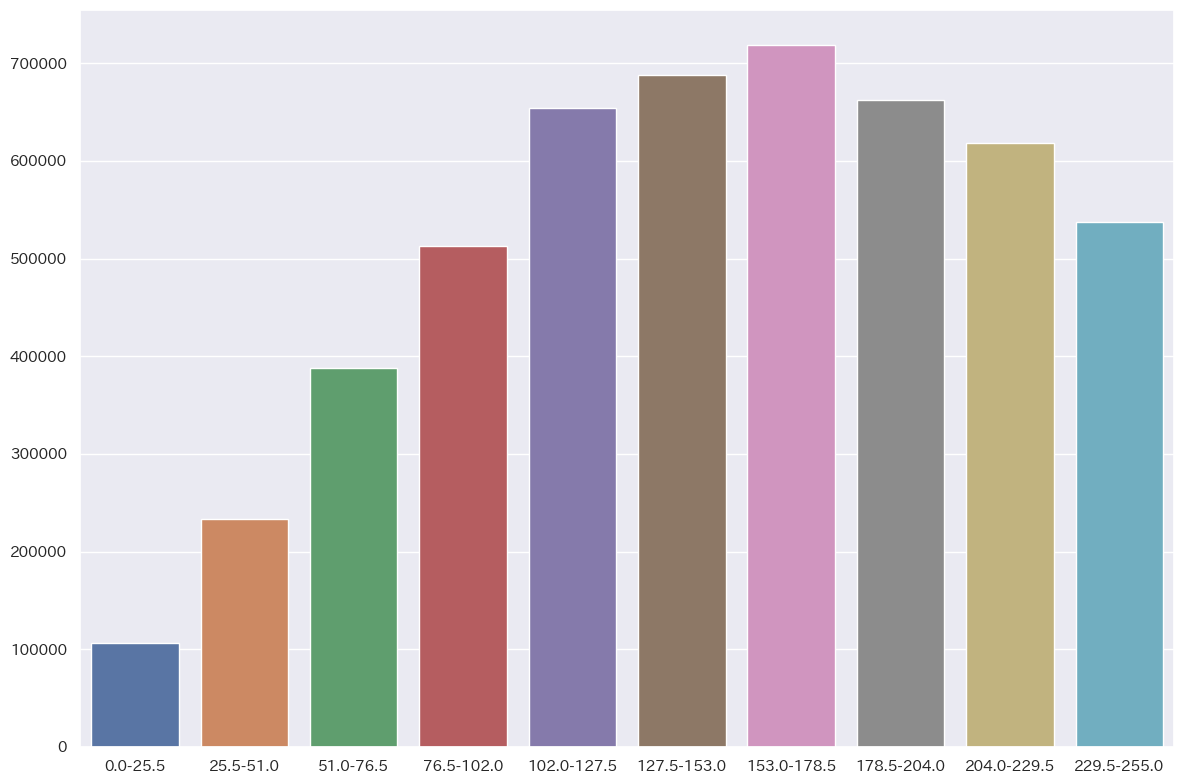

 * truck


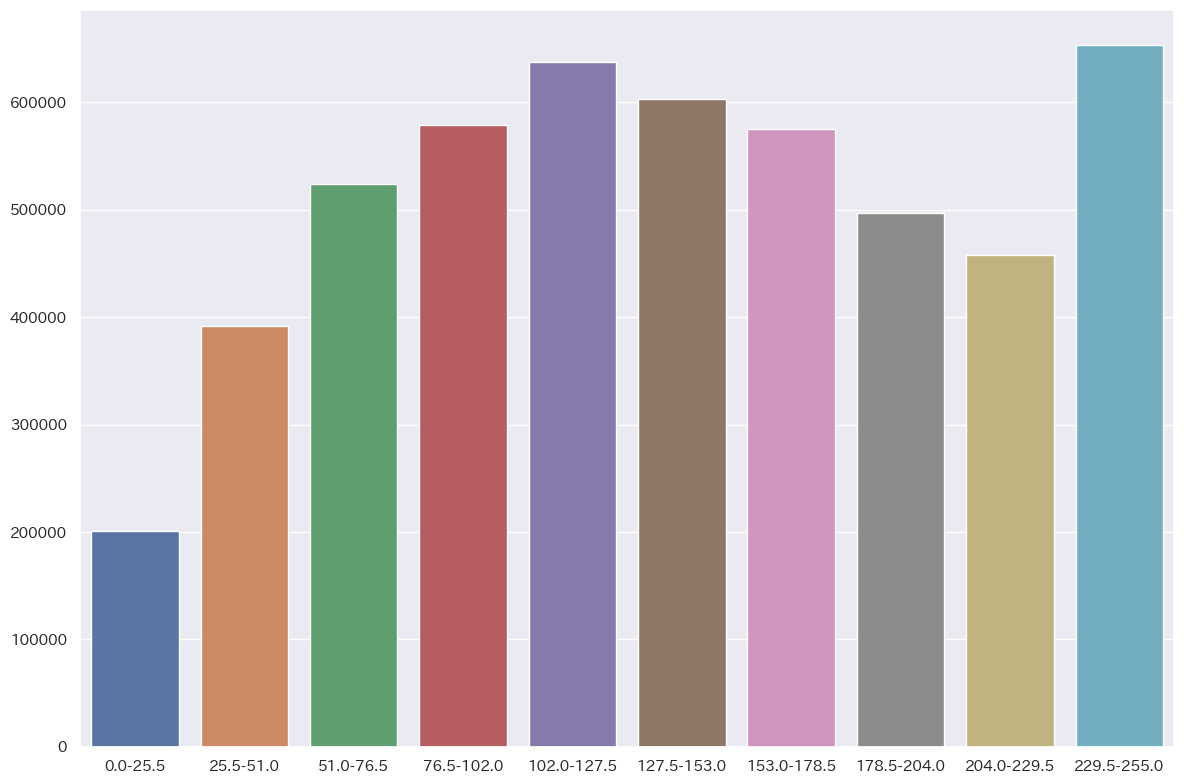

In [12]:
channels = ['H', 'S', 'V']
for ch in range(3):
    print(f'<< {channels[ch]} >>')
    for class_id in range(10):
        print(f' * {dict_y["label_names"][class_id]}')
        x = hist_hsv['floor_boundary']
        y = hist_hsv['frequency'][ch][class_id]
        plt.figure(figsize=(12, 8))
        sns.barplot(x=x, y=y)
        plt.tight_layout()
        plt.show()
        plt.close()

<< Y >>
 * airplane


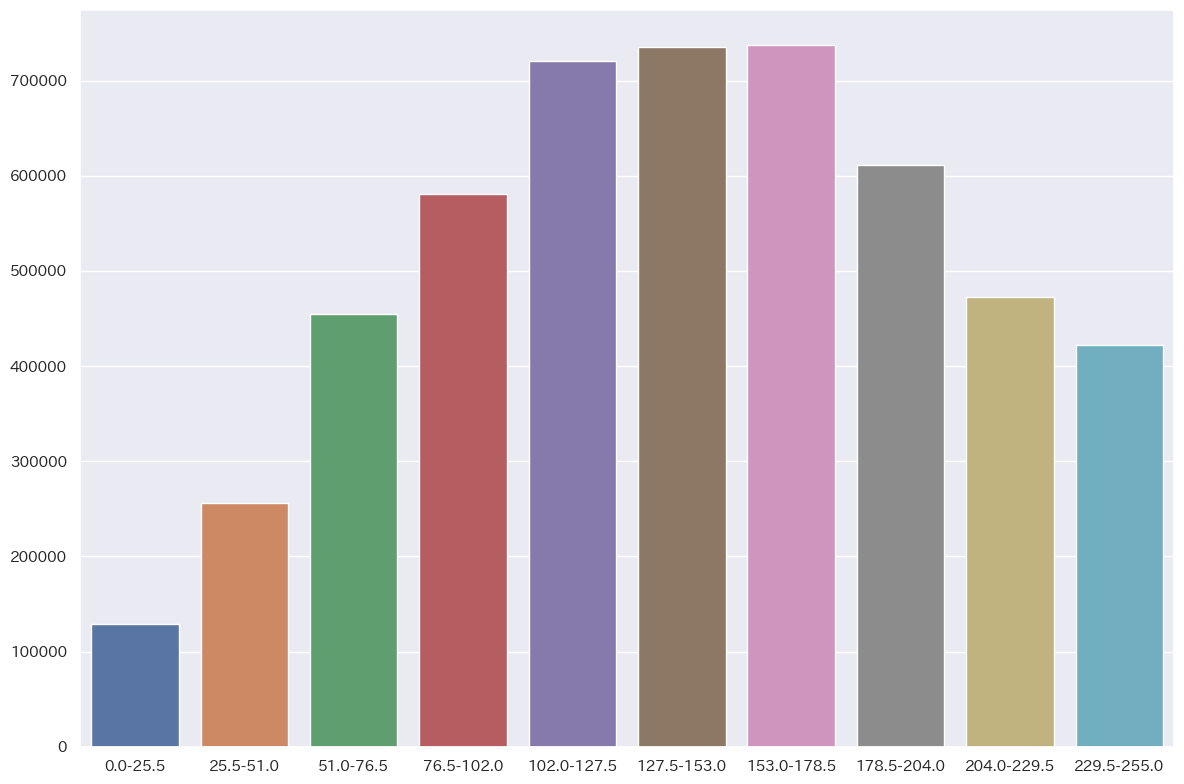

 * automobile


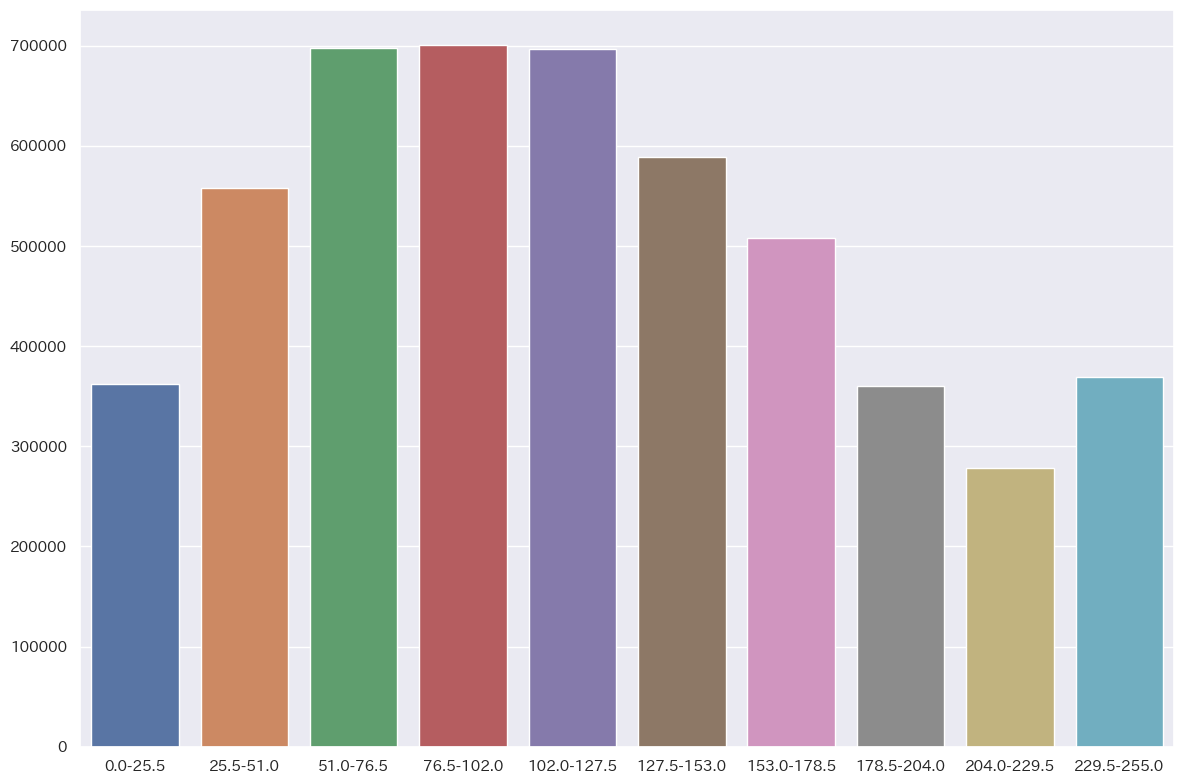

 * bird


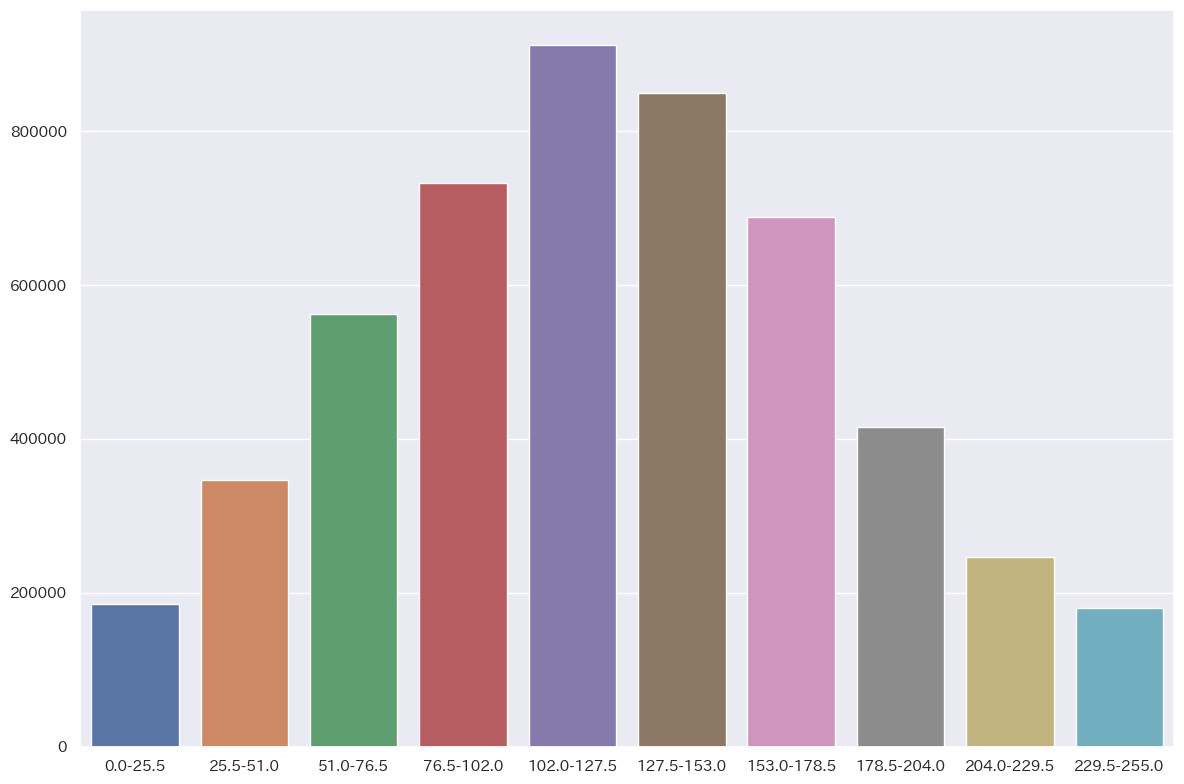

 * cat


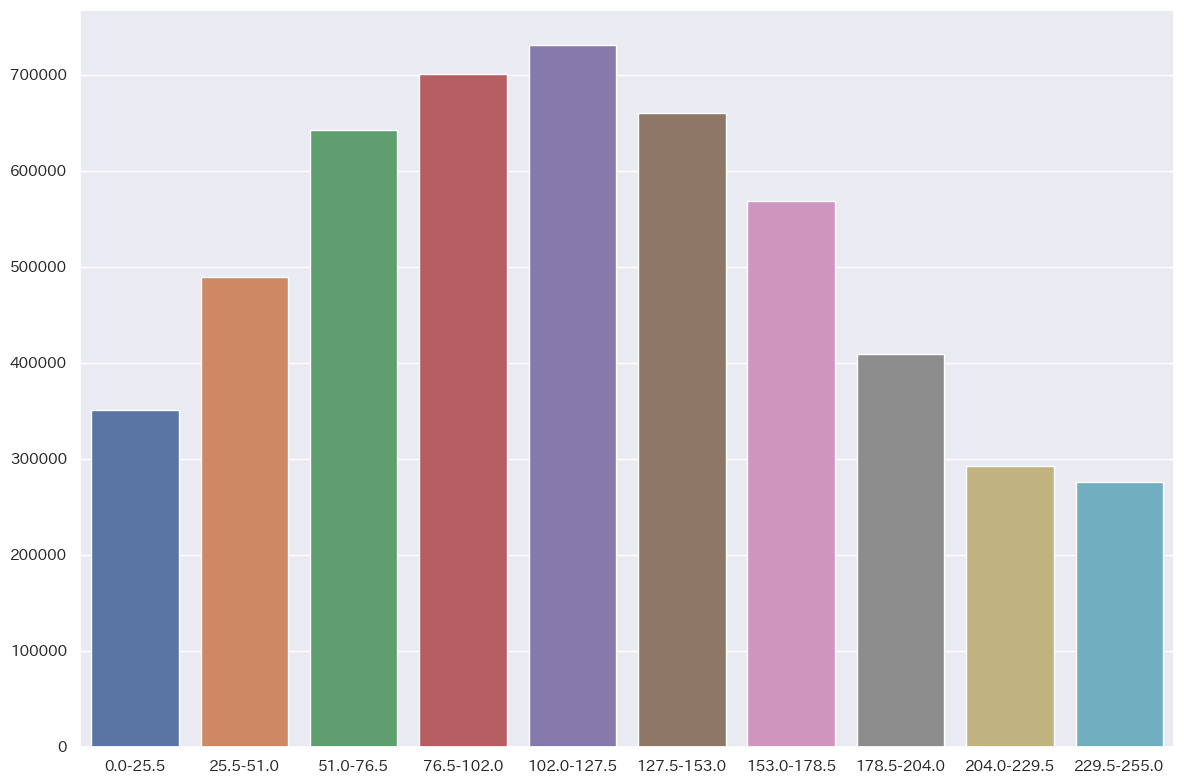

 * deer


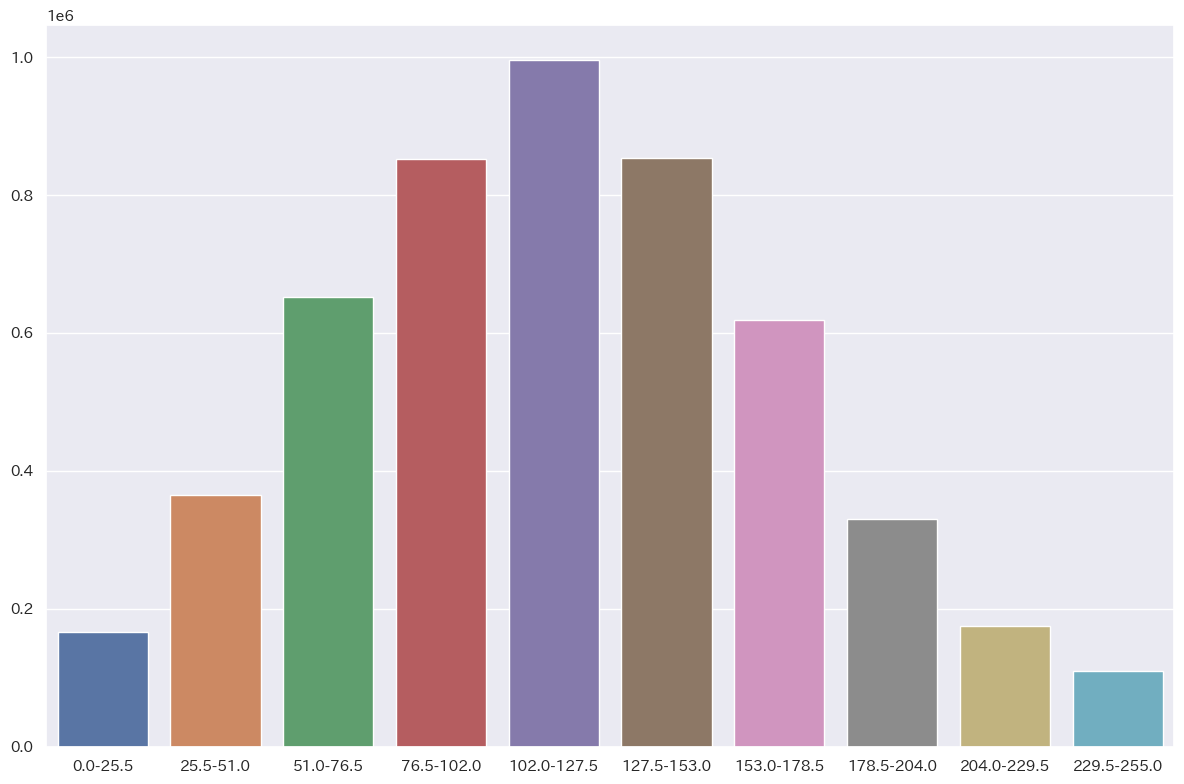

 * dog


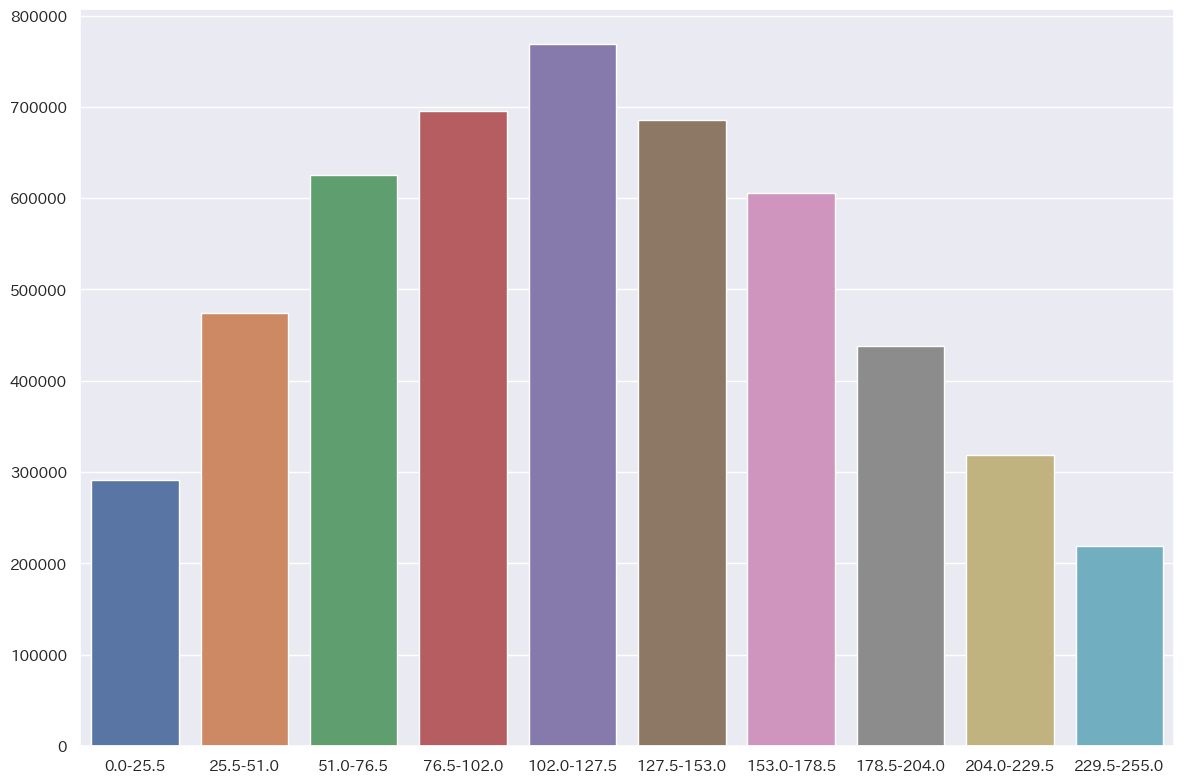

 * frog


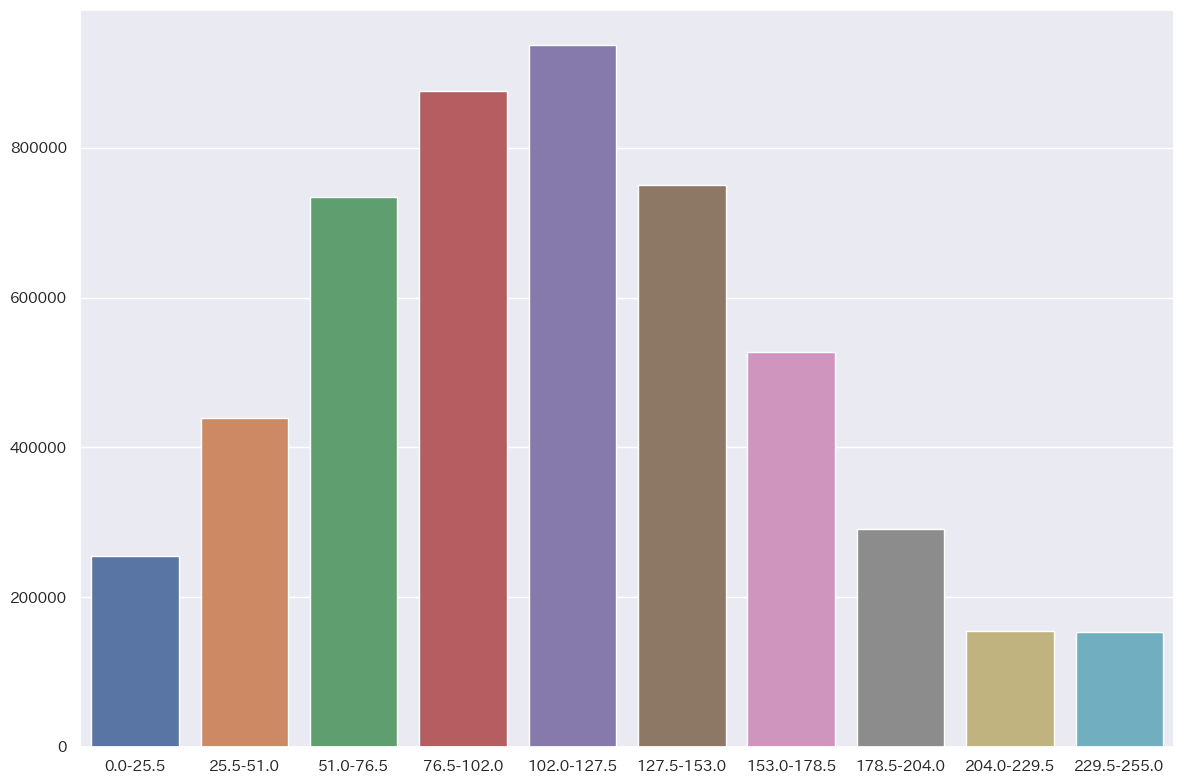

 * horse


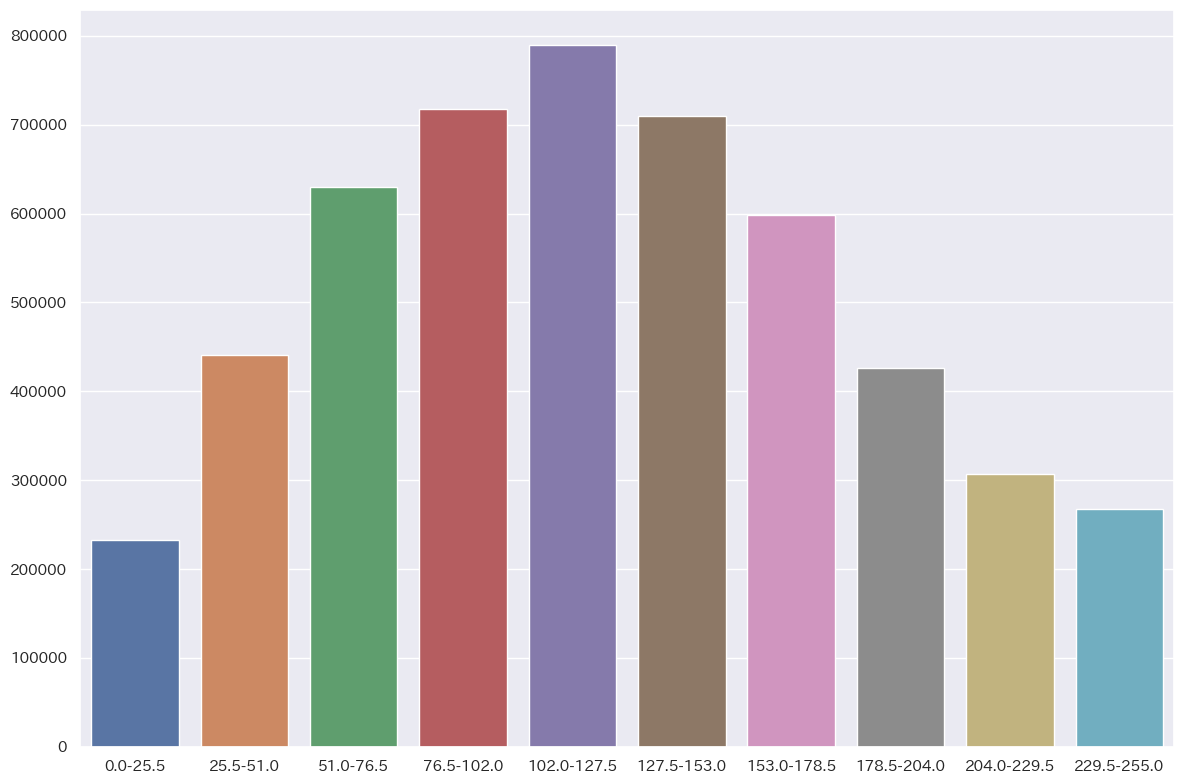

 * ship


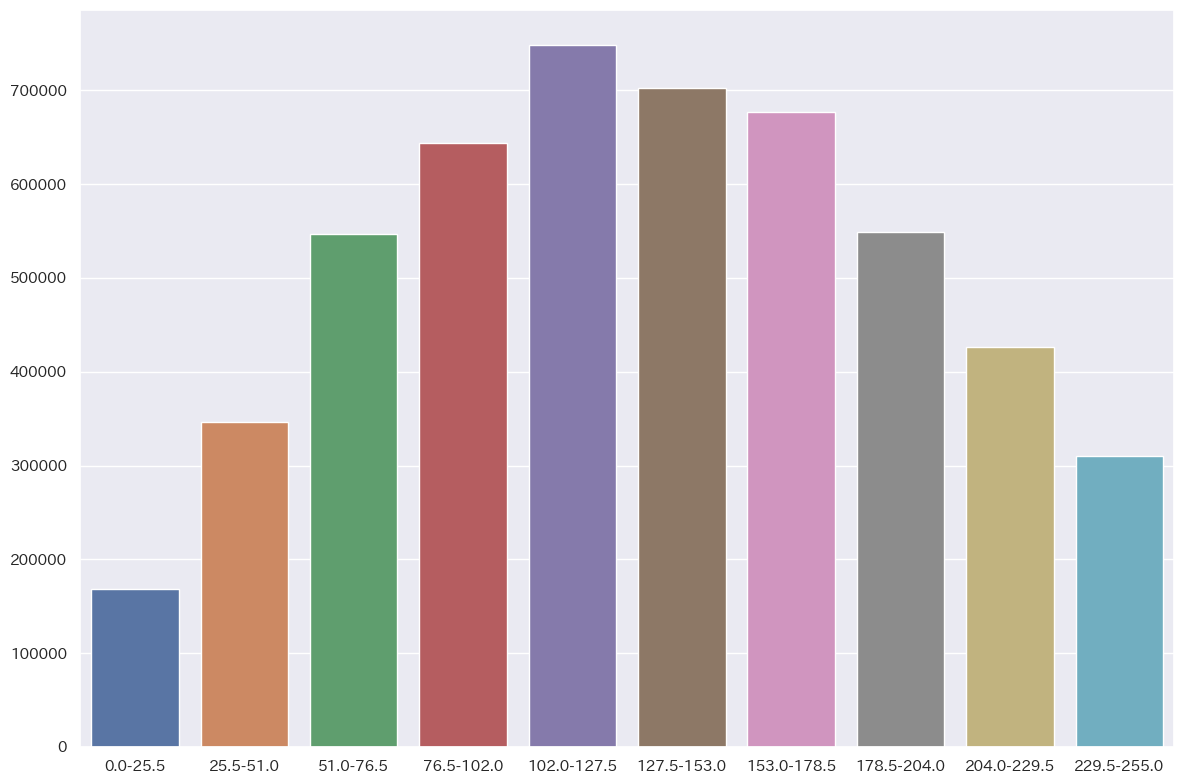

 * truck


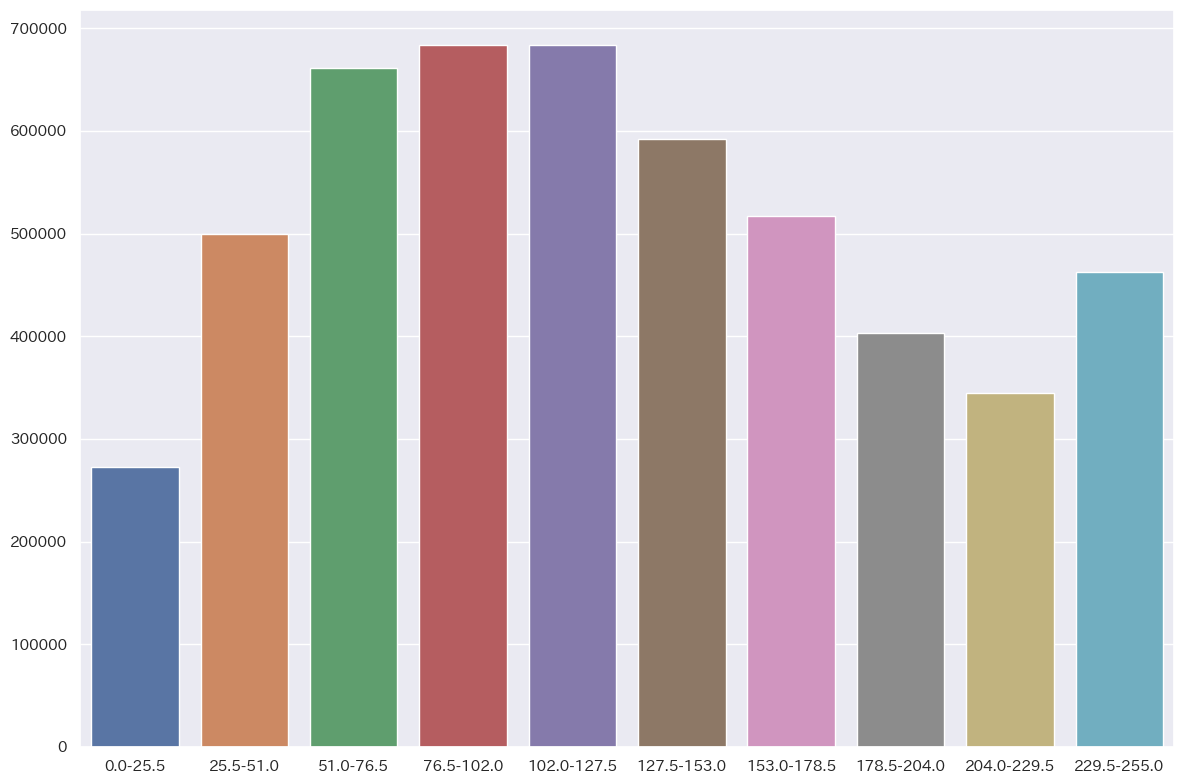

<< U >>
 * airplane


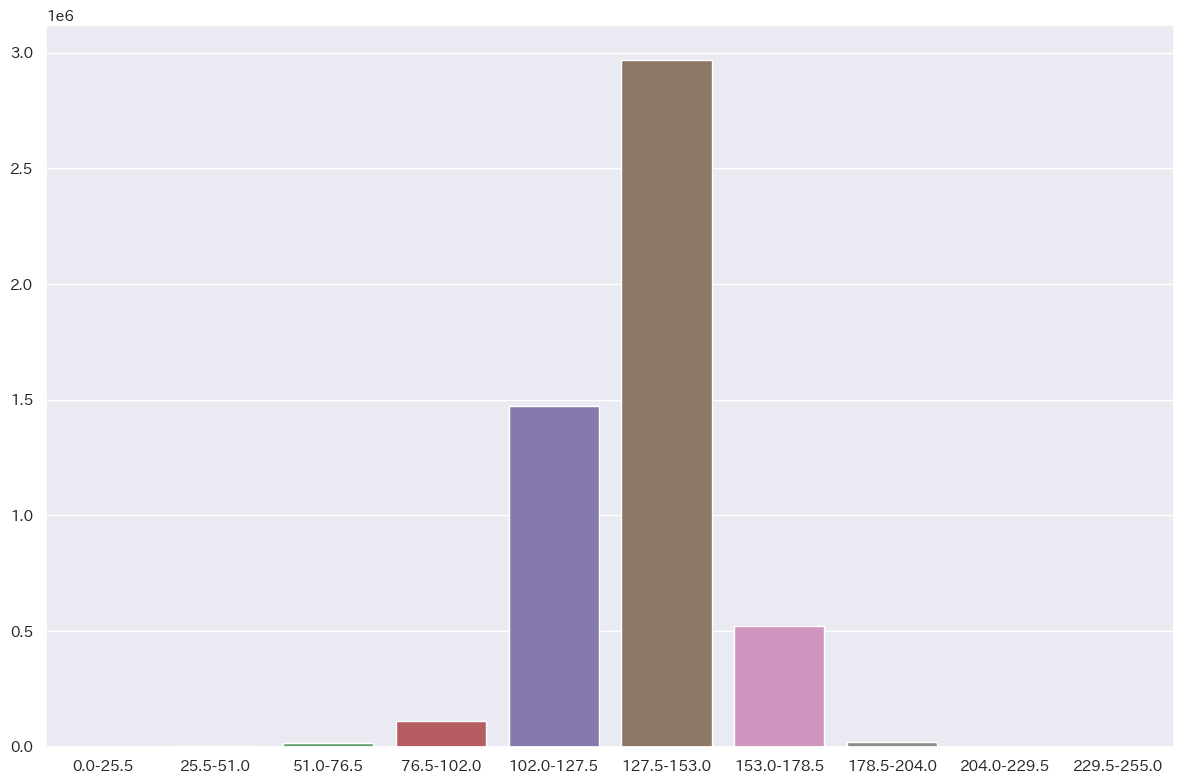

 * automobile


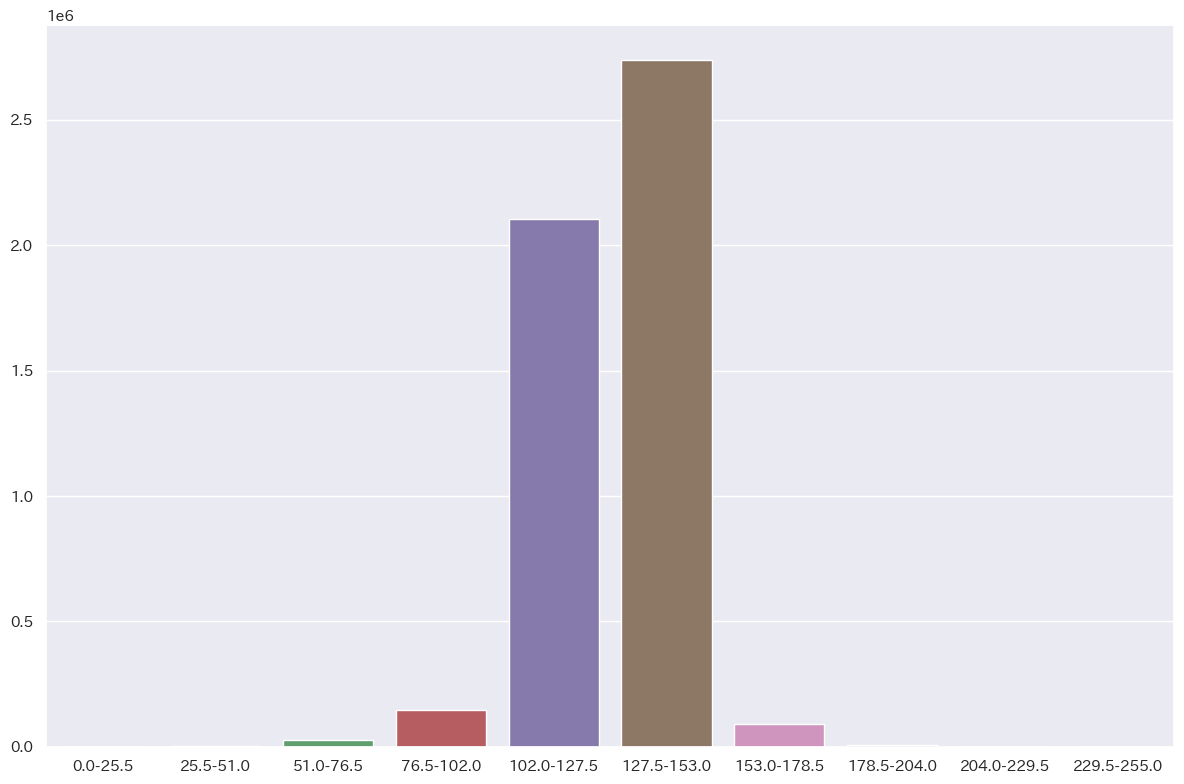

 * bird


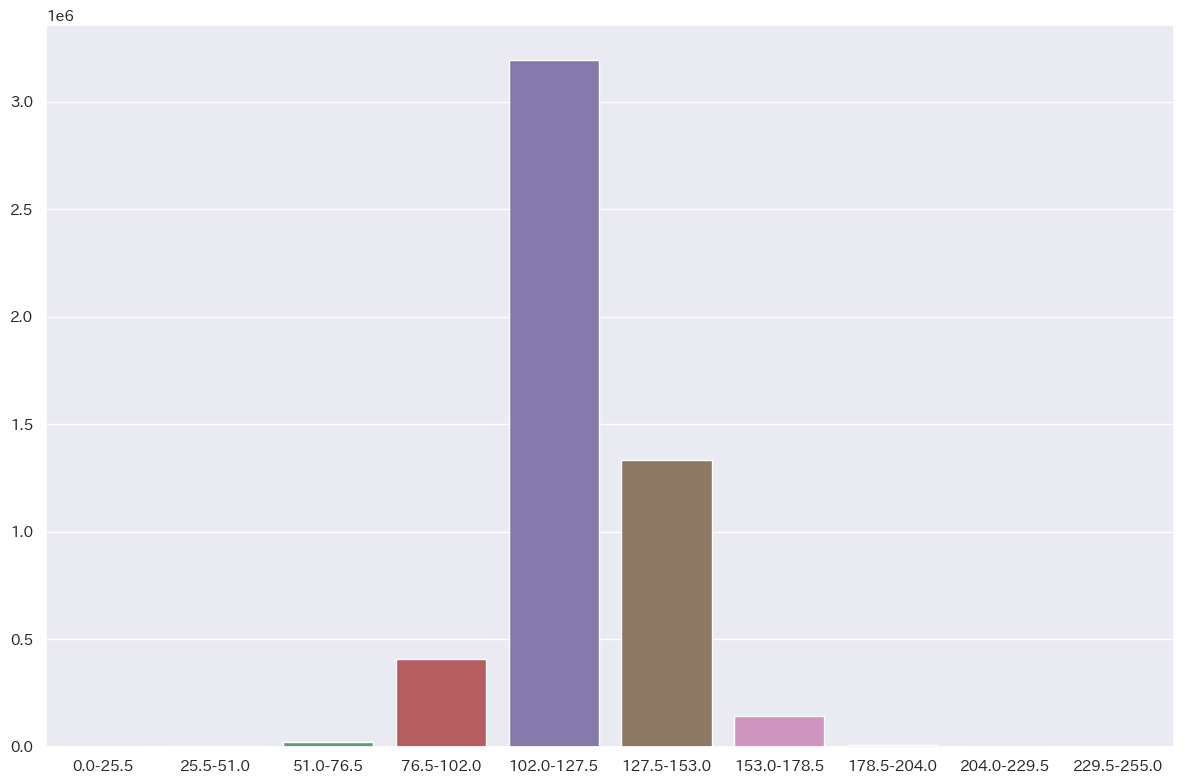

 * cat


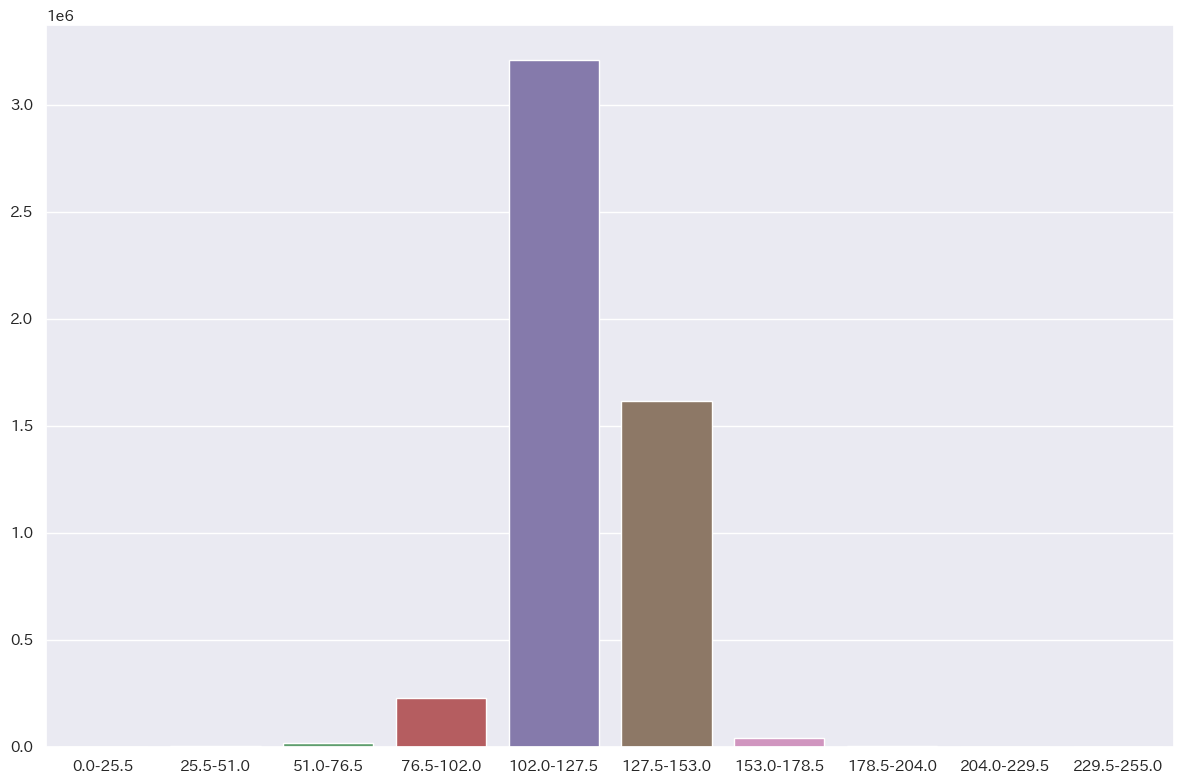

 * deer


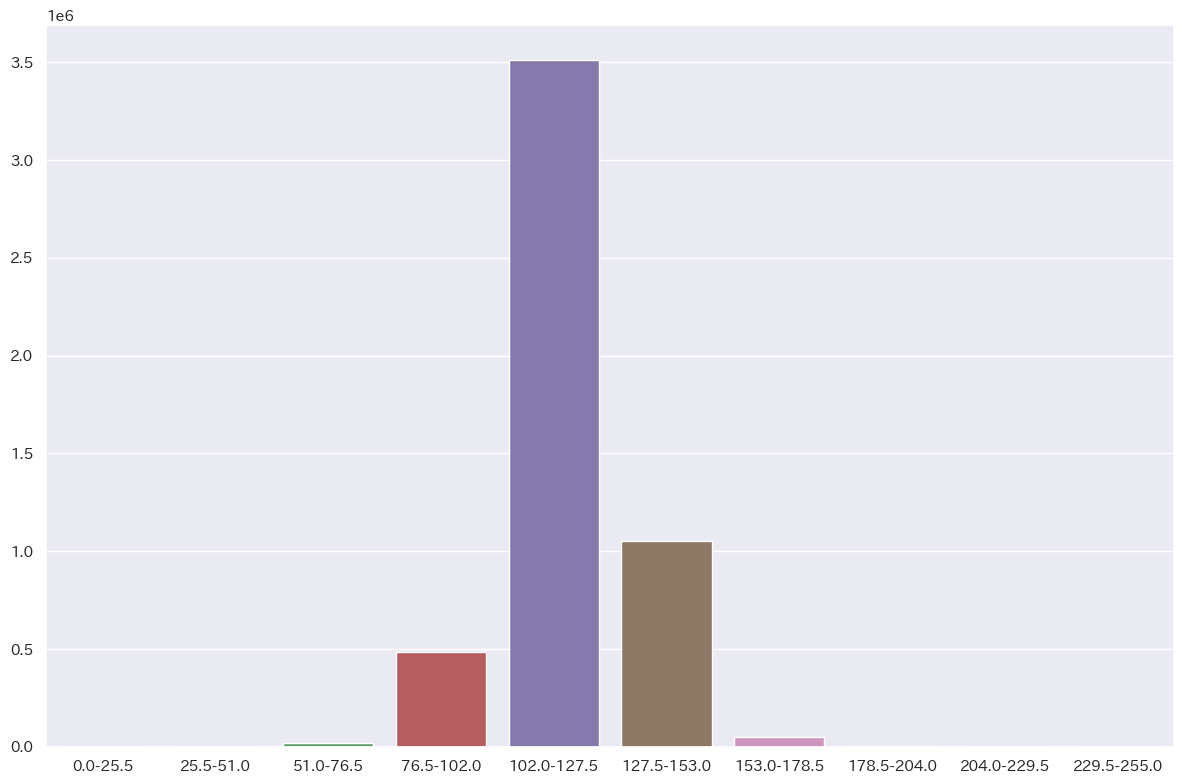

 * dog


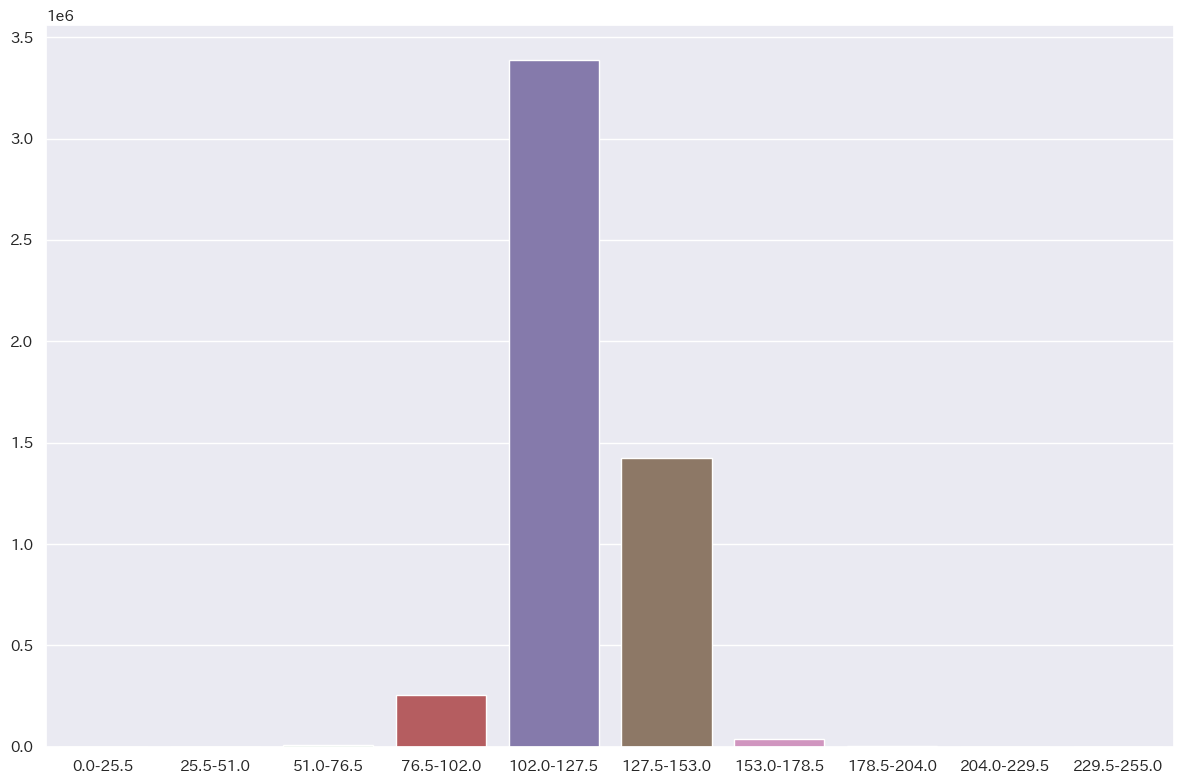

 * frog


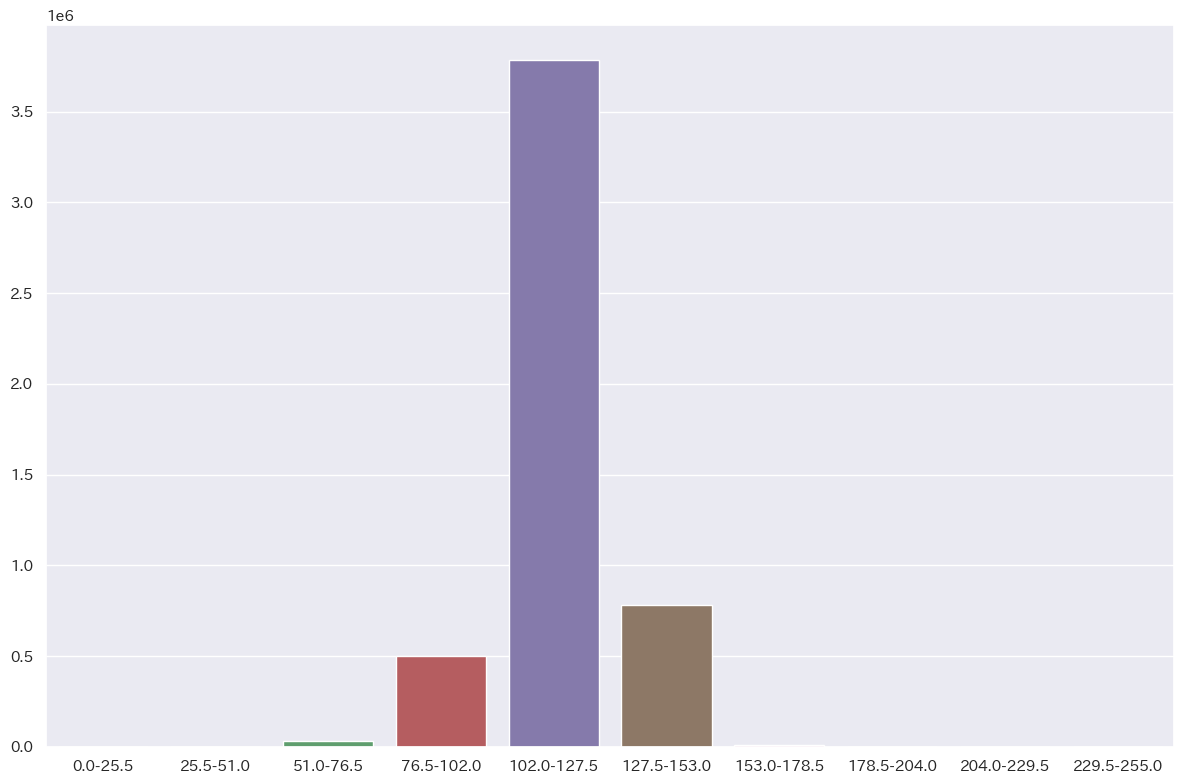

 * horse


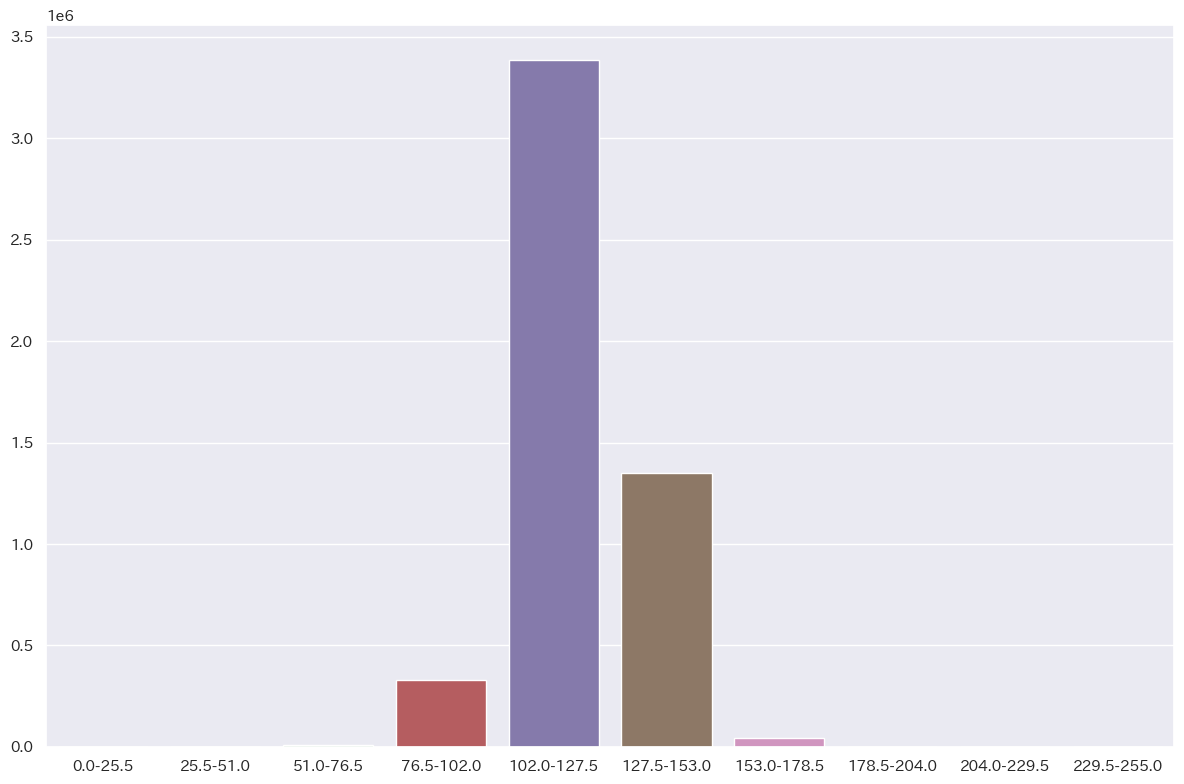

 * ship


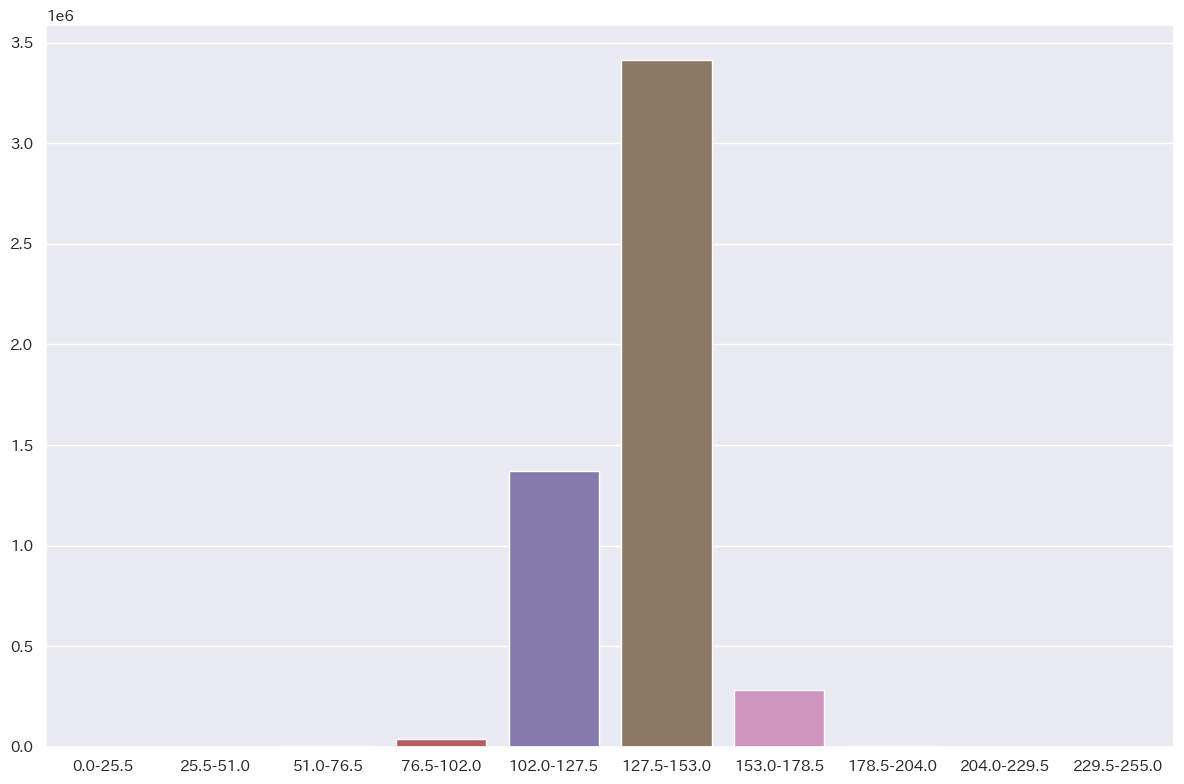

 * truck


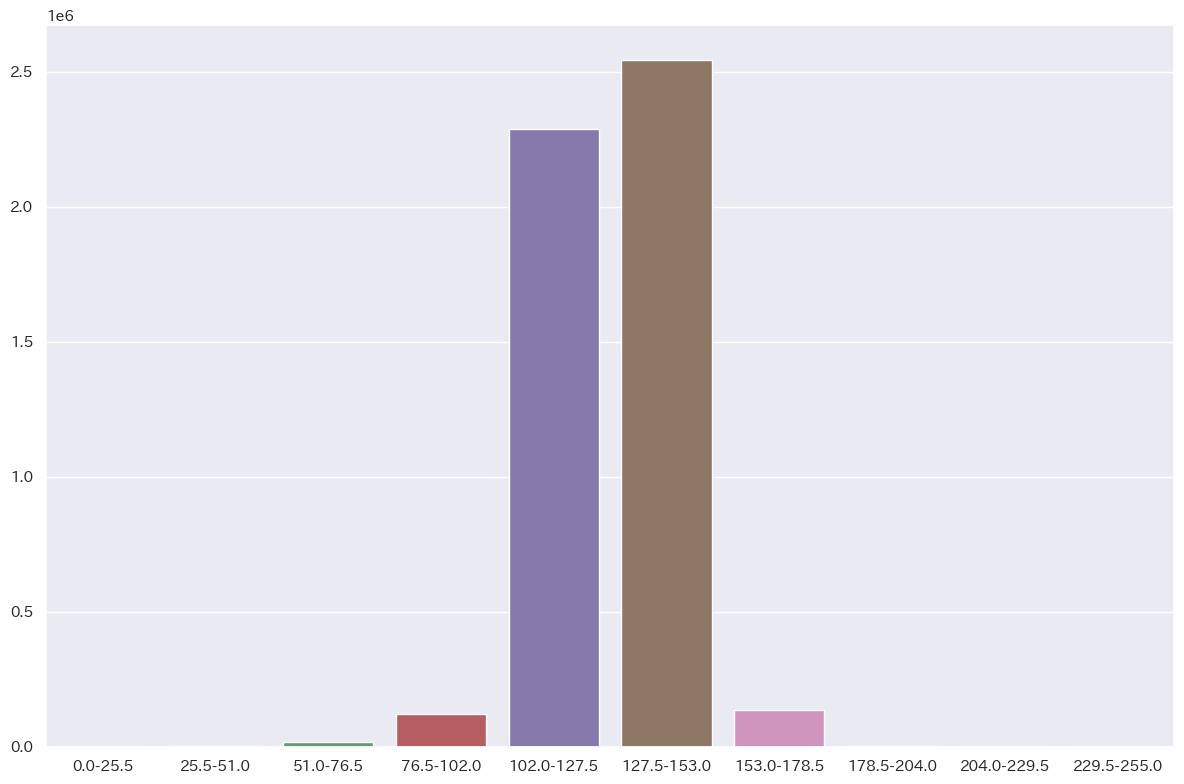

<< V >>
 * airplane


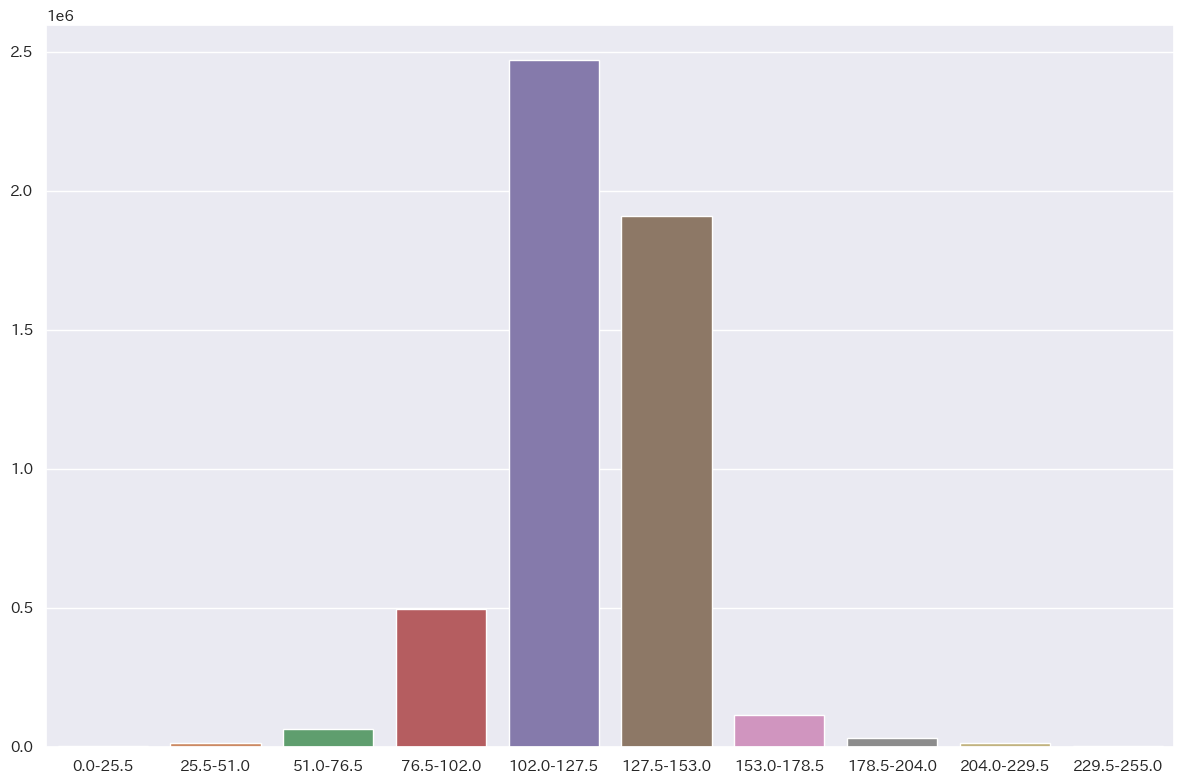

 * automobile


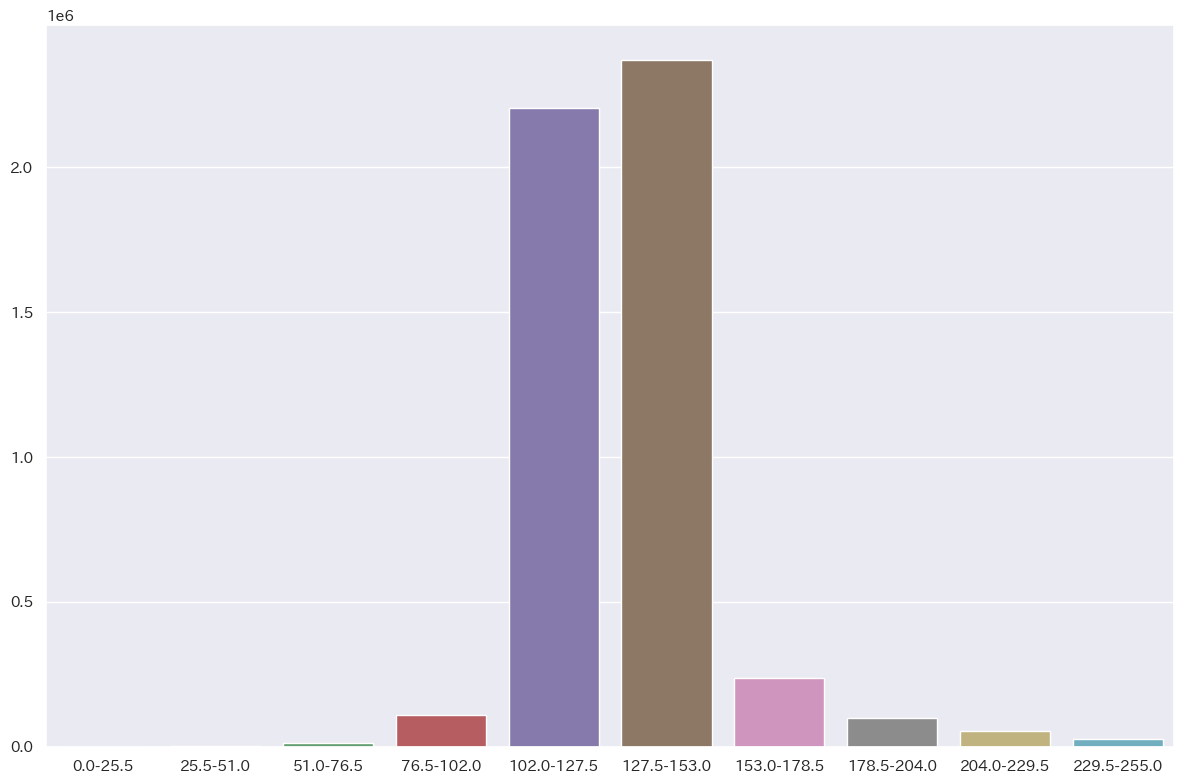

 * bird


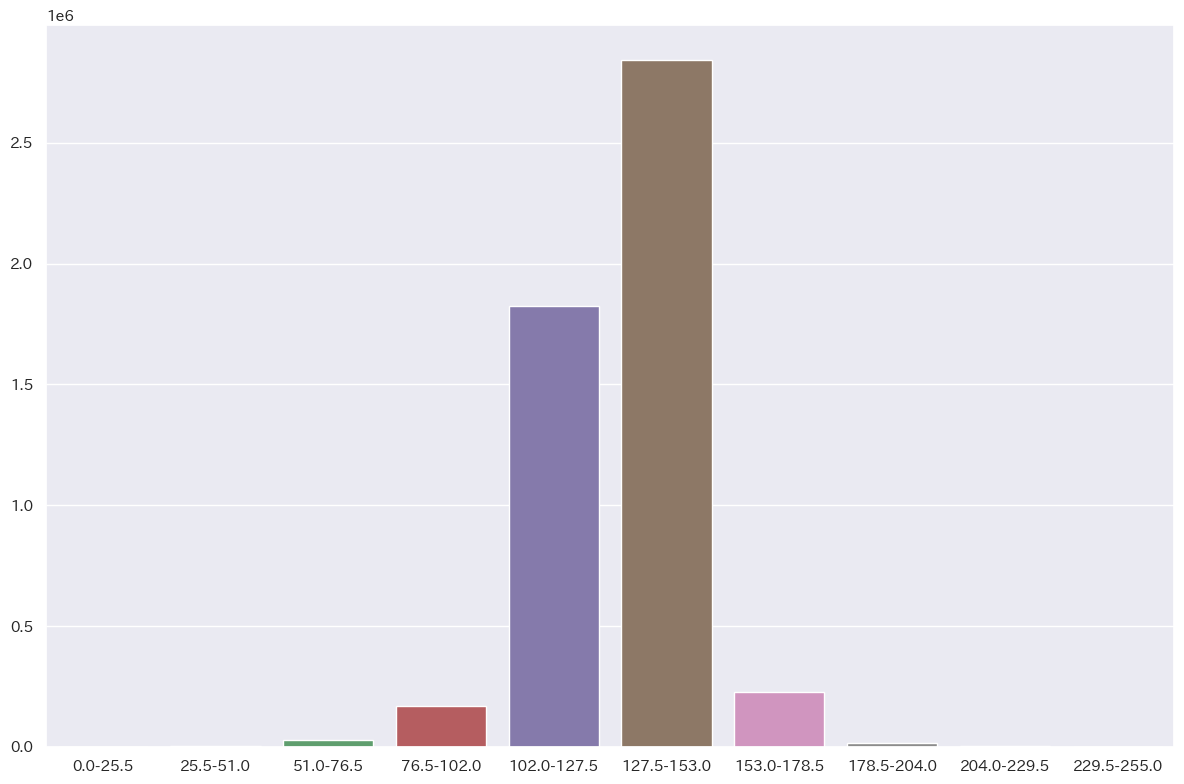

 * cat


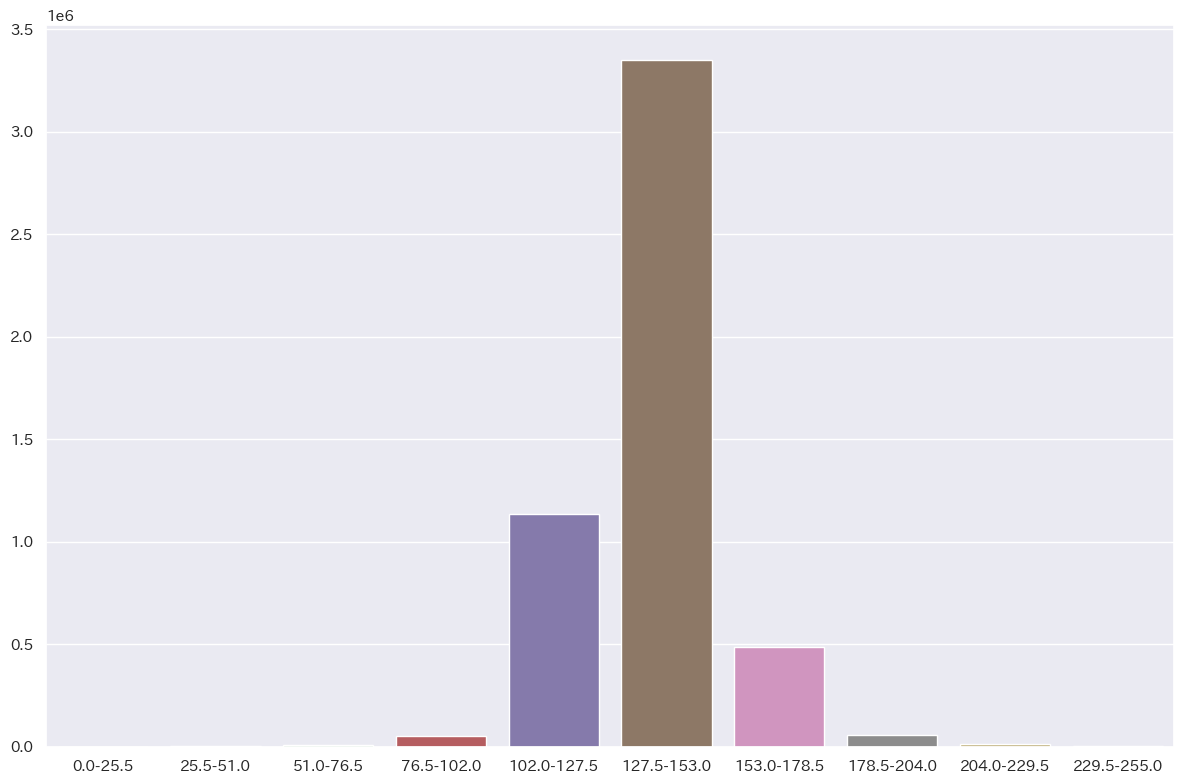

 * deer


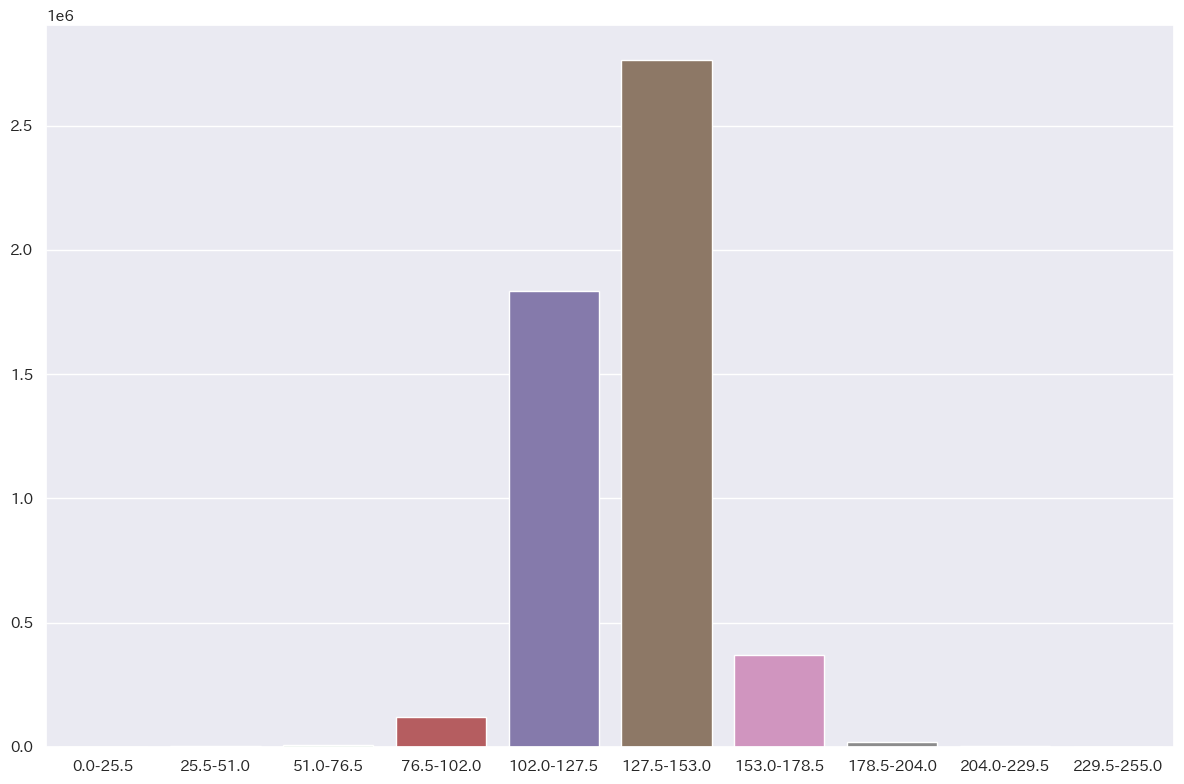

 * dog


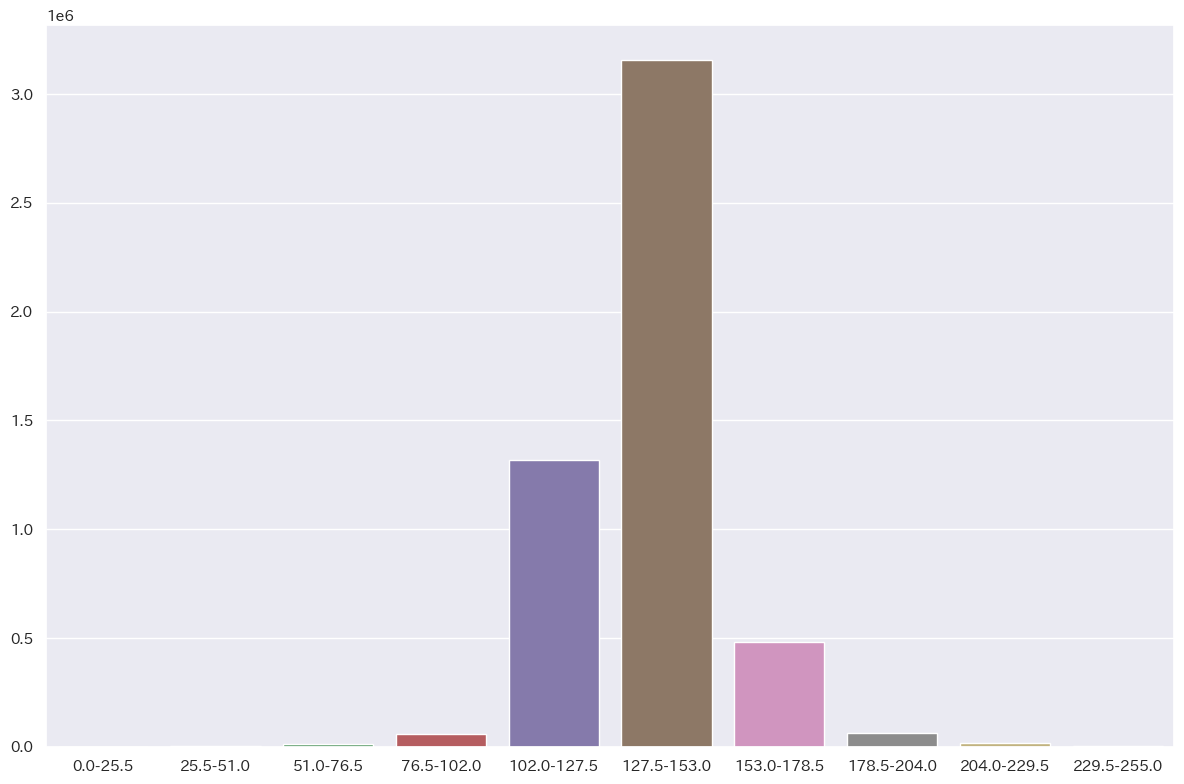

 * frog


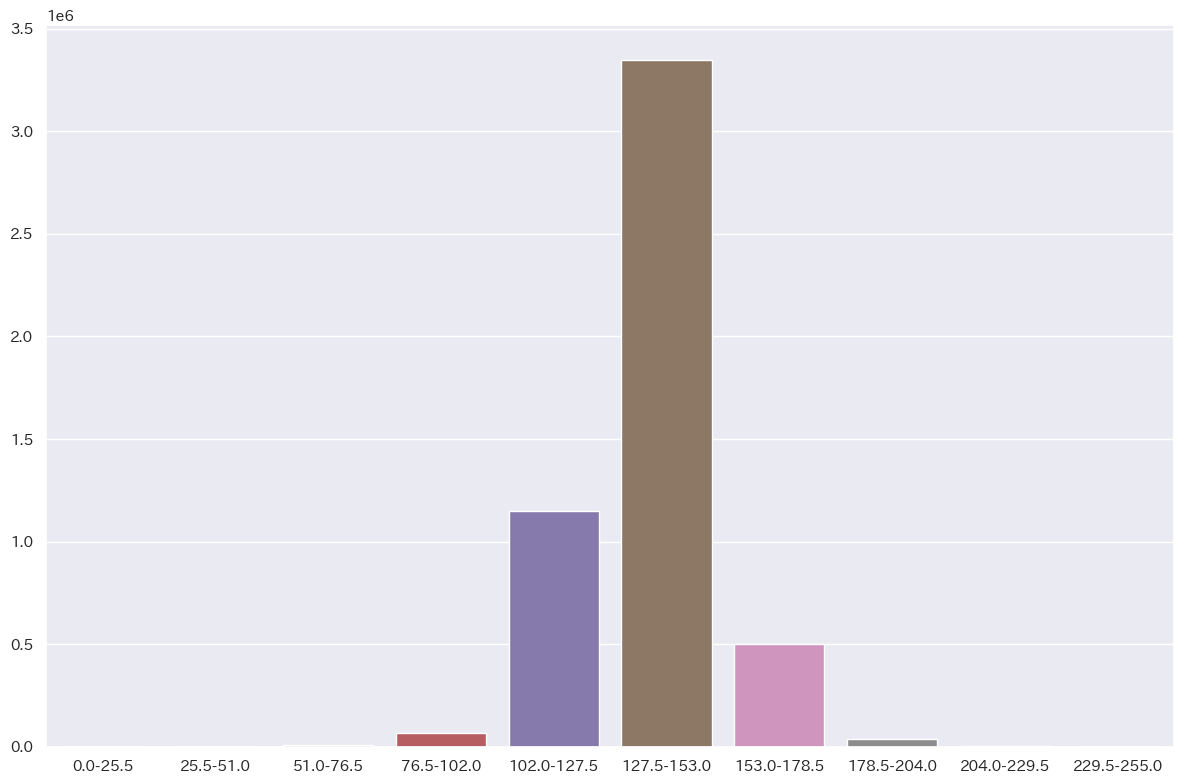

 * horse


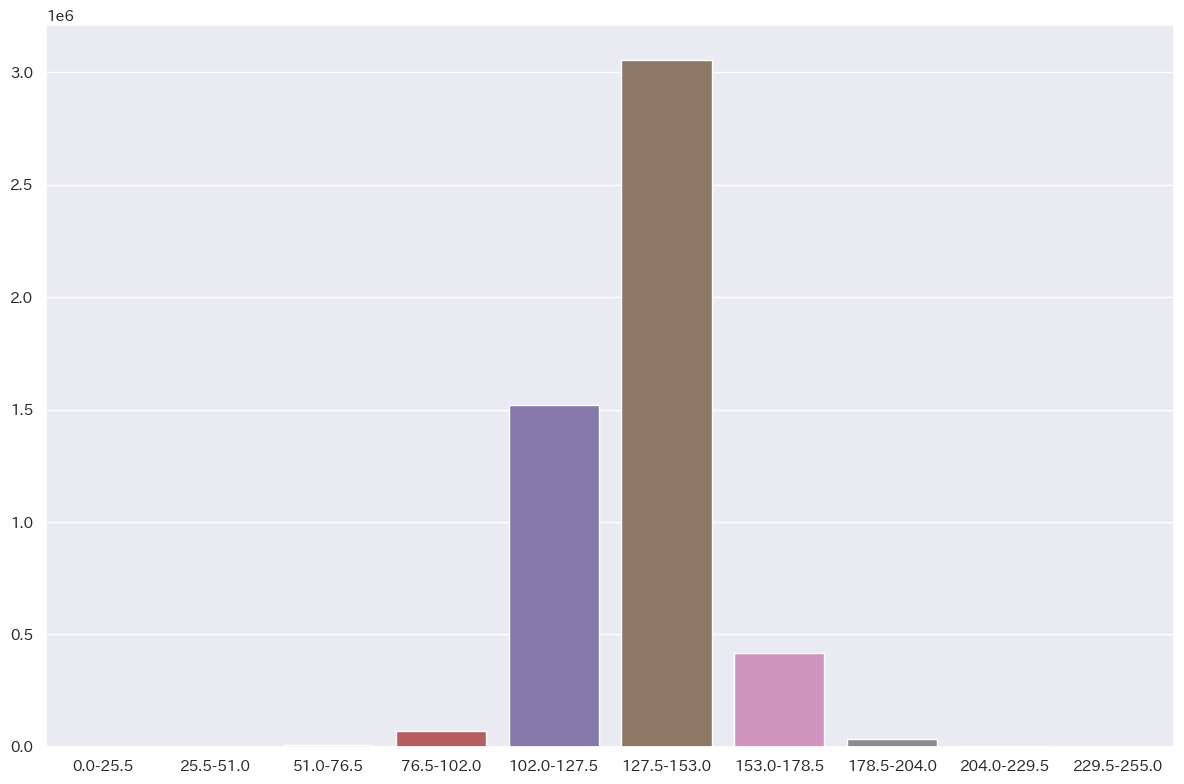

 * ship


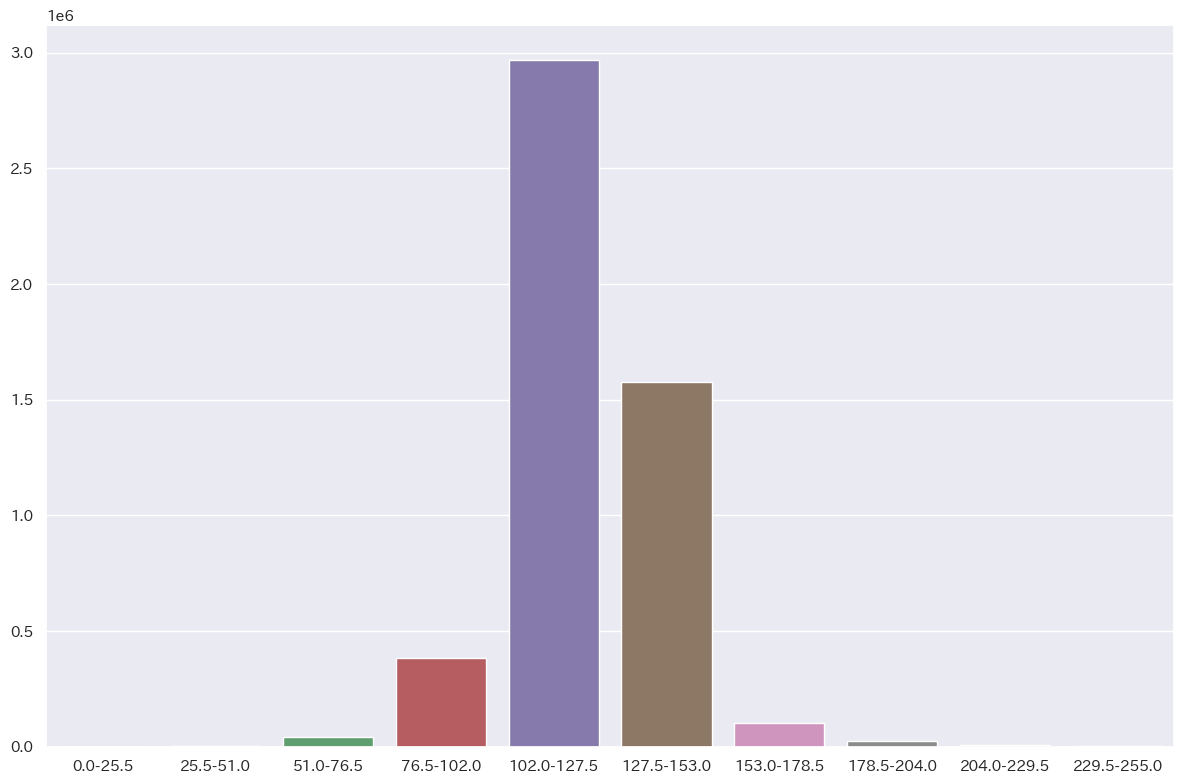

 * truck


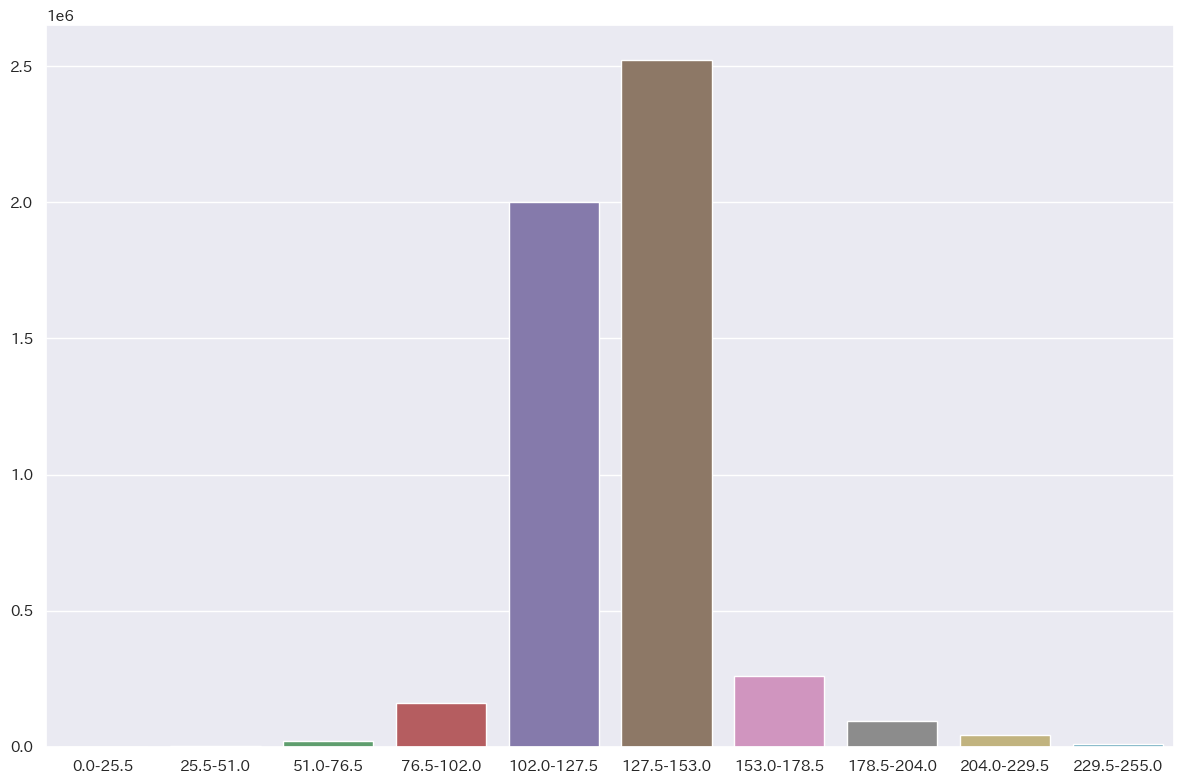

In [13]:
channels = ['Y', 'U', 'V']
for ch in range(3):
    print(f'<< {channels[ch]} >>')
    for class_id in range(10):
        print(f' * {dict_y["label_names"][class_id]}')
        x = hist_yuv['floor_boundary']
        y = hist_yuv['frequency'][ch][class_id]
        plt.figure(figsize=(12, 8))
        sns.barplot(x=x, y=y)
        plt.tight_layout()
        plt.show()
        plt.close()

### UMAP

In [14]:
n_data = dict_x['train'].shape[0]
mapper = umap.UMAP(random_state=1234)
features = mapper.fit_transform(dict_x['train'].reshape(n_data, -1))

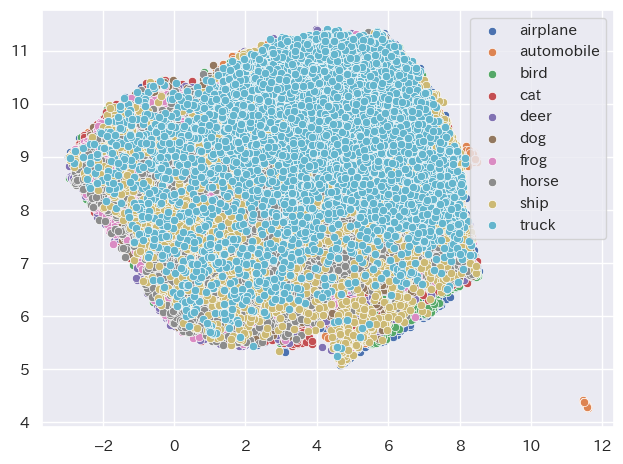

In [15]:
features_x = features[:, 0]
features_y = features[:, 1]
for class_id in range(10):
    sns.scatterplot(
        x=features_x[dict_y['train']==class_id],
        y=features_y[dict_y['train']==class_id],
        label=dict_y["label_names"][class_id]
    )

plt.tight_layout()
plt.legend()
plt.show()
plt.close()

### t-SNE

In [16]:
n_data = dict_x['train'].shape[0]
mapper = manifold.TSNE(random_state=1234)
features = mapper.fit_transform(dict_x['train'].reshape(n_data, -1))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


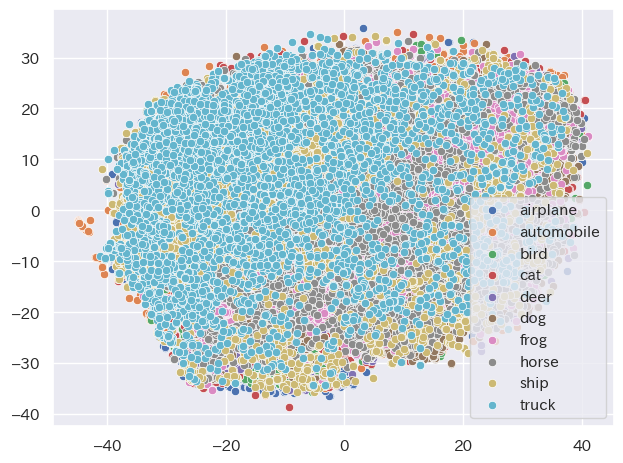

In [17]:
features_x = features[:, 0]
features_y = features[:, 1]
for class_id in range(10):
    sns.scatterplot(
        x=features_x[dict_y['train']==class_id],
        y=features_y[dict_y['train']==class_id],
        label=dict_y["label_names"][class_id]
    )

plt.tight_layout()
plt.legend()
plt.show()
plt.close()

## Reference

* [Pervasive Label Errors in Test Sets Destabilize Machine Learning Benchmarks](https://arxiv.org/abs/2103.14749)
  * テストデータセットのラベルエラーがベンチマークの安定性を損なうことについて述べた論文
  * 規模の大きいモデルでは，ラベルエラーを含んだデータセットに対して高い精度が得られる  
しかし，ラベルエラー修正後のテスト精度が悪化することが分かった
      ```
      An analysis of the implications of test set label errors on benchmarks, and the finding that higher-capacity models perform better on the subset of incorrectly-labeled test data in terms of their accuracy on the original labels (i.e., what one traditionally measures), but perform worse on this subset in terms of their accuracy on corrected labels (i.e., what one cares about in practice, but cannot measure without the corrected test data we provide)
      ```
* [Label Errors in ML Test Sets](https://labelerrors.com/)